## Virtualizing Data Using Data Virtualization

## Overview and Prerequisites

In this notebook we will be virtualizing data from two different data sources: one on Db2 on CP4D (Flight Information), and another on Postgres (Airport Information).  

## Prerequisites
1. This notebook assumes that the flight information and airport information datasets for your specific month (e.g. 'jan', 'feb', etc.) are loaded into DB2 and Postgres respectively.
2. This notebook assumes that the DB2 data connection (called 'FlightInfoCP4D') and Postgres data connection (called 'Postgres DB') have already been added to the Data Virtualization instance. 
3. This notebook assumes that you have an enabled instance of IBM Data Virtualization and Watson Knowledge Catalog on Cloud Pak for Data (CP4D).

## Virtualizating Data Using Data Virtualization

### 1. Navigate to the Sandwich icon at the top left corner, then go to 'Data' > 'Data Virtualization'. This will take you to a view of your data sources available for virtualization.

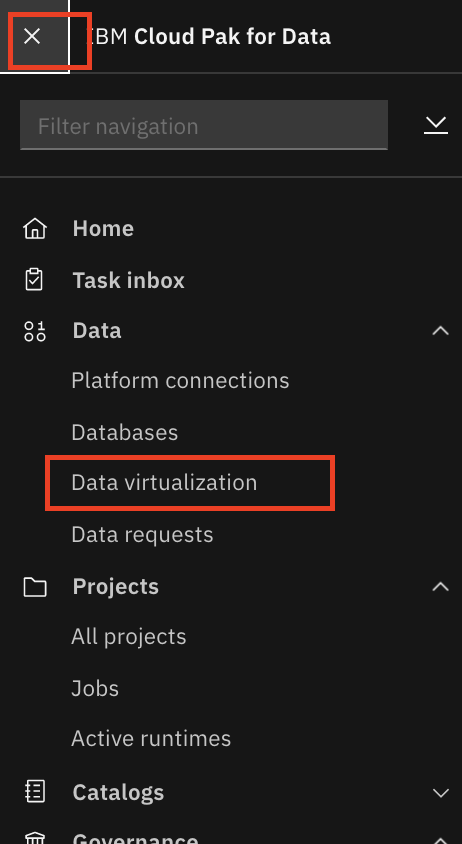

### 2.  Navigate to 'Data sources' at the top left, select the dropdown, and navigate to 'Virtualize'. This will take you to the page listing all tables eligble for virtualization. 

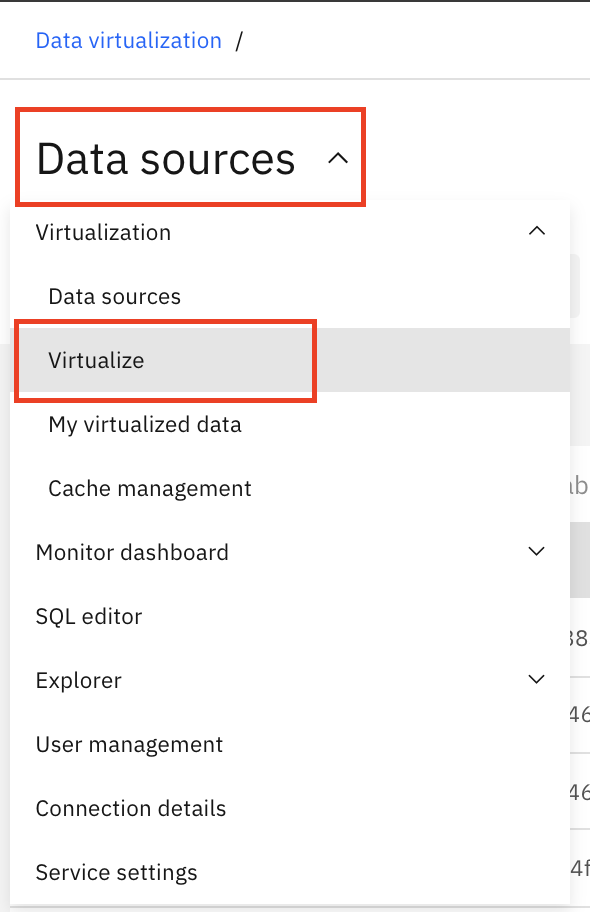

### 3. Type the three letter month corresponding to your dataset (e.g. 'oct' will be used as an example going forward) in the searchbar on the 'Virtualize' page. You will be able to see the '_MONTH_FLIGHT_INFORMATION' (located in CP4D) and 'MONTH_airport_information' (located in Postgres) tables. Check the tables and click 'Add to cart' >'View Cart'.

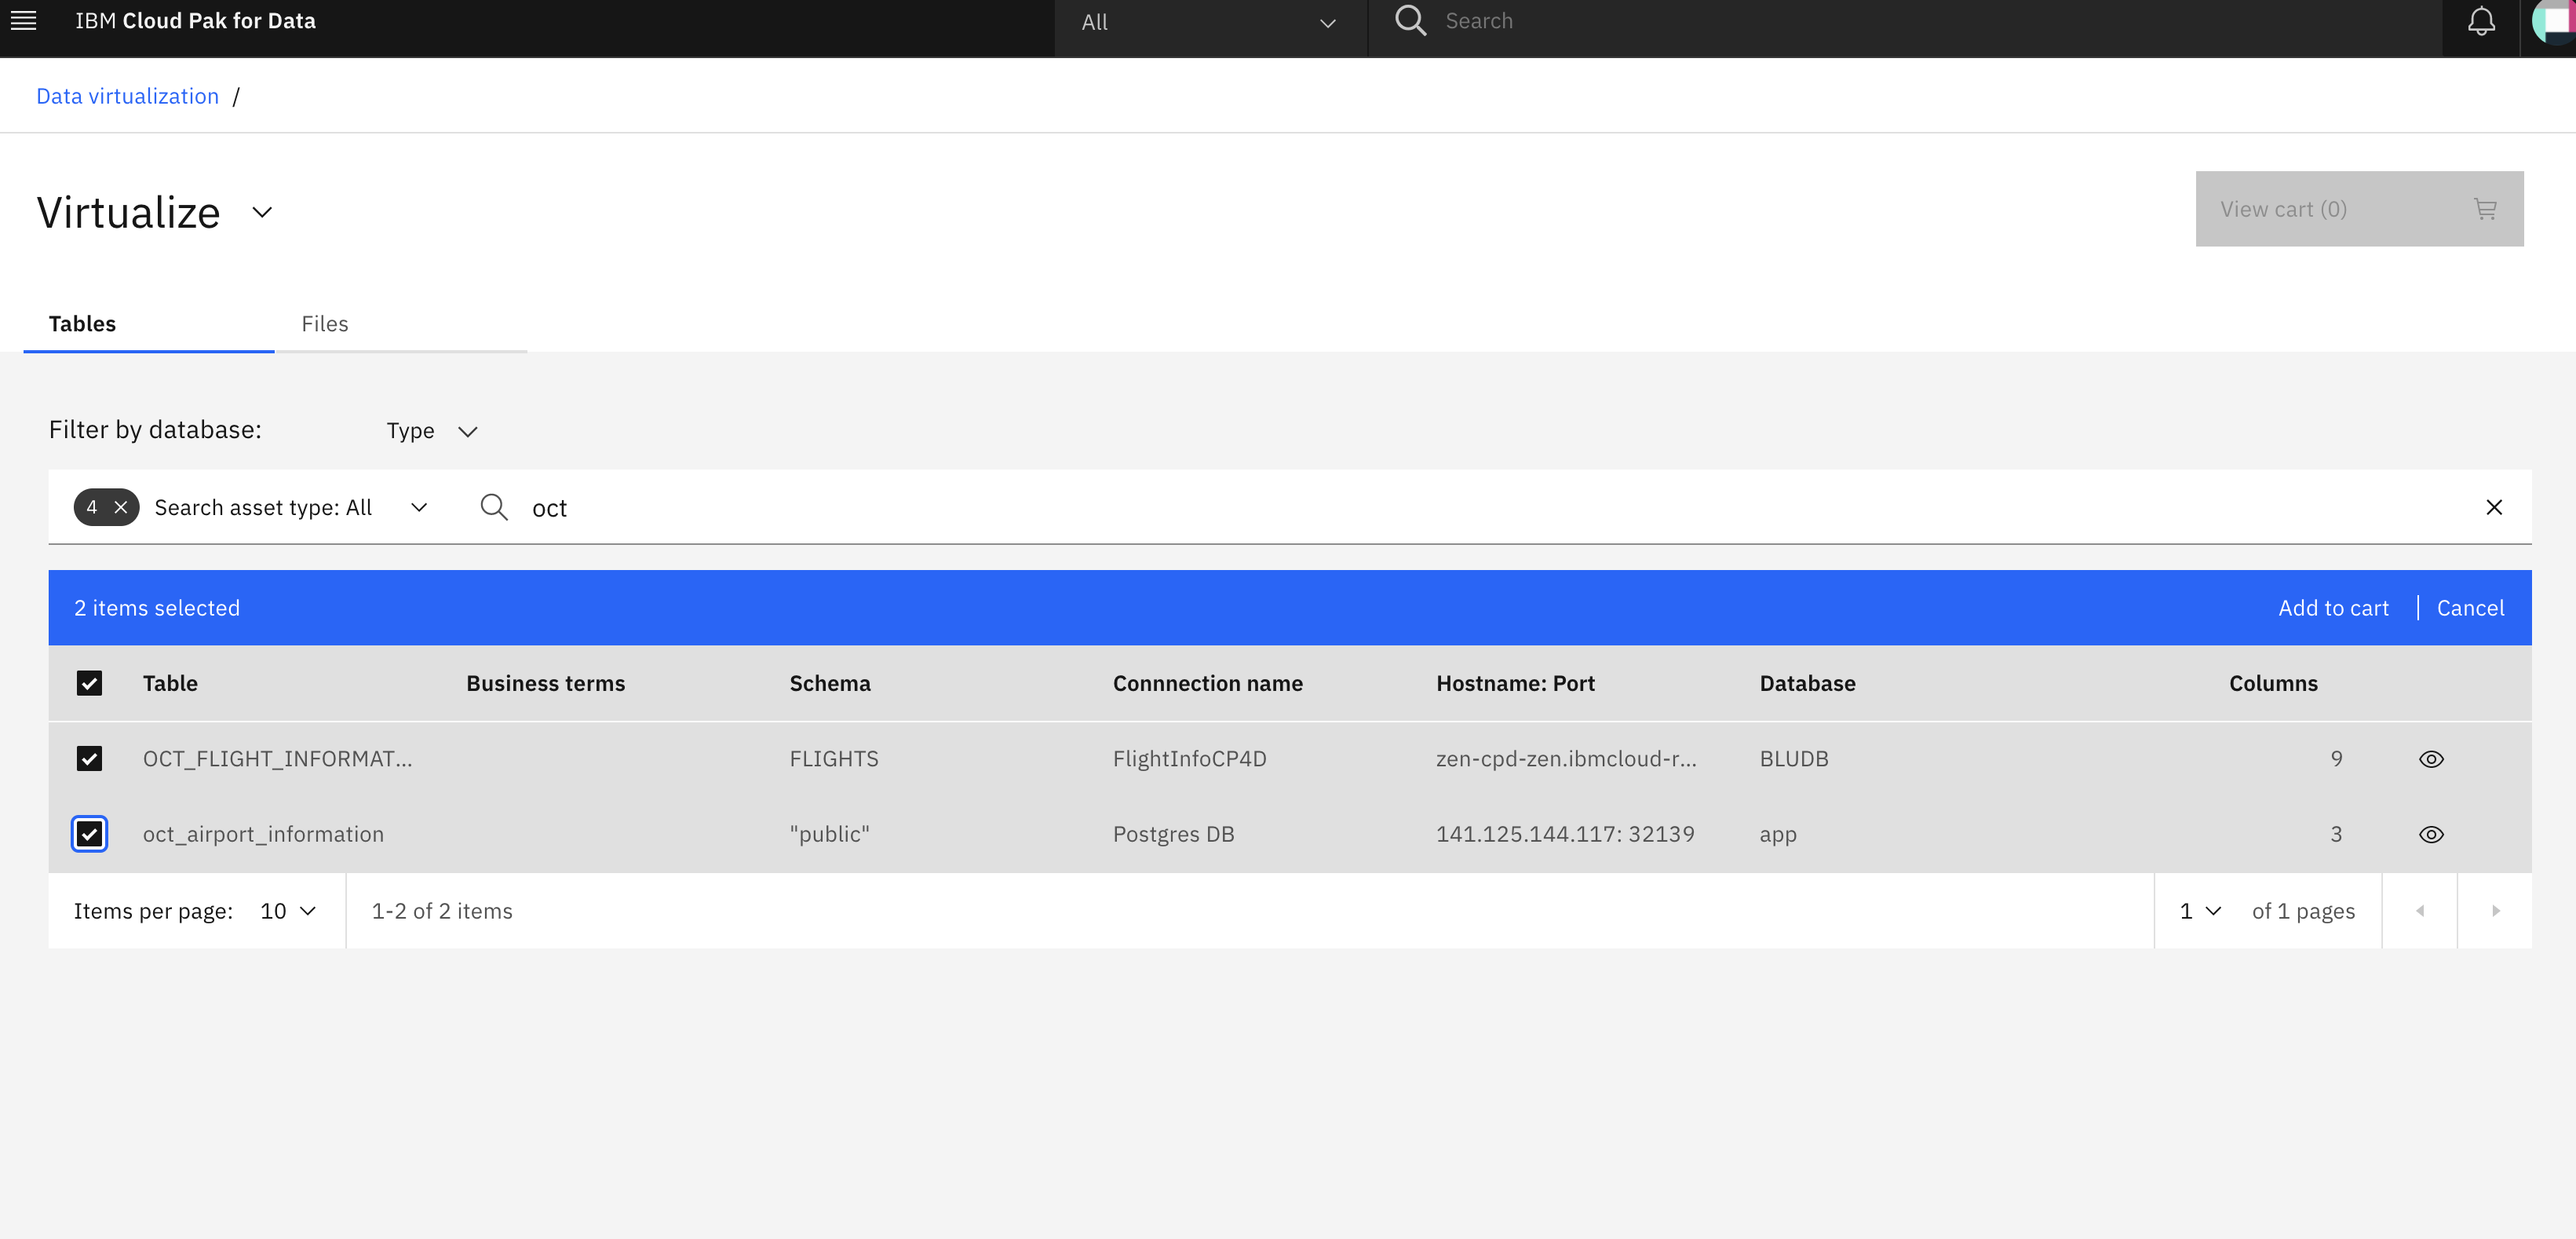

### 4. Click on 'View Cart'. This will take you to the 'Review cart and virtualize tables' page.  The 'schema' should autofill with your username, e.g ('CLUSTER1_USER25').  Ensure that this is the case.  If not, change the schema to your username.

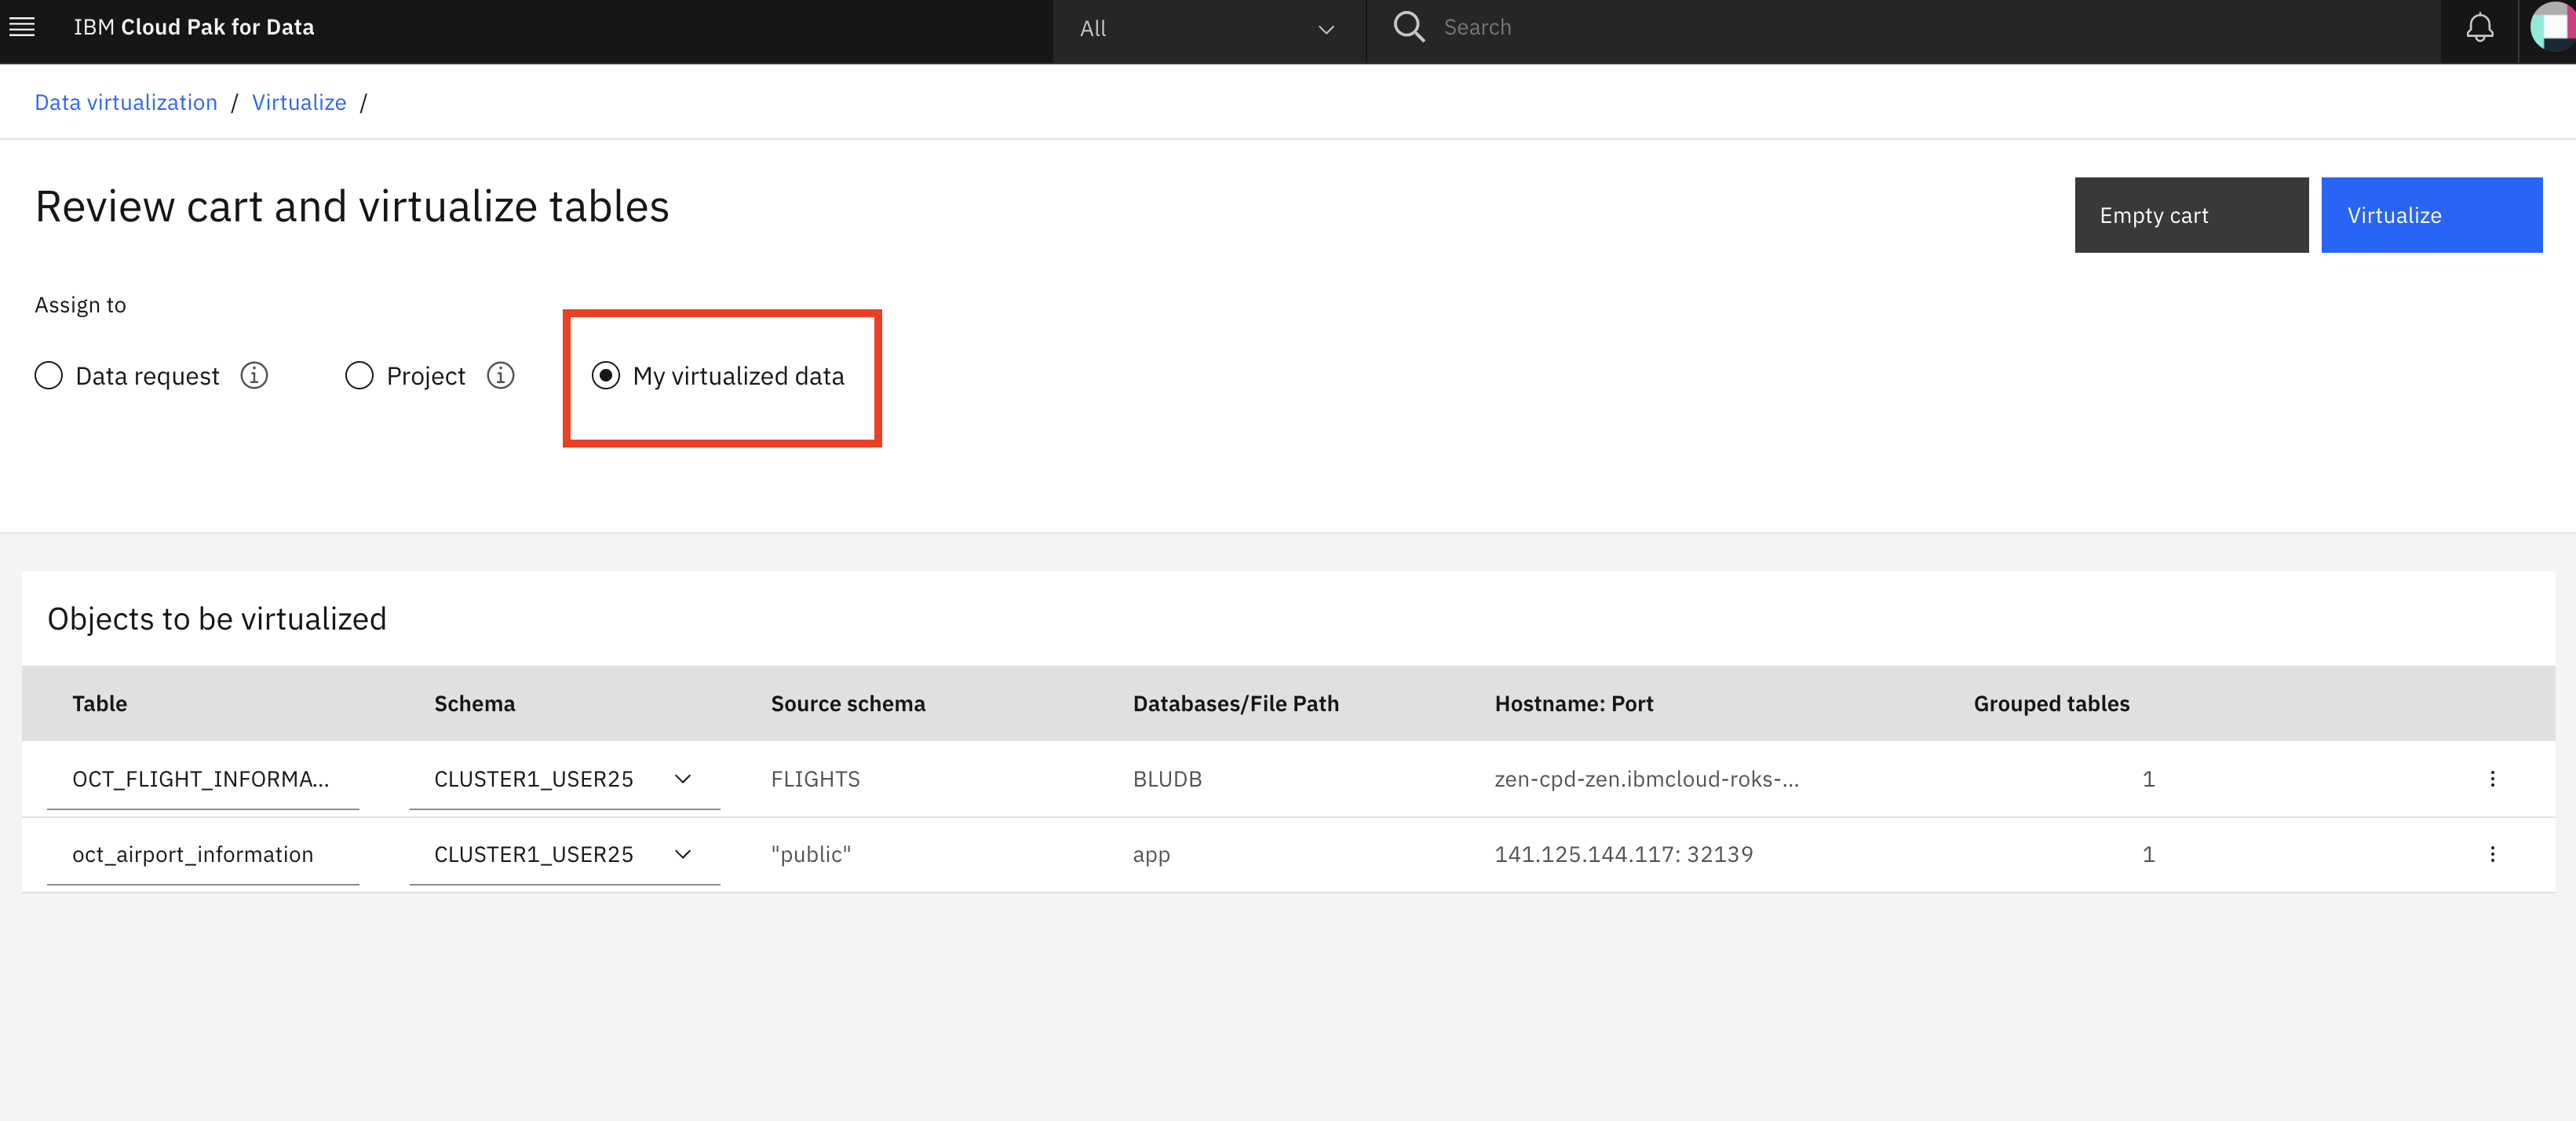

### 5. Select 'My Virtualized Data' and then click 'Virtualize' in the top right corner.  

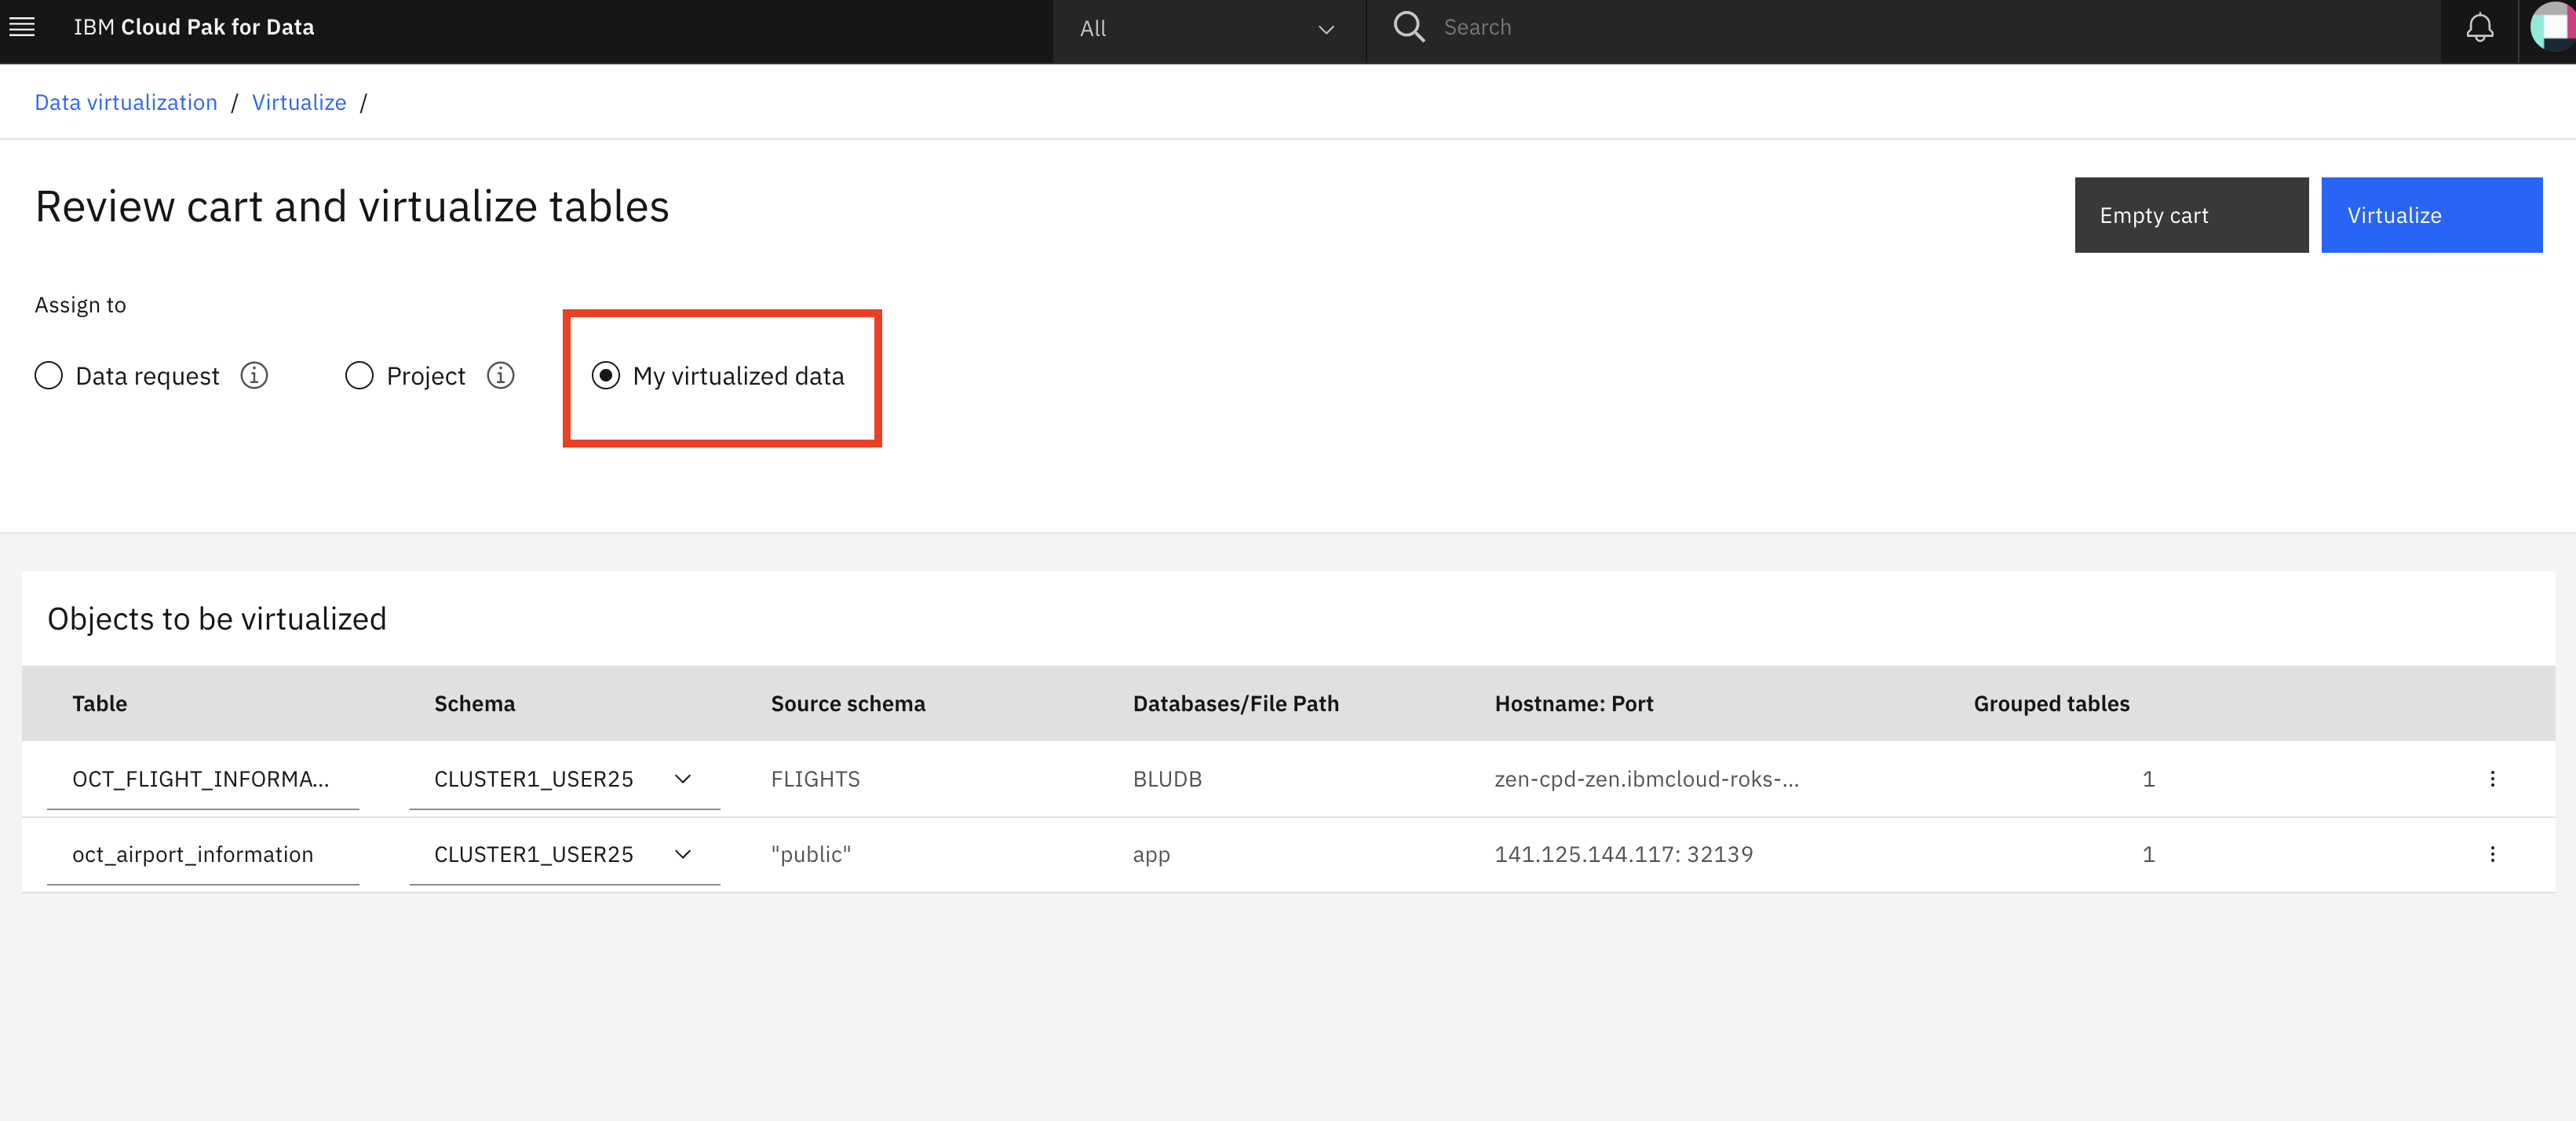

### 6. Once the data is virtualized, a 'Virtualize Objects' screen will pop up. Click on 'View my virtualized data'. This will take you to the 'My virtualized data' page. 

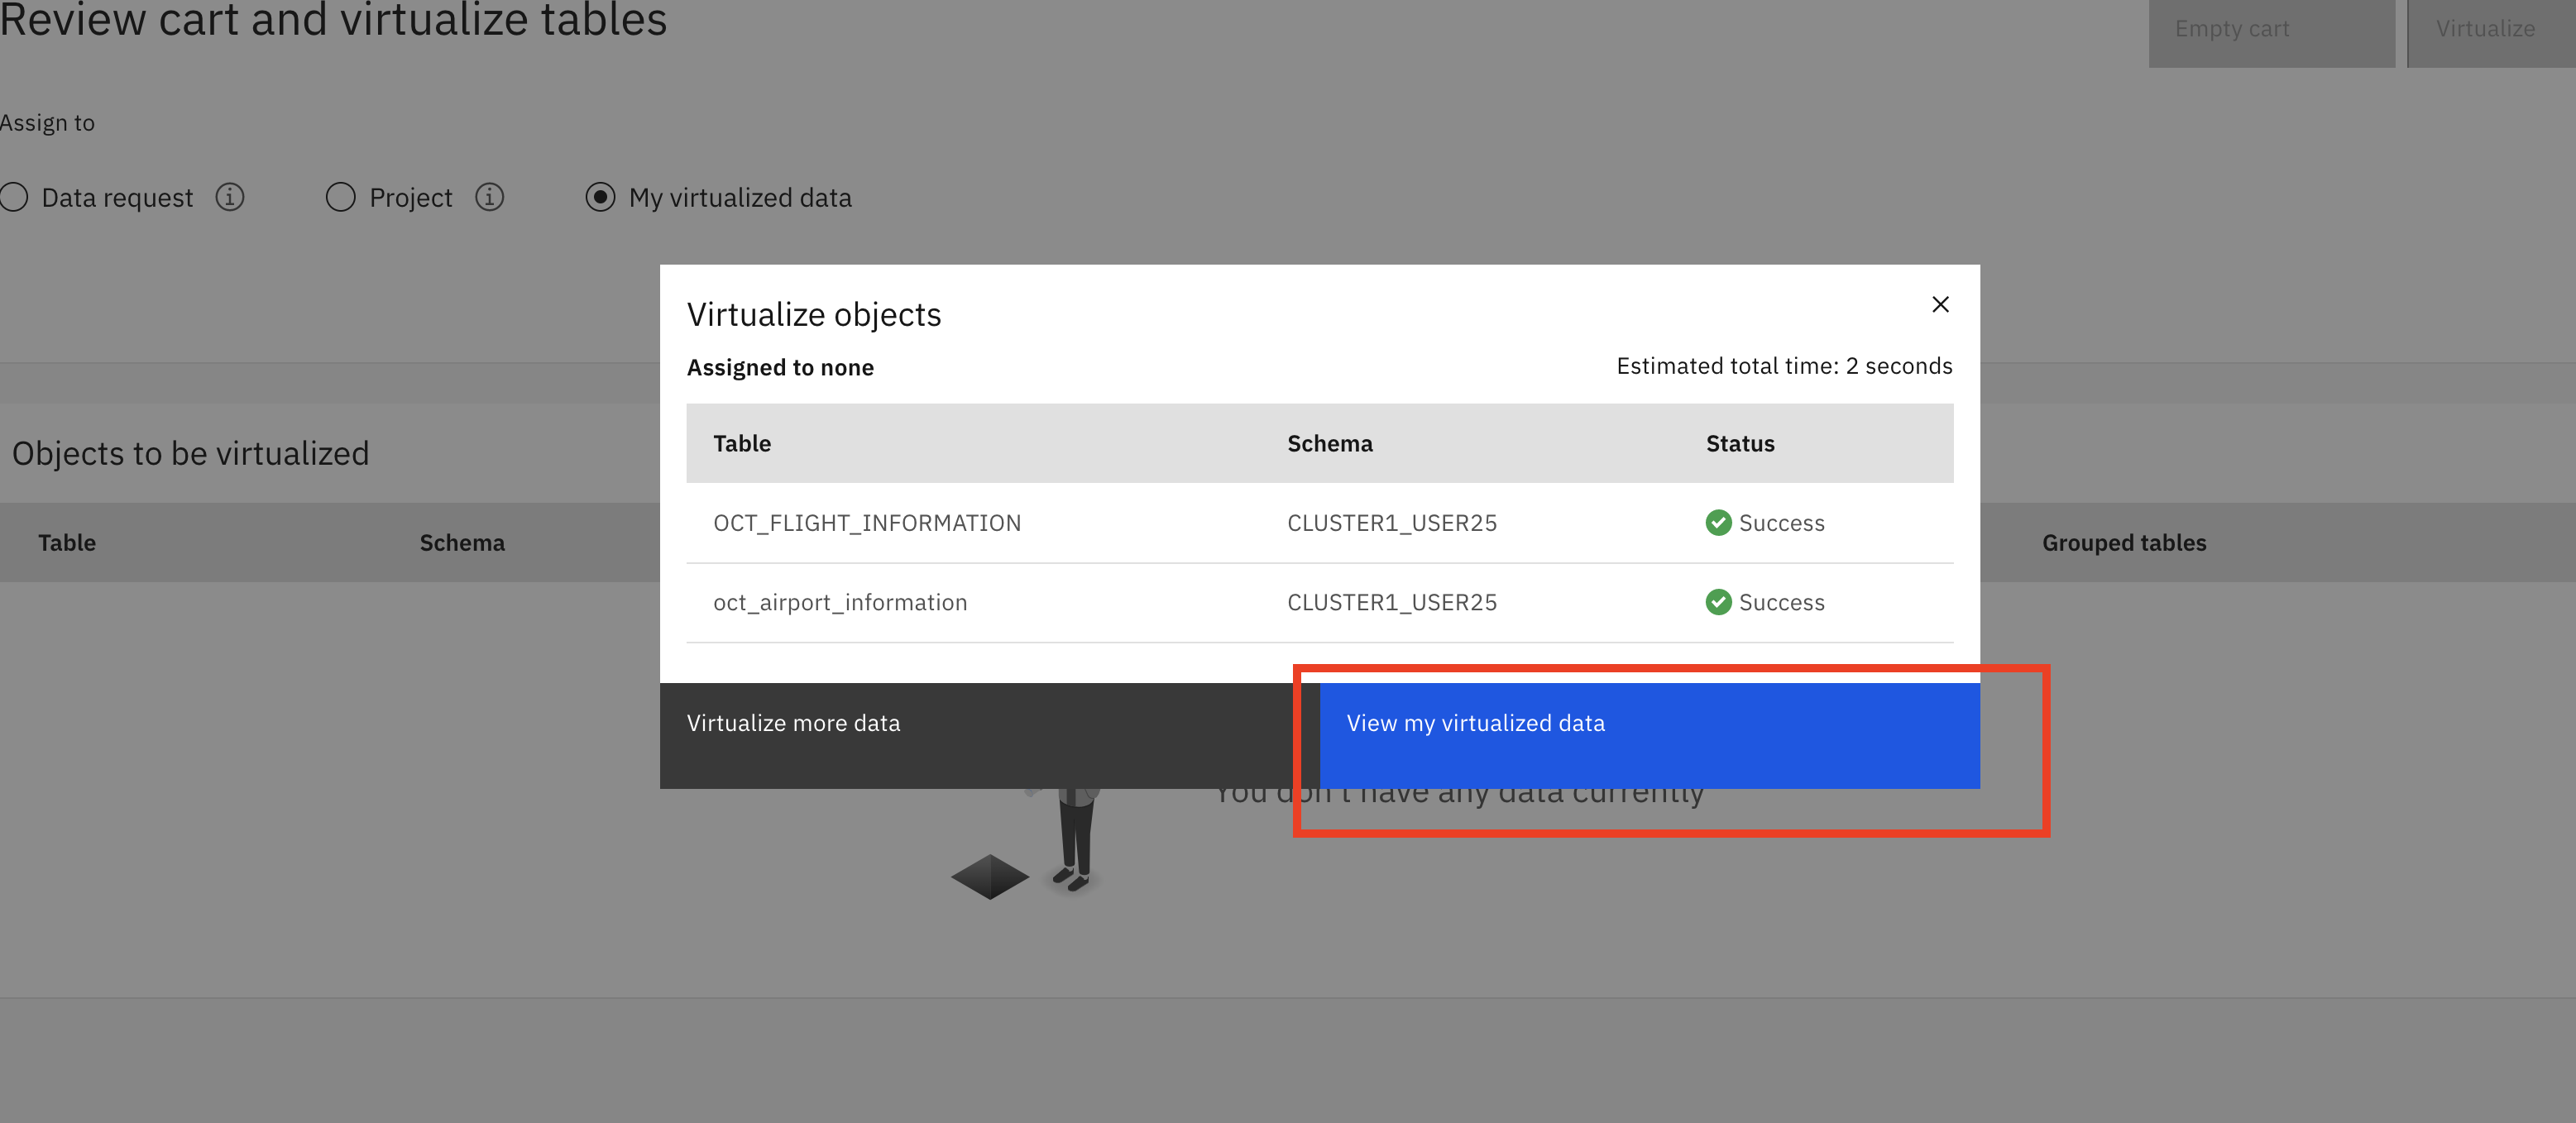

### 7. In the 'My virtualized data' page, check the boxes on _MONTH_FLIGHT_INFORMATION and _MONTH_airport_information (now virtualized datasets) and click 'Join'. This will take you to the 'Join virtual objects' page. 

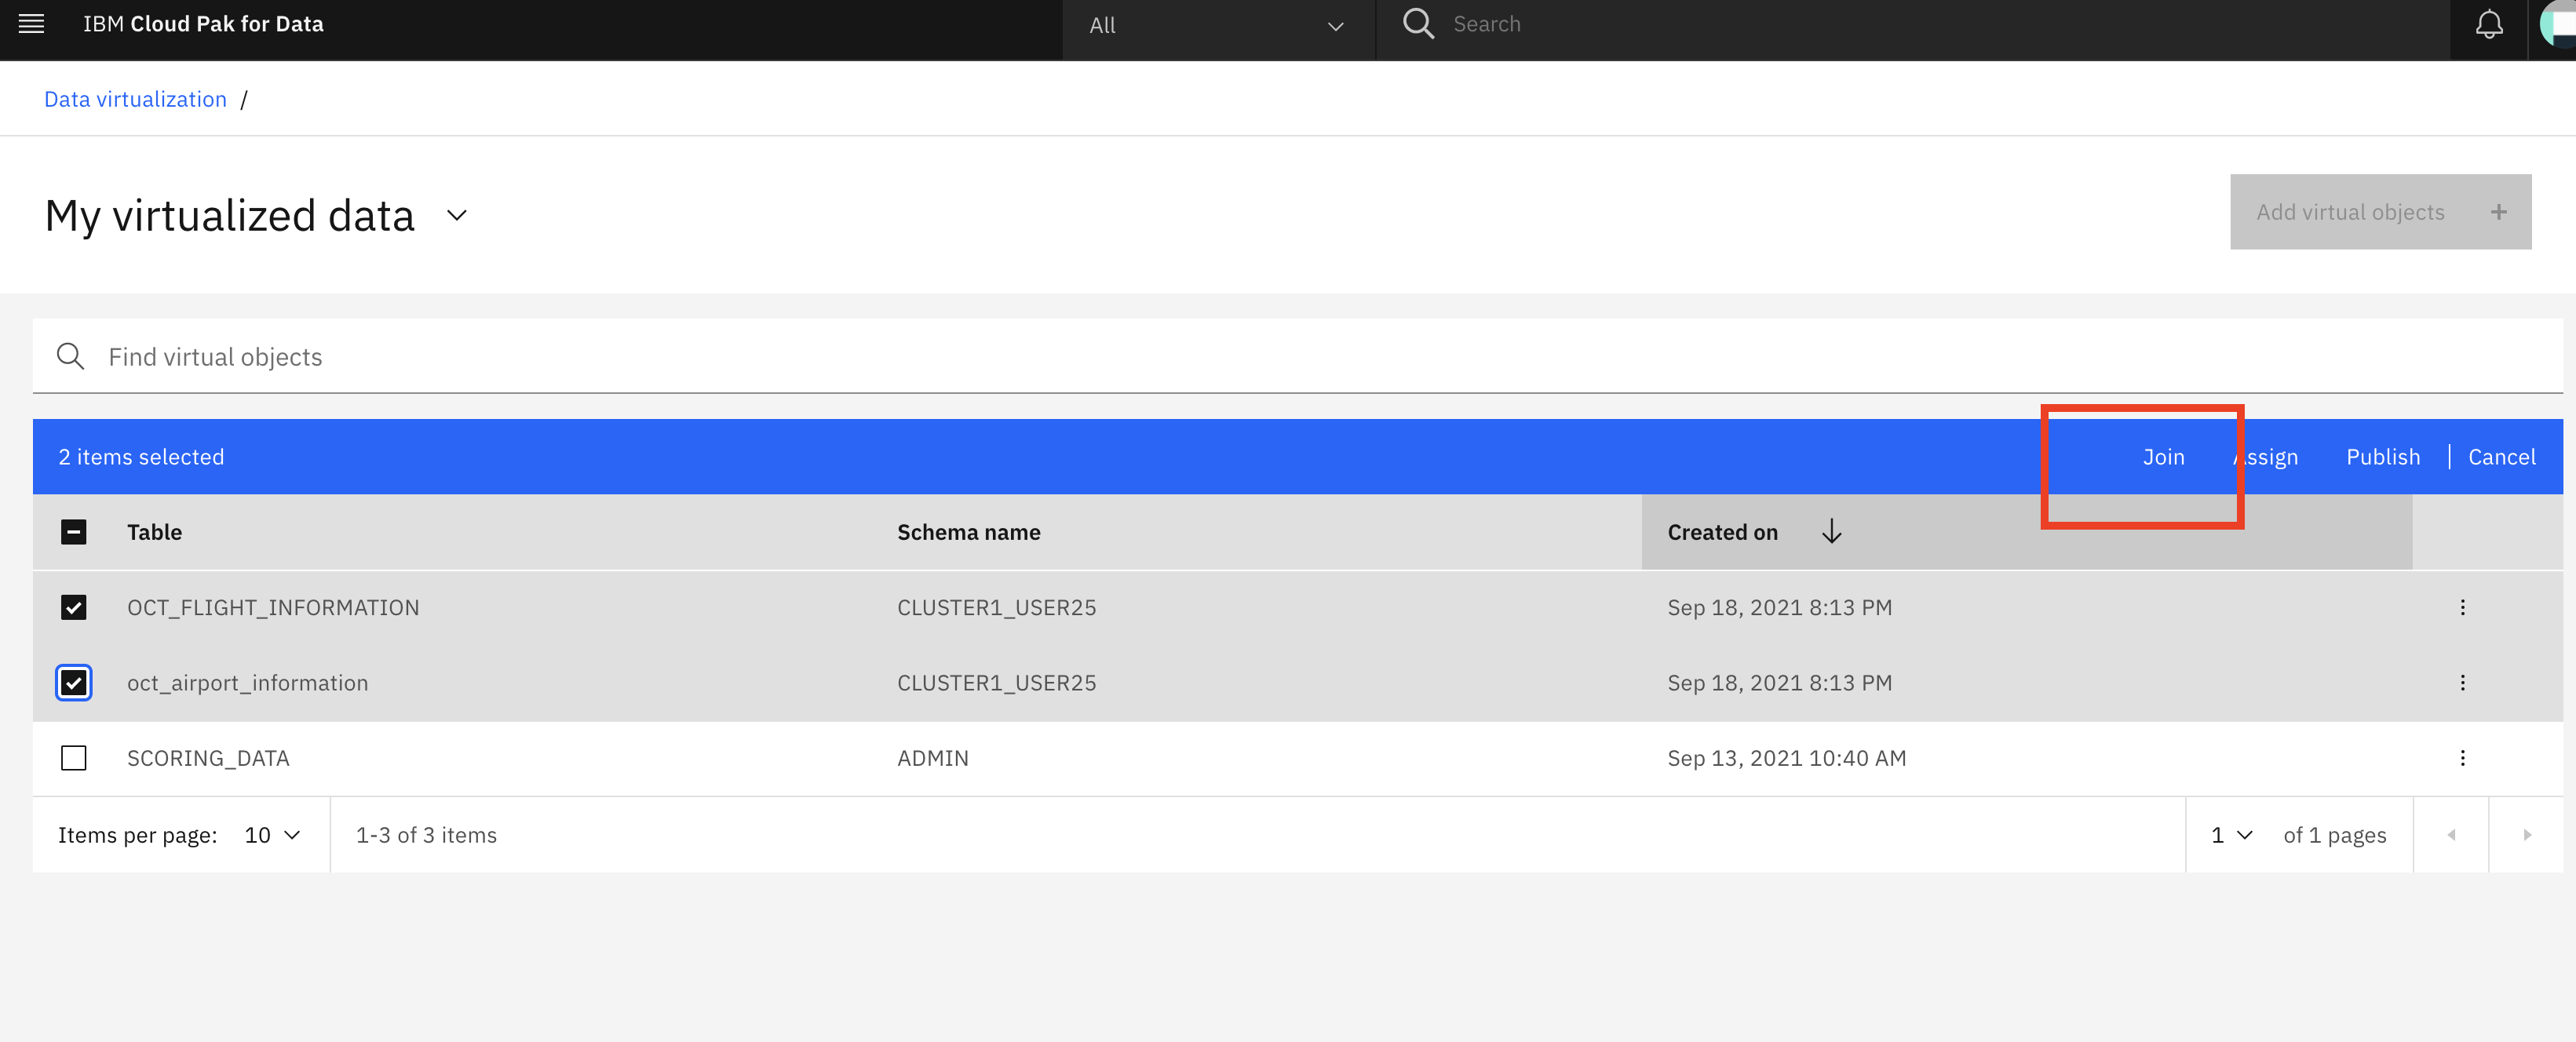

### 8. On the 'Join virtual objects' page, click and drag 'flight_id' from the left hand table (_MONTH_airport_information) to 'FLIGHT_ID on the right hand table (_MONTH_AIRPORT_INFORMATION). Then click 'Open in SQL editor' in the top right hand corner.
    FYI: You defined the merge key in this step. 
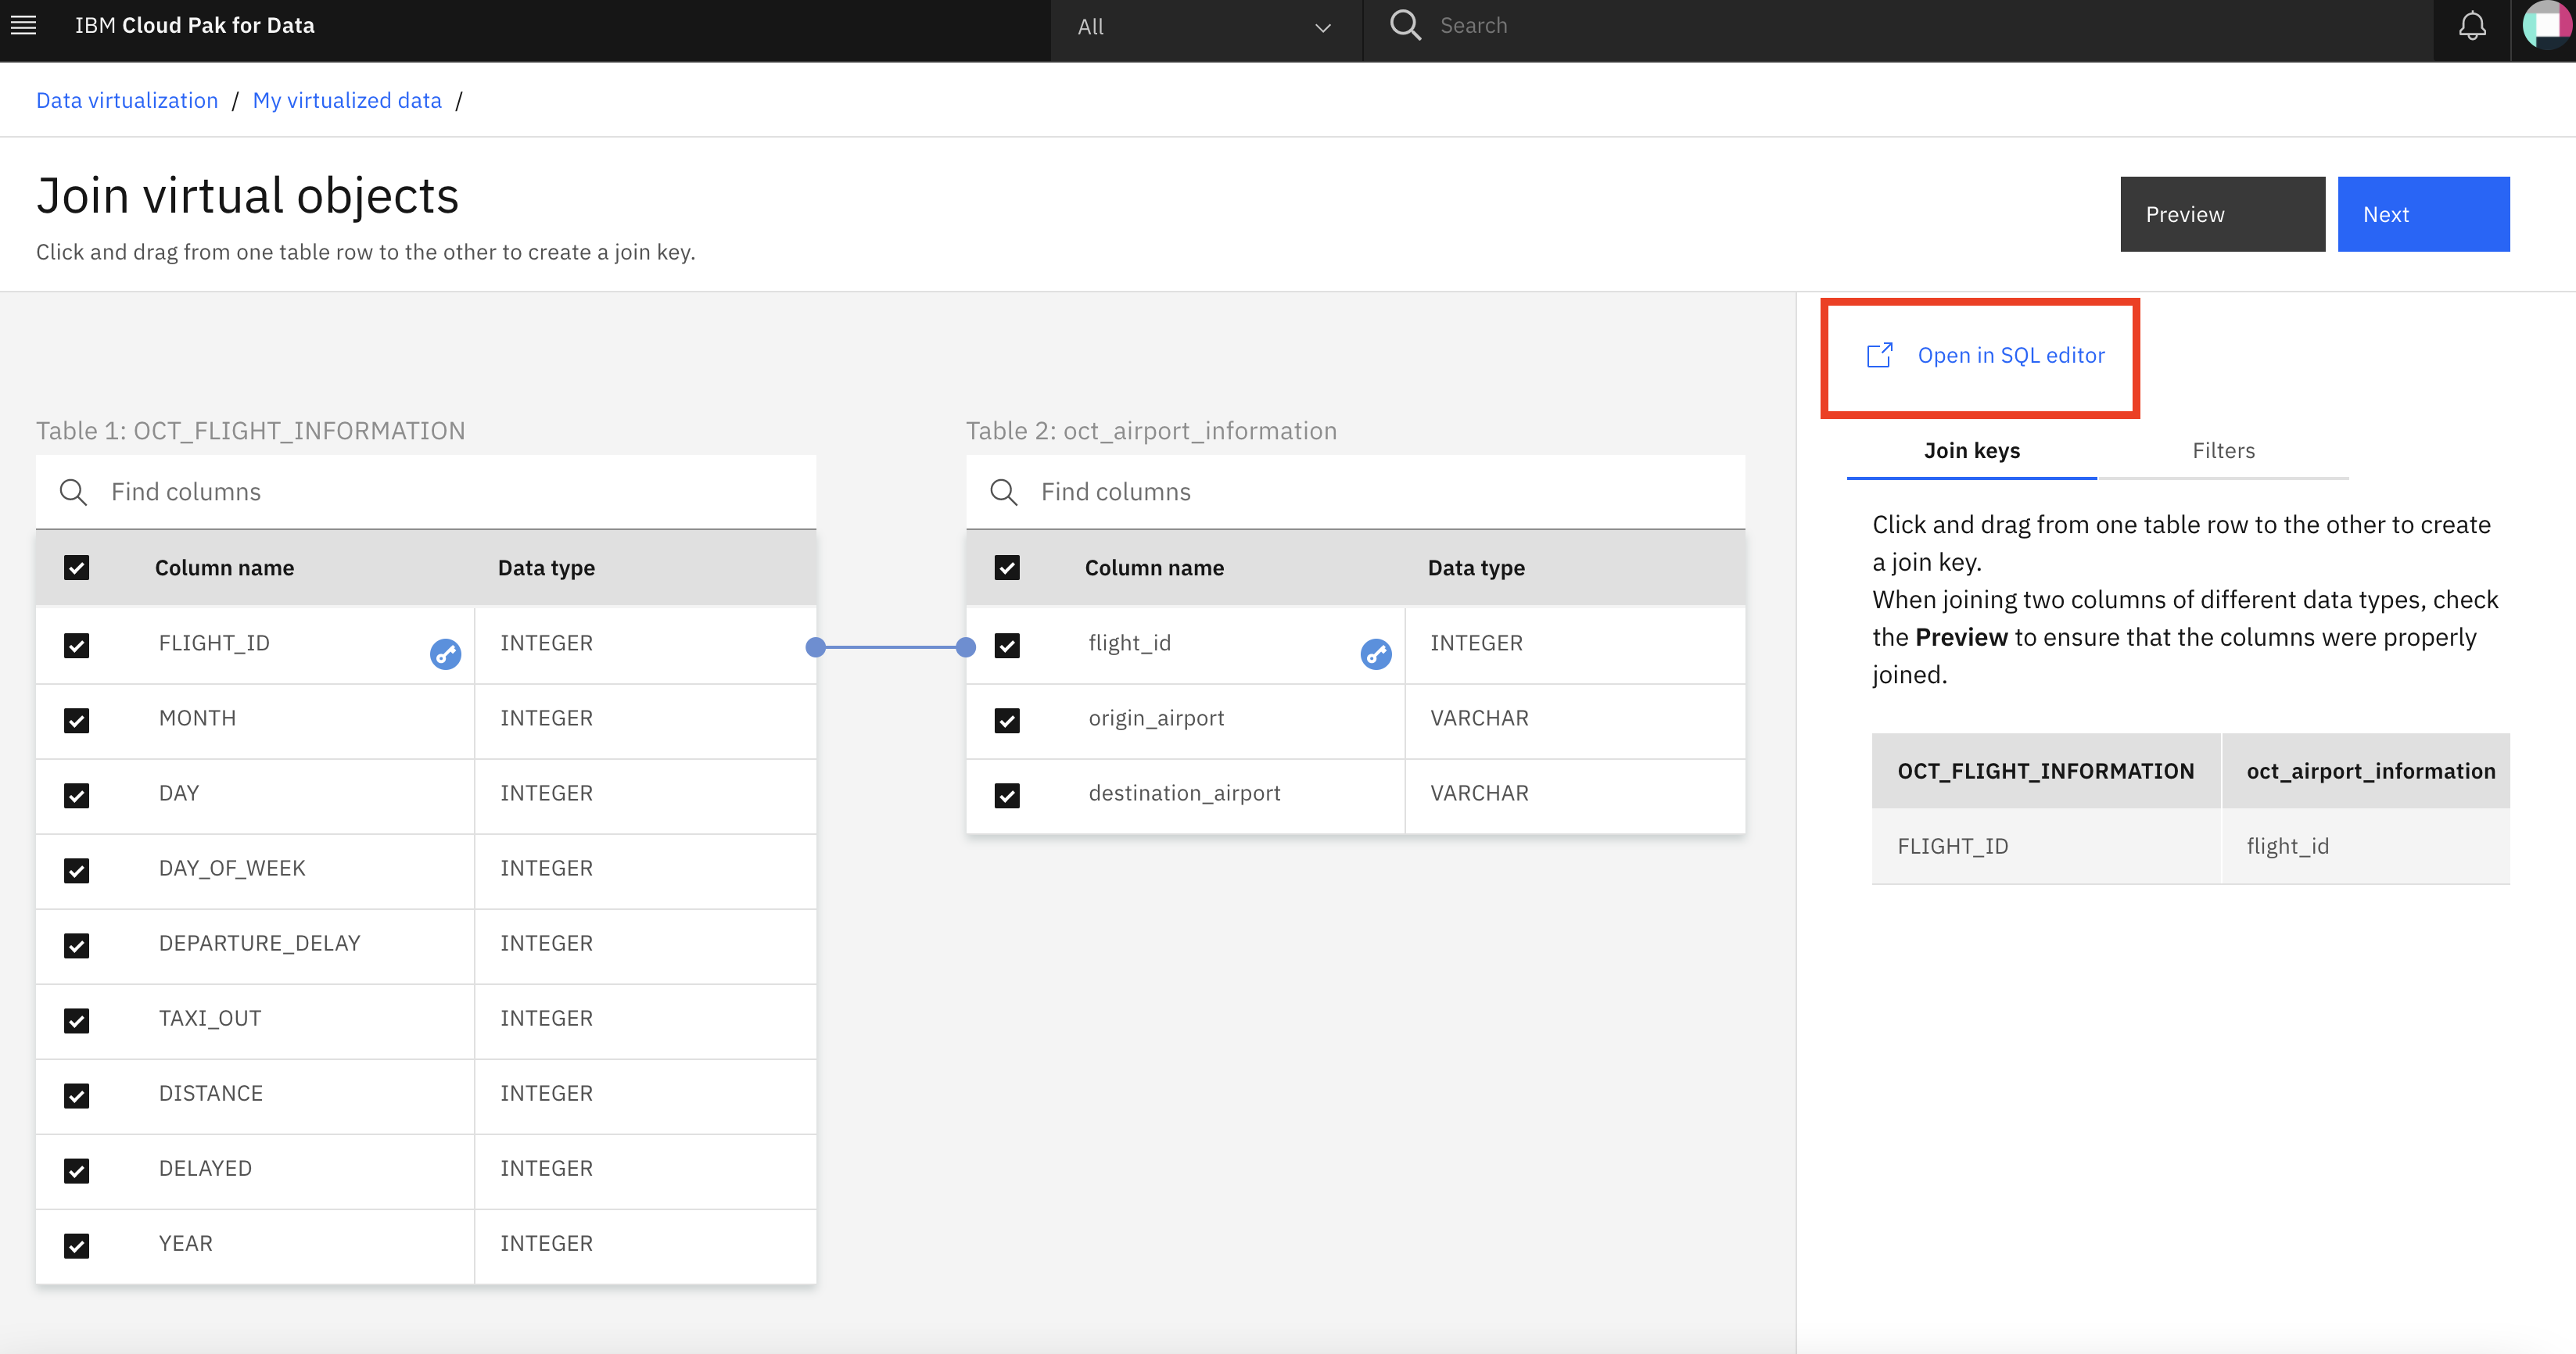

### 9. Copy the SQL query below to your SQL editor and edit the SQL query below to match the schema, table names, and user names, etc. First, provide the `USER_NAME` (allocated to you) into the view name: `AIRLINE_VIRTUALIZED_DATA_(USER_NAME)`.  Then, replace every instance of USER_NAME with the name of your Data Virtualization Schema (which should be your username as declared in Step 5).  Finally, insert your 3-letter month into every table name (e.g. "OCT_FLIGHT_INFORMATION" and "oct_airport_information".  Below is a template query followed by a sample query.  Refer to both when creating your specific query. 


Note: pay close attention to the casing of the 3-letter month in the query when replacing `<_MONTH_>` (upper case) and `<_month>` (lower case), and `USER_NAME` (upper case).


```CREATE VIEW AIRLINE_VIRTUALIZED_DATA_<USER_NAME>
         AS SELECT  "USER_NAME"."<_MONTH_>_FLIGHT_INFORMATION"."DAY" AS "DAY", 
         "USER_NAME"."<_MONTH_>_FLIGHT_INFORMATION"."DAY_OF_WEEK" AS "DAY_OF_WEEK", 
         "USER_NAME"."<_month_>_airport_information"."origin_airport" AS "ORIGIN_AIRPORT", 
         "USER_NAME"."<_month_>_airport_information"."destination_airport" AS "DESTINATION_AIRPORT",
         "USER_NAME"."<_MONTH_>_FLIGHT_INFORMATION"."DEPARTURE_DELAY" AS "DEPARTURE_DELAY", 
         "USER_NAME"."<_MONTH_>_FLIGHT_INFORMATION"."TAXI_OUT" AS "TAXI_OUT", 
         "USER_NAME"."<_MONTH_>_FLIGHT_INFORMATION"."DISTANCE" AS "DISTANCE", 
         "USER_NAME"."<_MONTH_>_FLIGHT_INFORMATION"."DELAYED" AS "DELAYED" 
              FROM "USER_NAME"."<_MONTH_>_FLIGHT_INFORMATION", "USER_NAME"."<_month_>_airport_information" 
                  WHERE "USER_NAME"."<_MONTH_>_FLIGHT_INFORMATION"."FLIGHT_ID"="USER_NAME"."<_month_>_airport_information"."flight_id"```

### Sample Query Below for Cluster 1, User 10:
```CREATE VIEW AIRLINE_VIRTUALIZED_DATA_CLUSTER1_USER10
      AS SELECT  "CLUSTER1_USER10"."JUN_FLIGHT_INFORMATION"."DAY" AS "DAY",
          "CLUSTER1_USER10"."JUN_FLIGHT_INFORMATION"."DAY_OF_WEEK" AS "DAY_OF_WEEK", 
          "CLUSTER1_USER10"."jun_airport_information"."origin_airport" AS "ORIGIN_AIRPORT", 
          "CLUSTER1_USER10"."jun_airport_information"."destination_airport" AS "DESTINATION_AIRPORT", 
          "CLUSTER1_USER10"."JUN_FLIGHT_INFORMATION"."DEPARTURE_DELAY" AS "DEPARTURE_DELAY", 
          "CLUSTER1_USER10"."JUN_FLIGHT_INFORMATION"."TAXI_OUT" AS "TAXI_OUT", 
          "CLUSTER1_USER10"."JUN_FLIGHT_INFORMATION"."DISTANCE" AS "DISTANCE", 
          "CLUSTER1_USER10"."JUN_FLIGHT_INFORMATION"."DELAYED" AS "DELAYED"
              FROM "CLUSTER1_USER10"."JUN_FLIGHT_INFORMATION", "CLUSTER1_USER10"."jun_airport_information" WHERE "CLUSTER1_USER10"."JUN_FLIGHT_INFORMATION"."FLIGHT_ID"="CLUSTER1_USER10"."jun_airport_information"."flight_id" ```

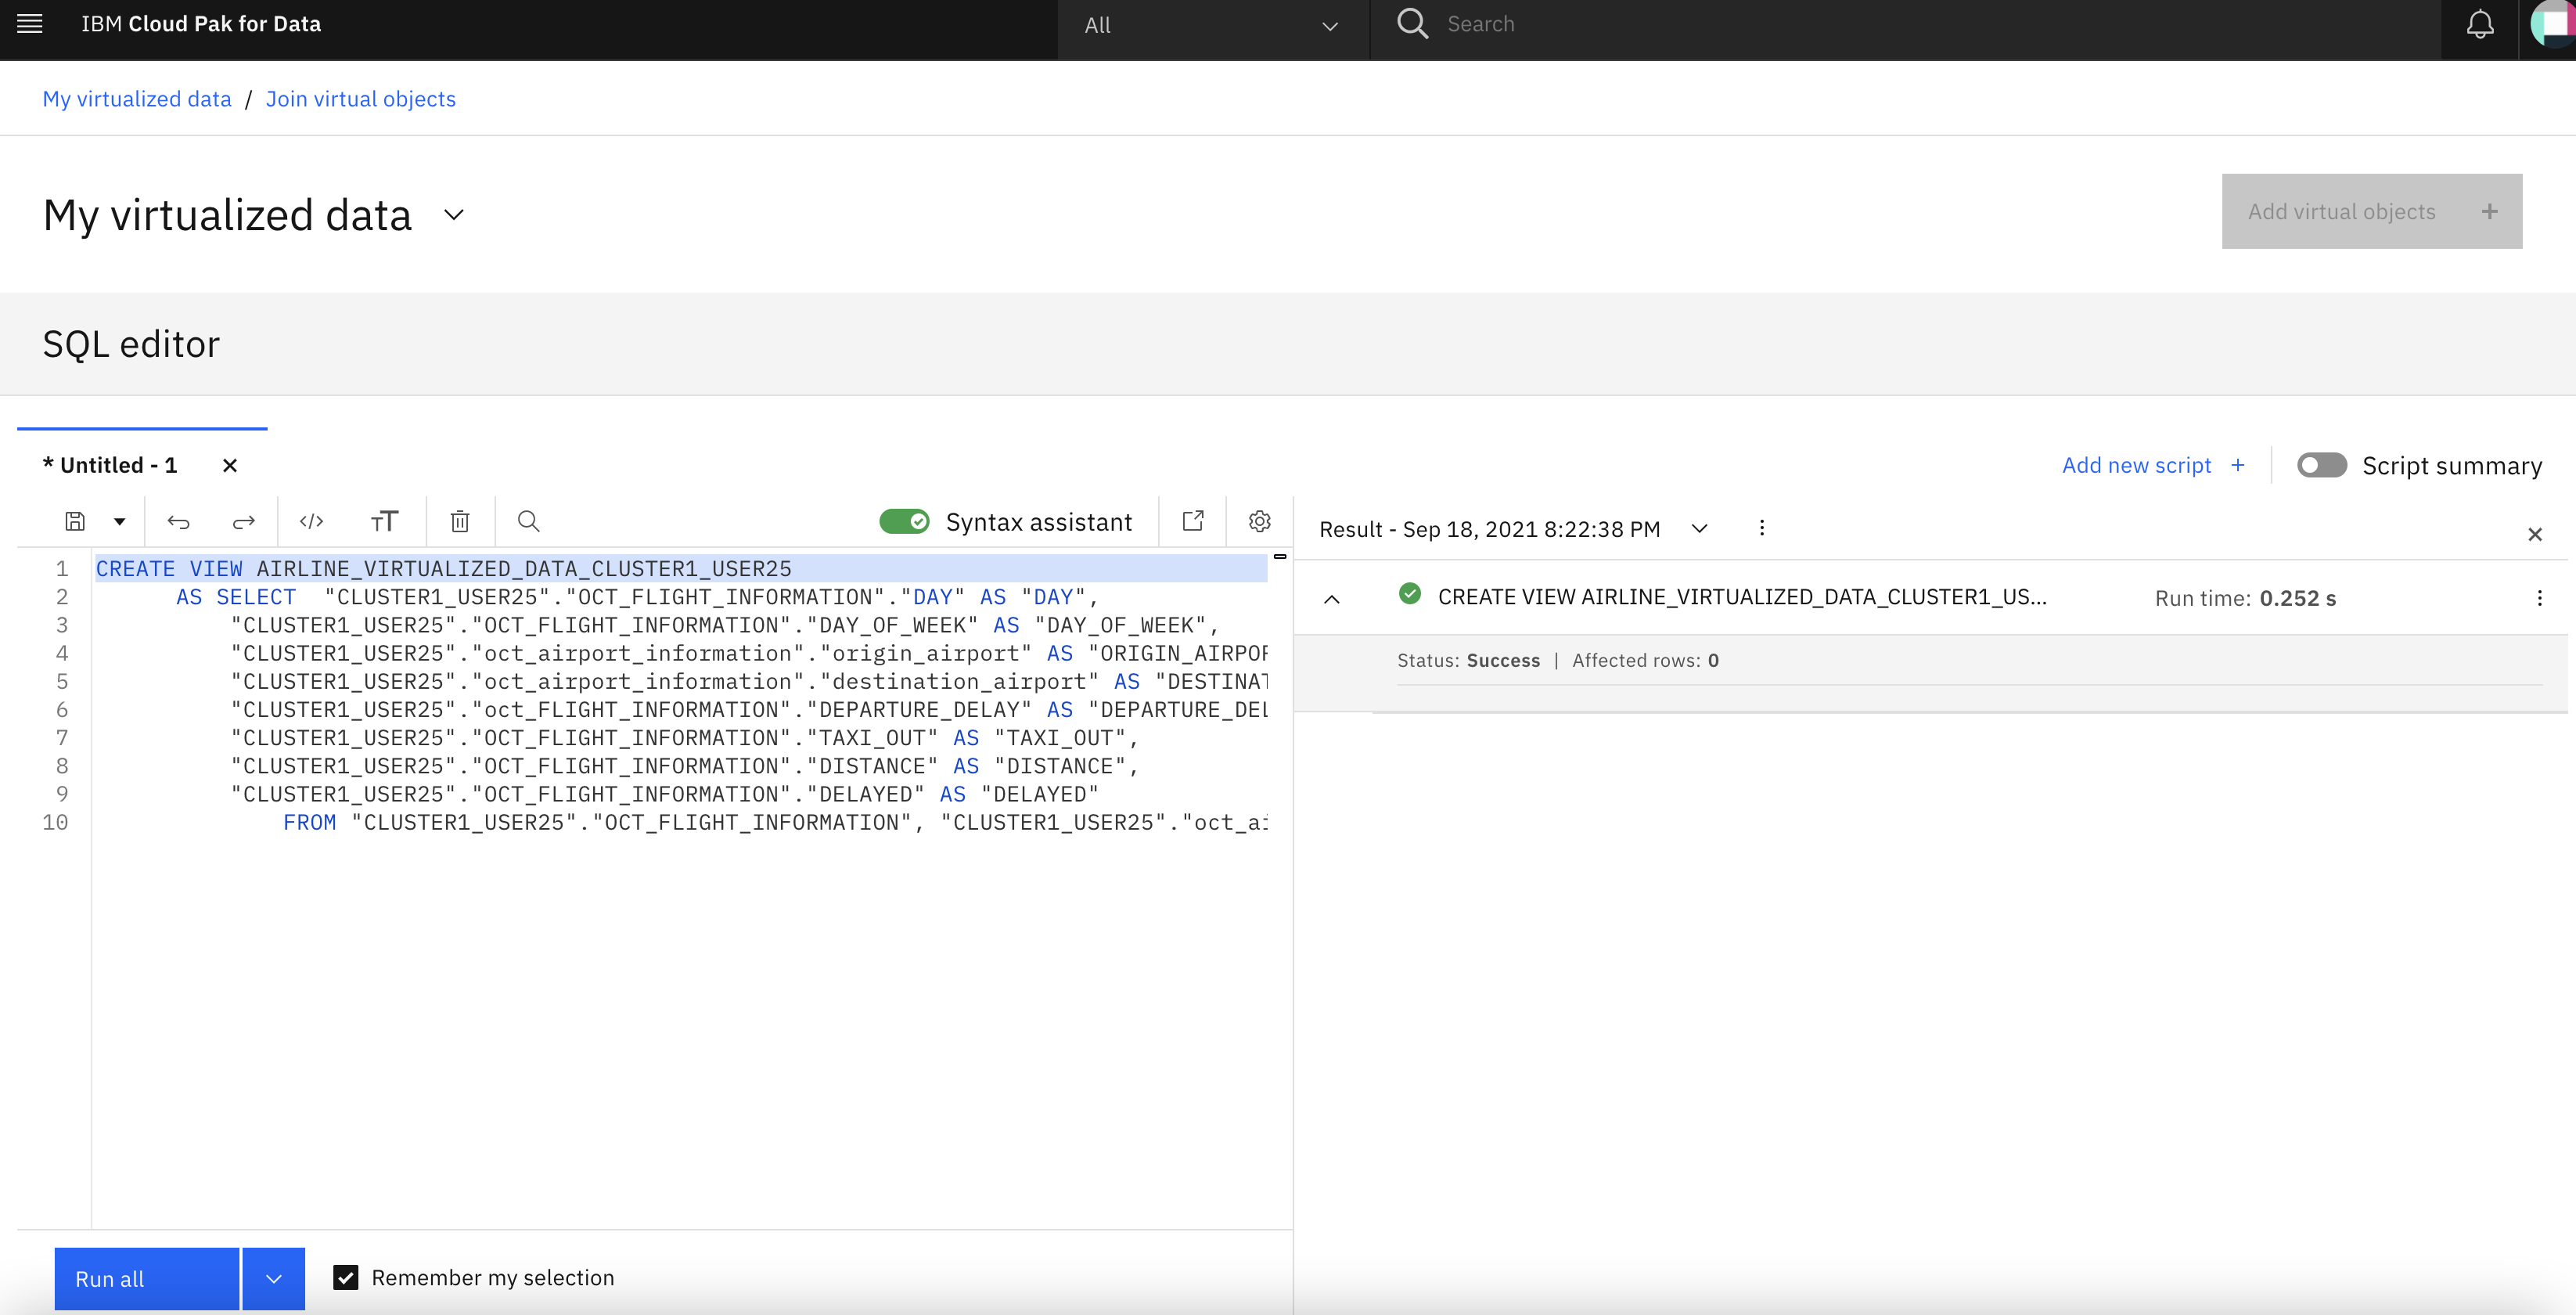

### 10. After entering the SQL query into the box, select 'Run all' in the bottom left hand corner.  This will create the joined view.
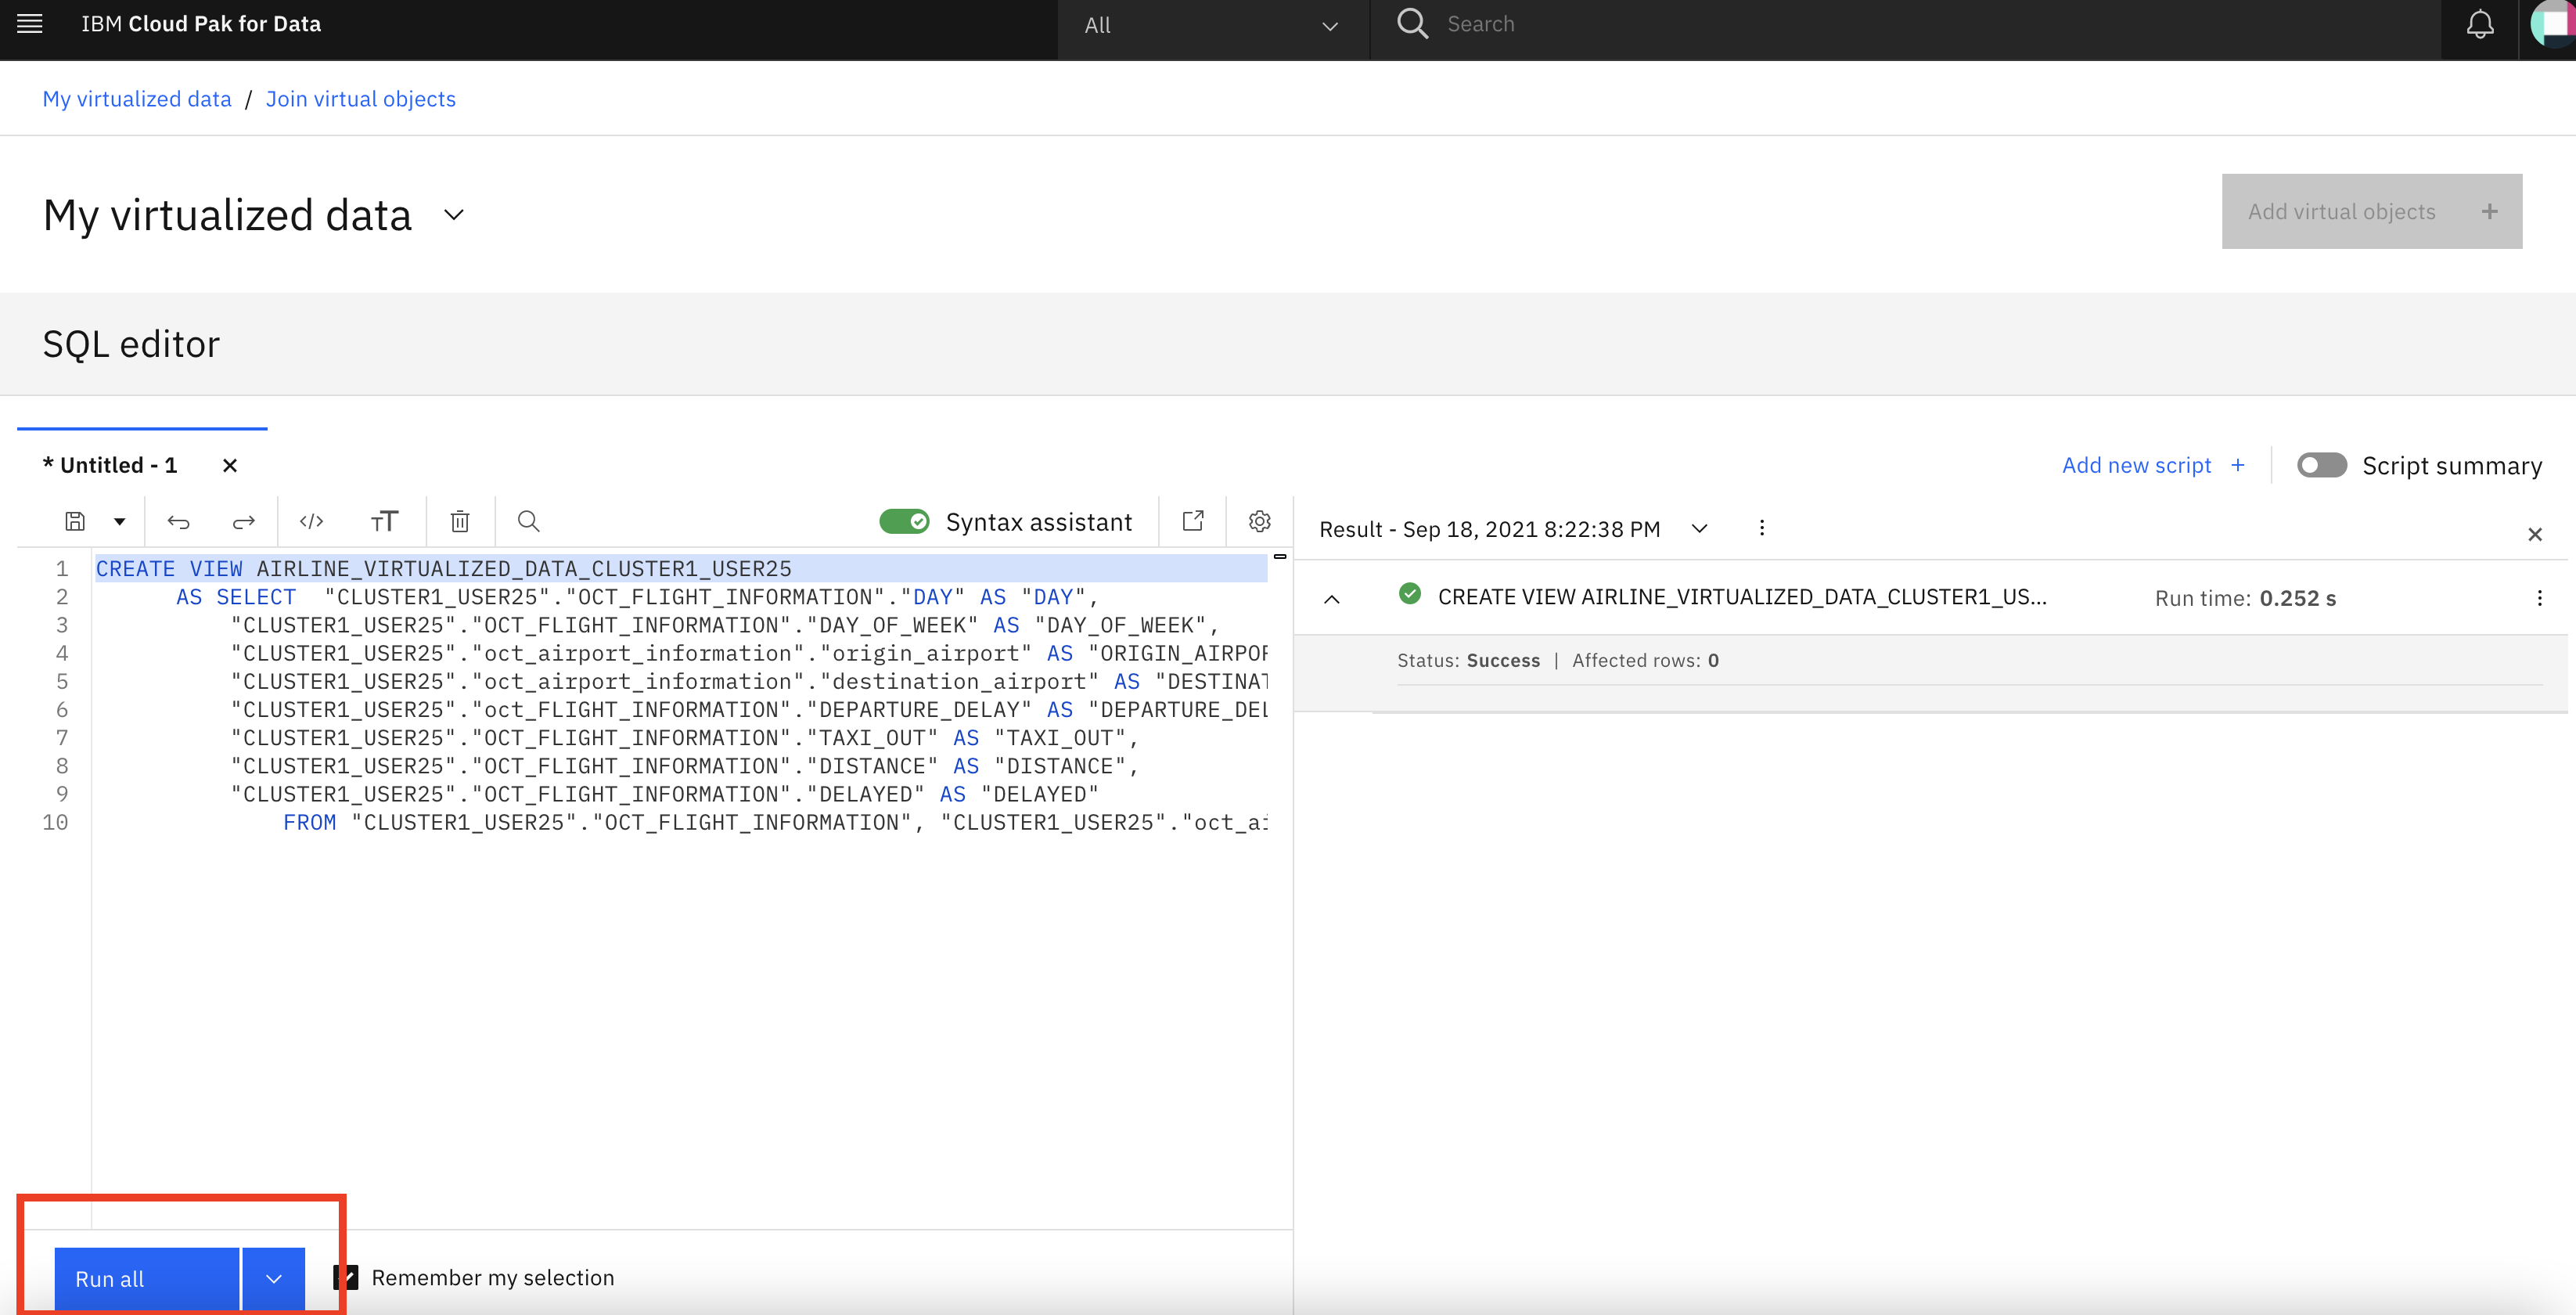

### 11. Select 'My virtualized data' in the top lefthand corner.
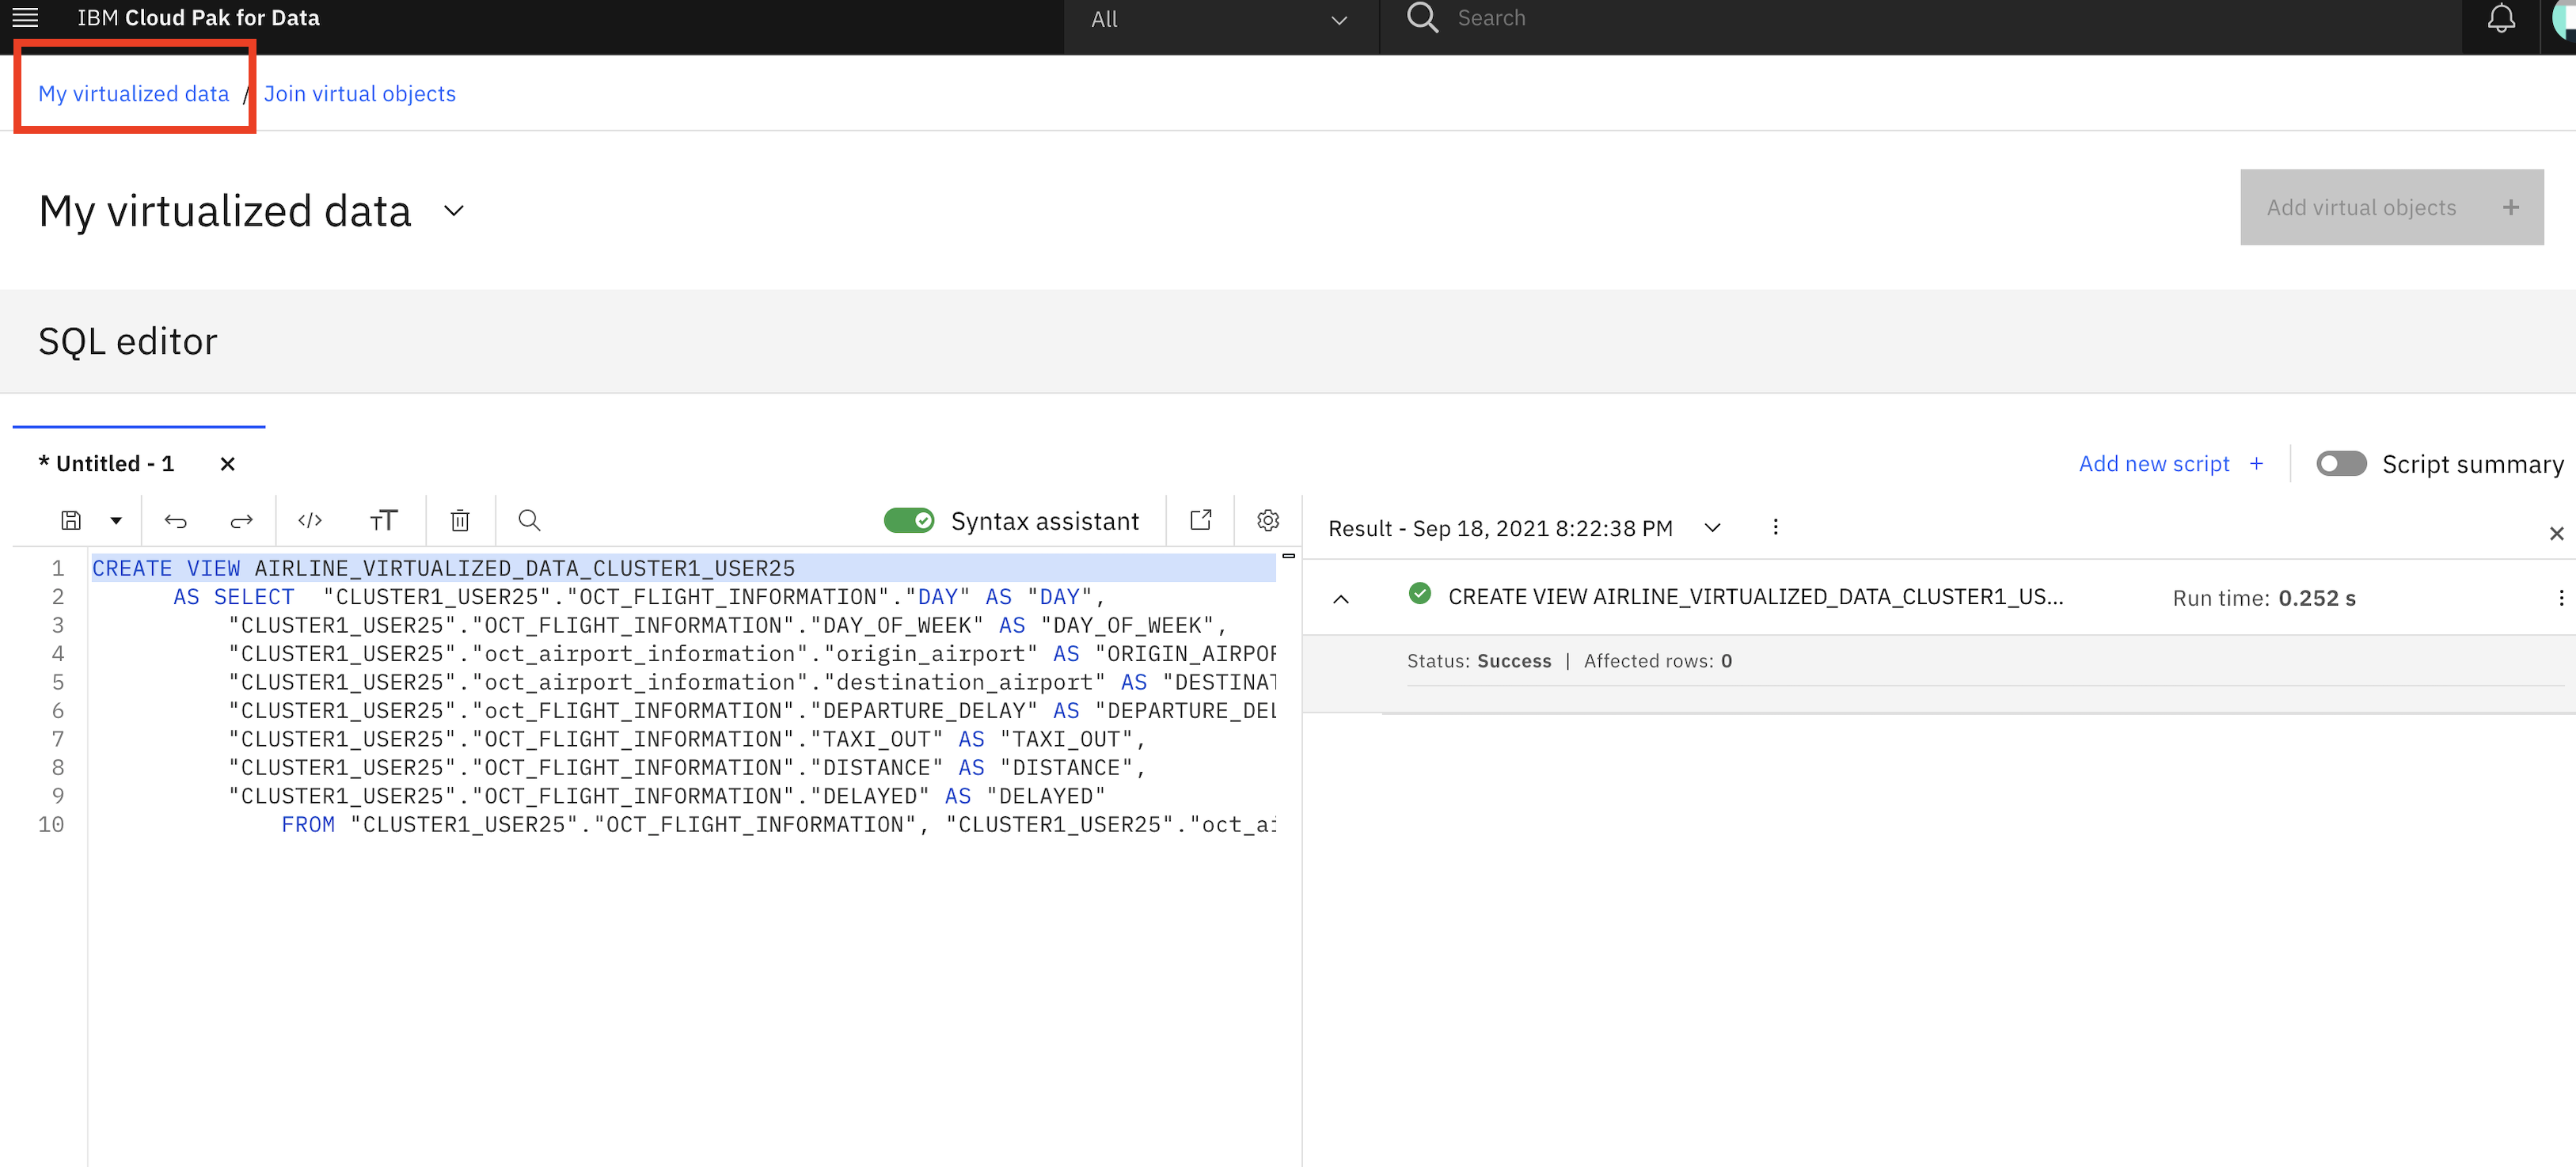

### 12. Locate the joined view that you just created ('AIRLINE_VIRTUALIZED_DATA_"USER_NAME"), select the three dots on the righthand side and then select 'Preview'
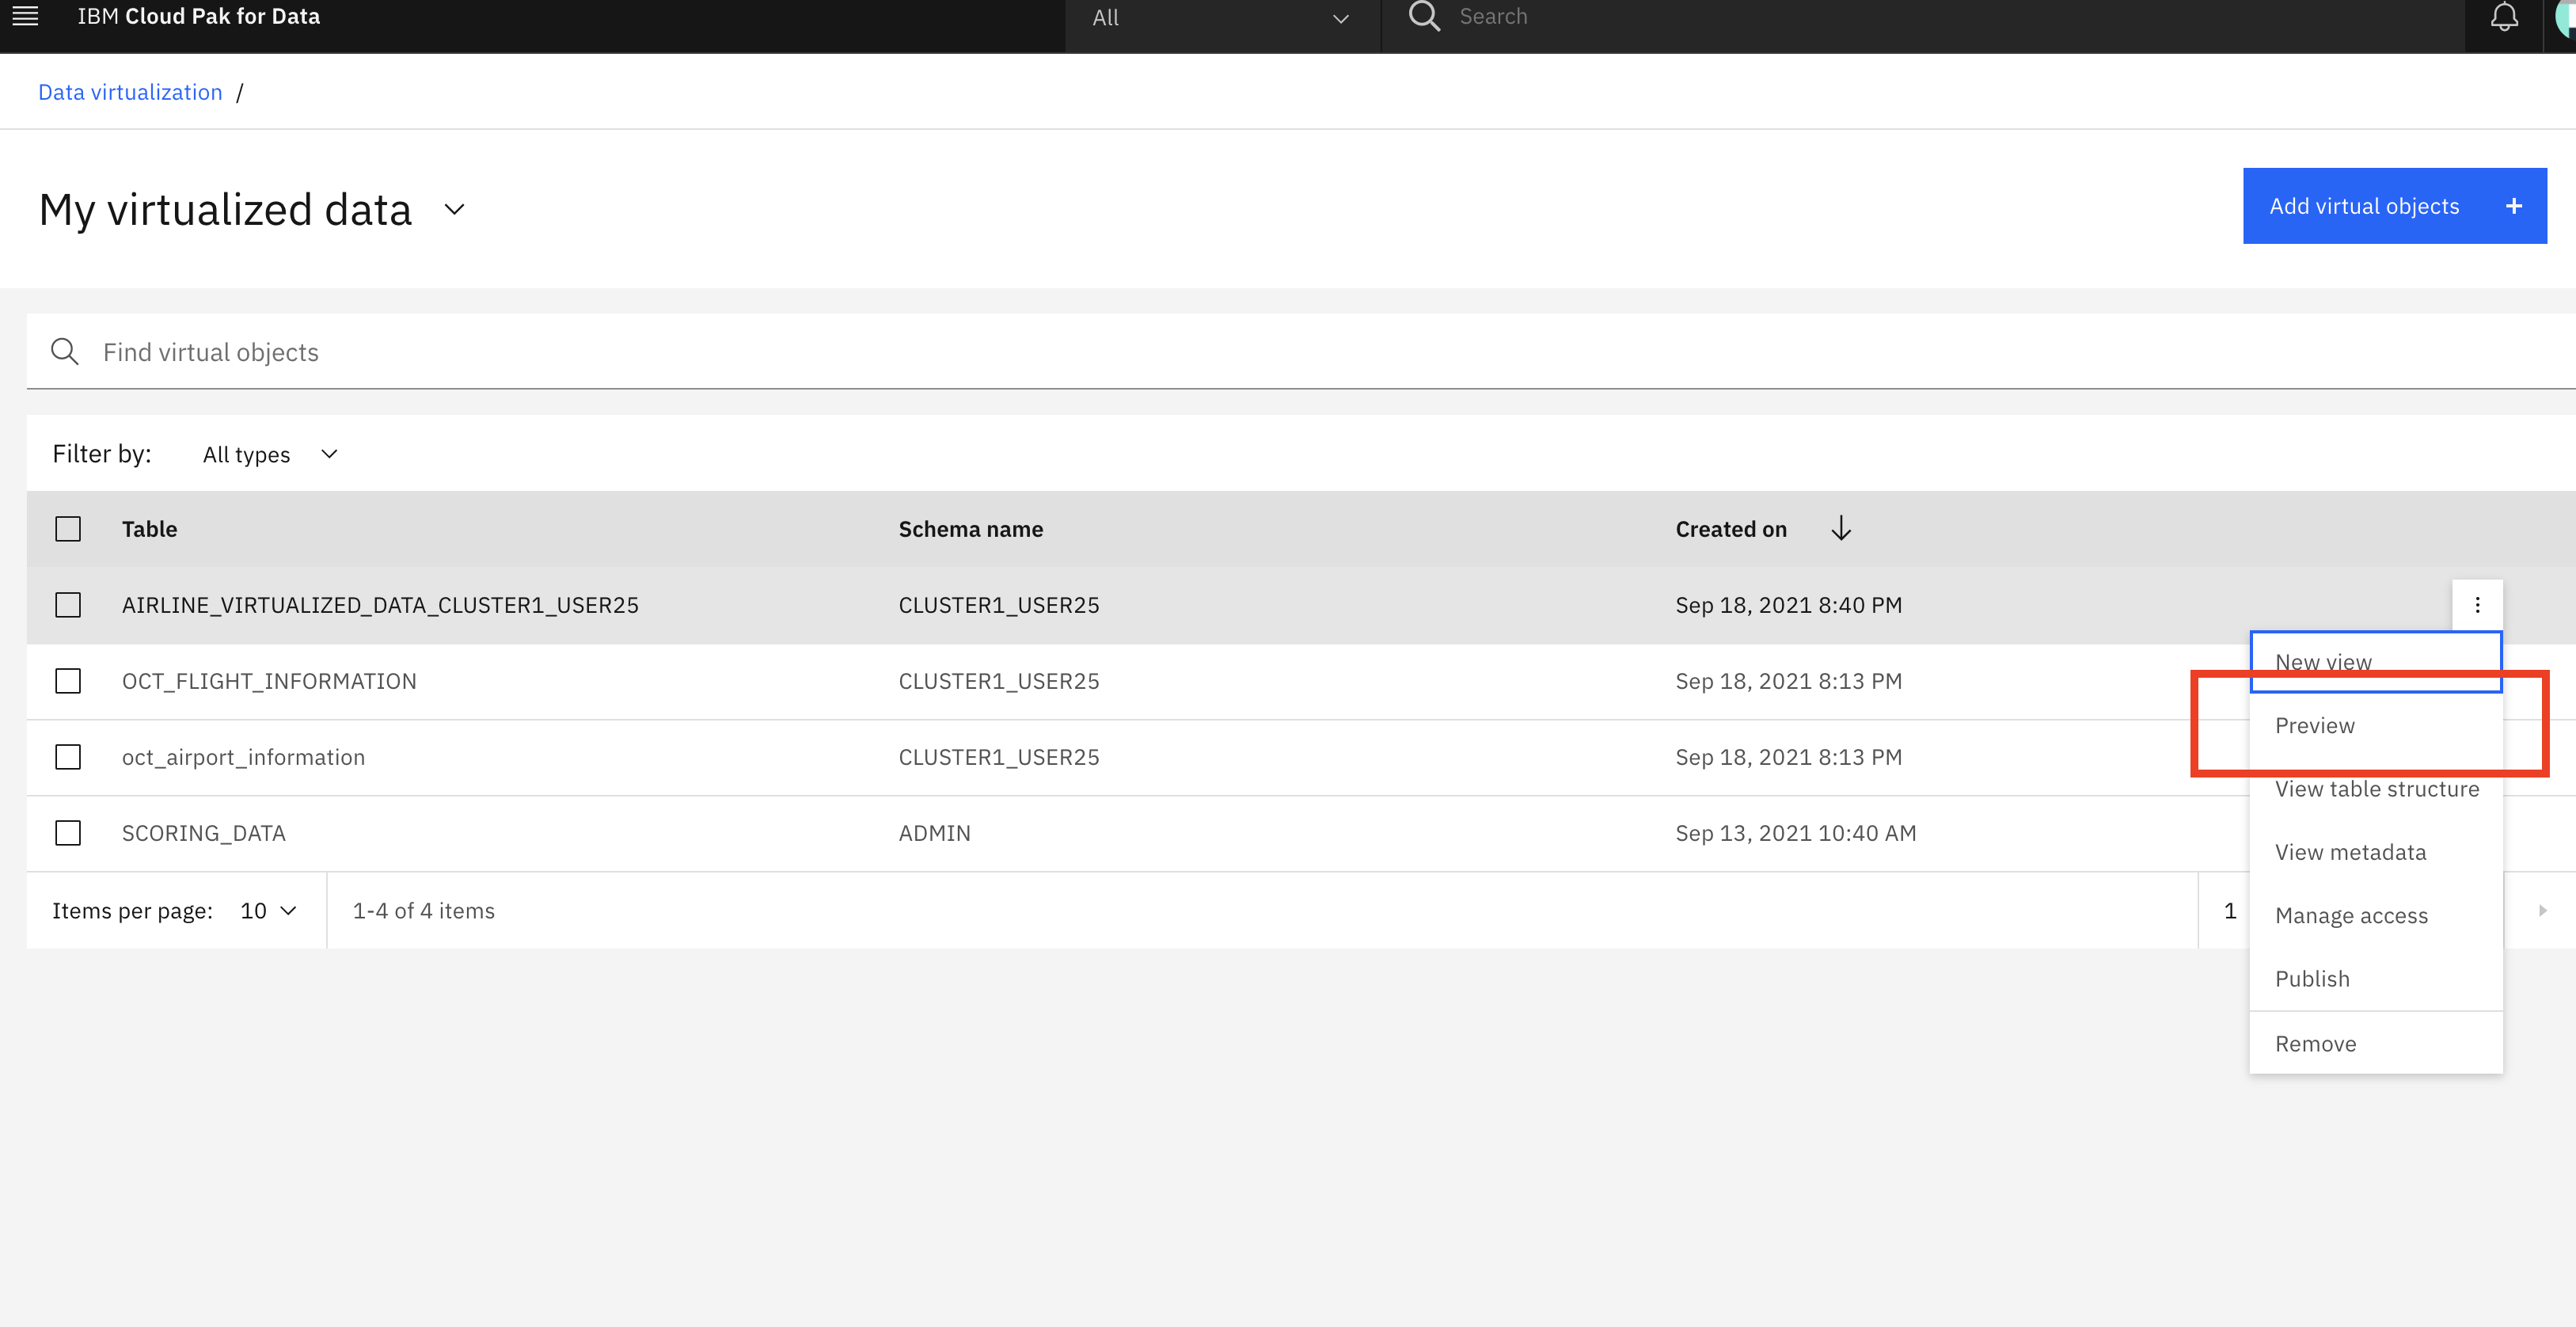

### 13.  Confirm that the preview of your virtualized asset contains exactly the same 8 columns (same name and data types) as the screenshot below.  If you encounter an error when trying to preview your virtual table or the columns do not match, it is likely due to a problem with the SQL query.  Carefully review your query and make sure it is consistent with the samples provided. To recreate the view, you will need to delete your existing view and start again at Step 7.
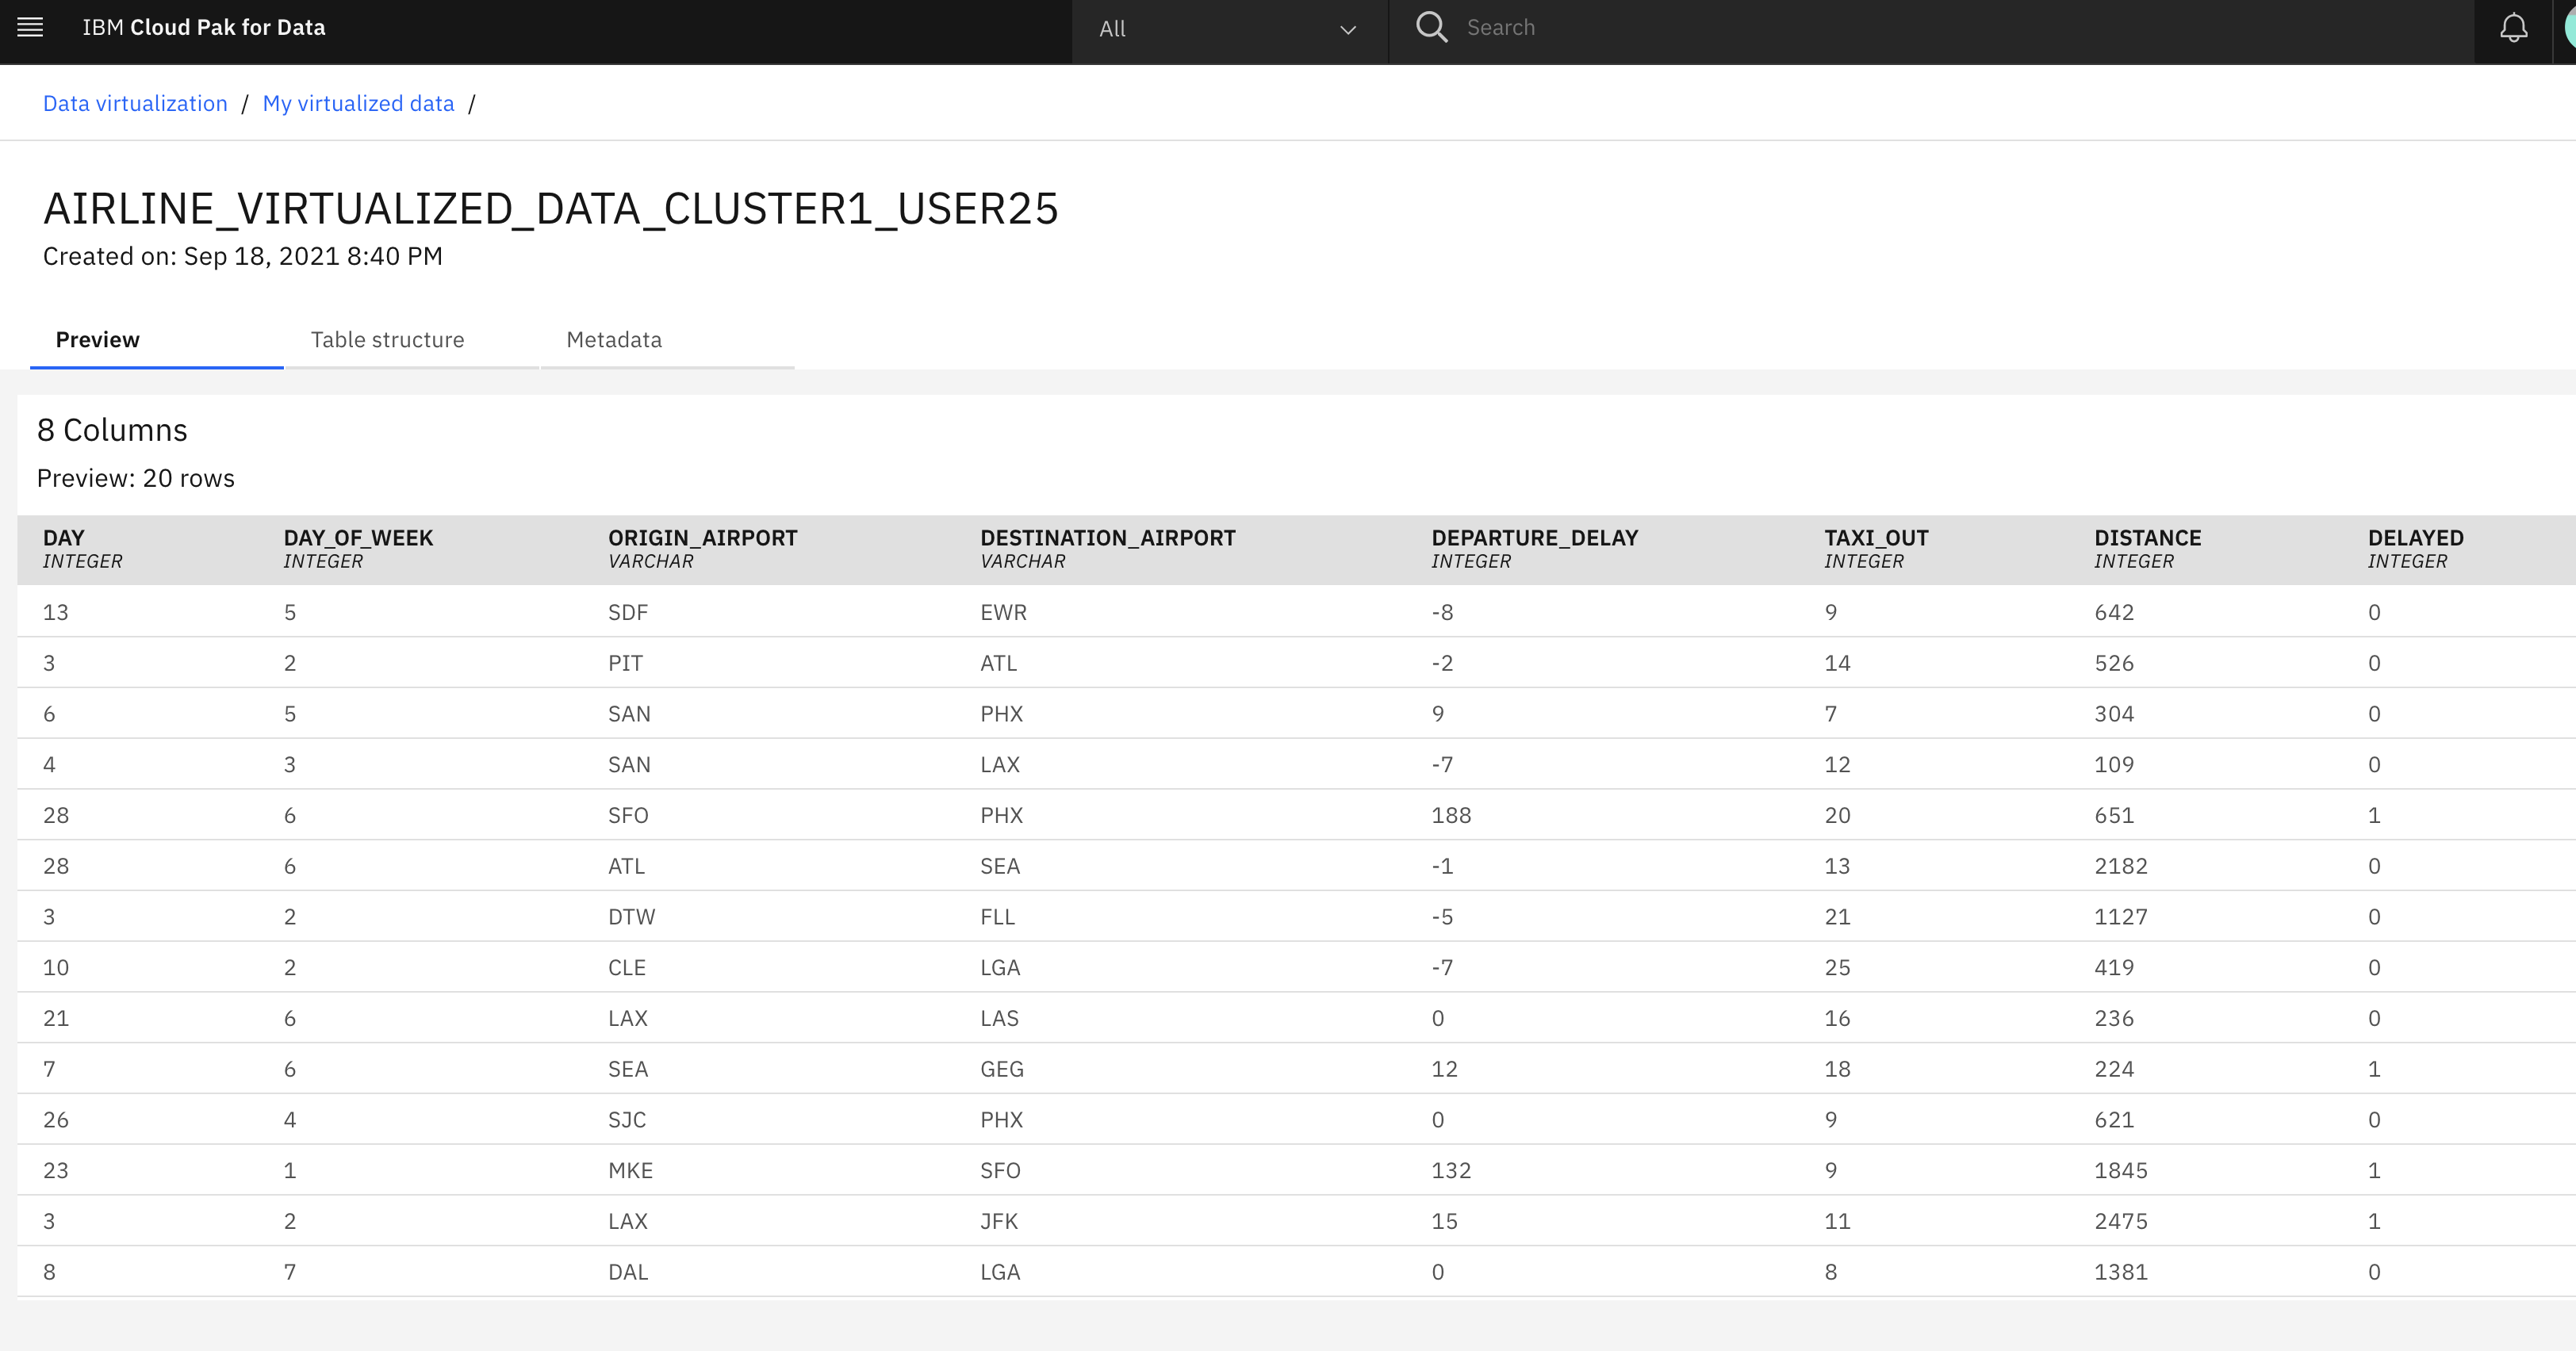


### 14. Go the navigation menu in the top lefthand corner and select 'Catalogs-> All catalogs'
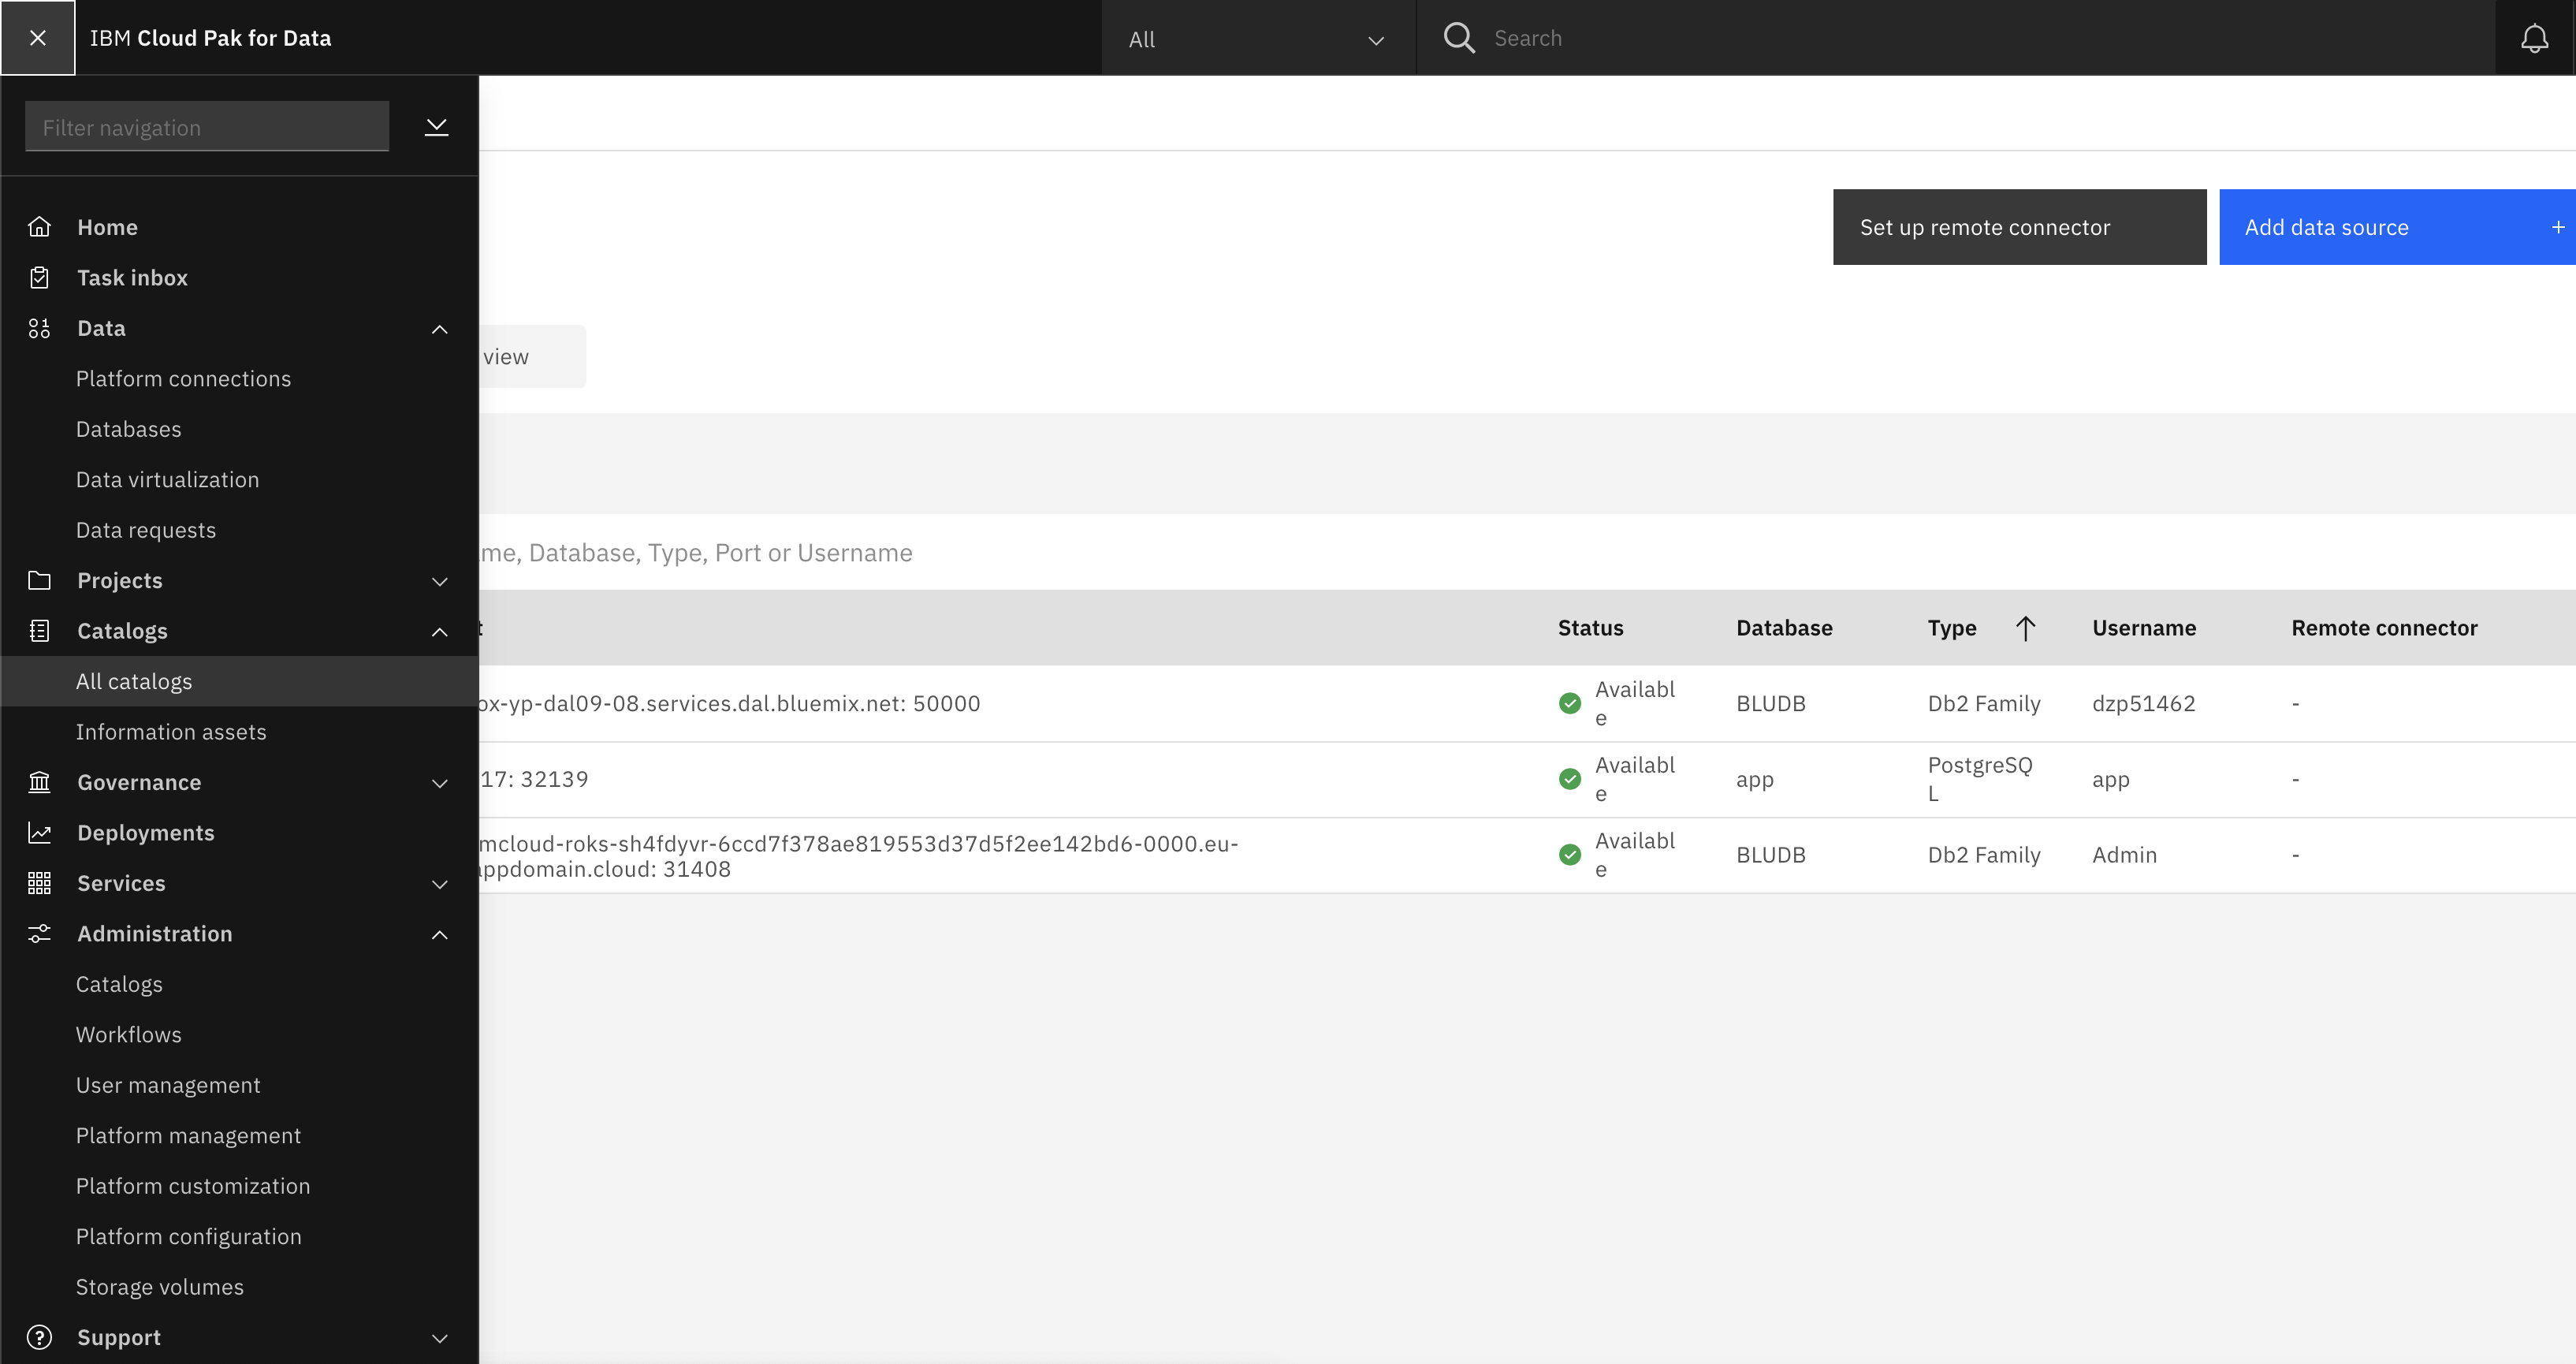

### 15. Select the catalog corresponding to your username ("Model_Catalog_USER_NAME").

### 16. Once in the catalog, the connection to DV should already be in there ('DV Connection').  In the top righthand corner, select 'Add to Catalog  +' and then choose 'Connected asset'.
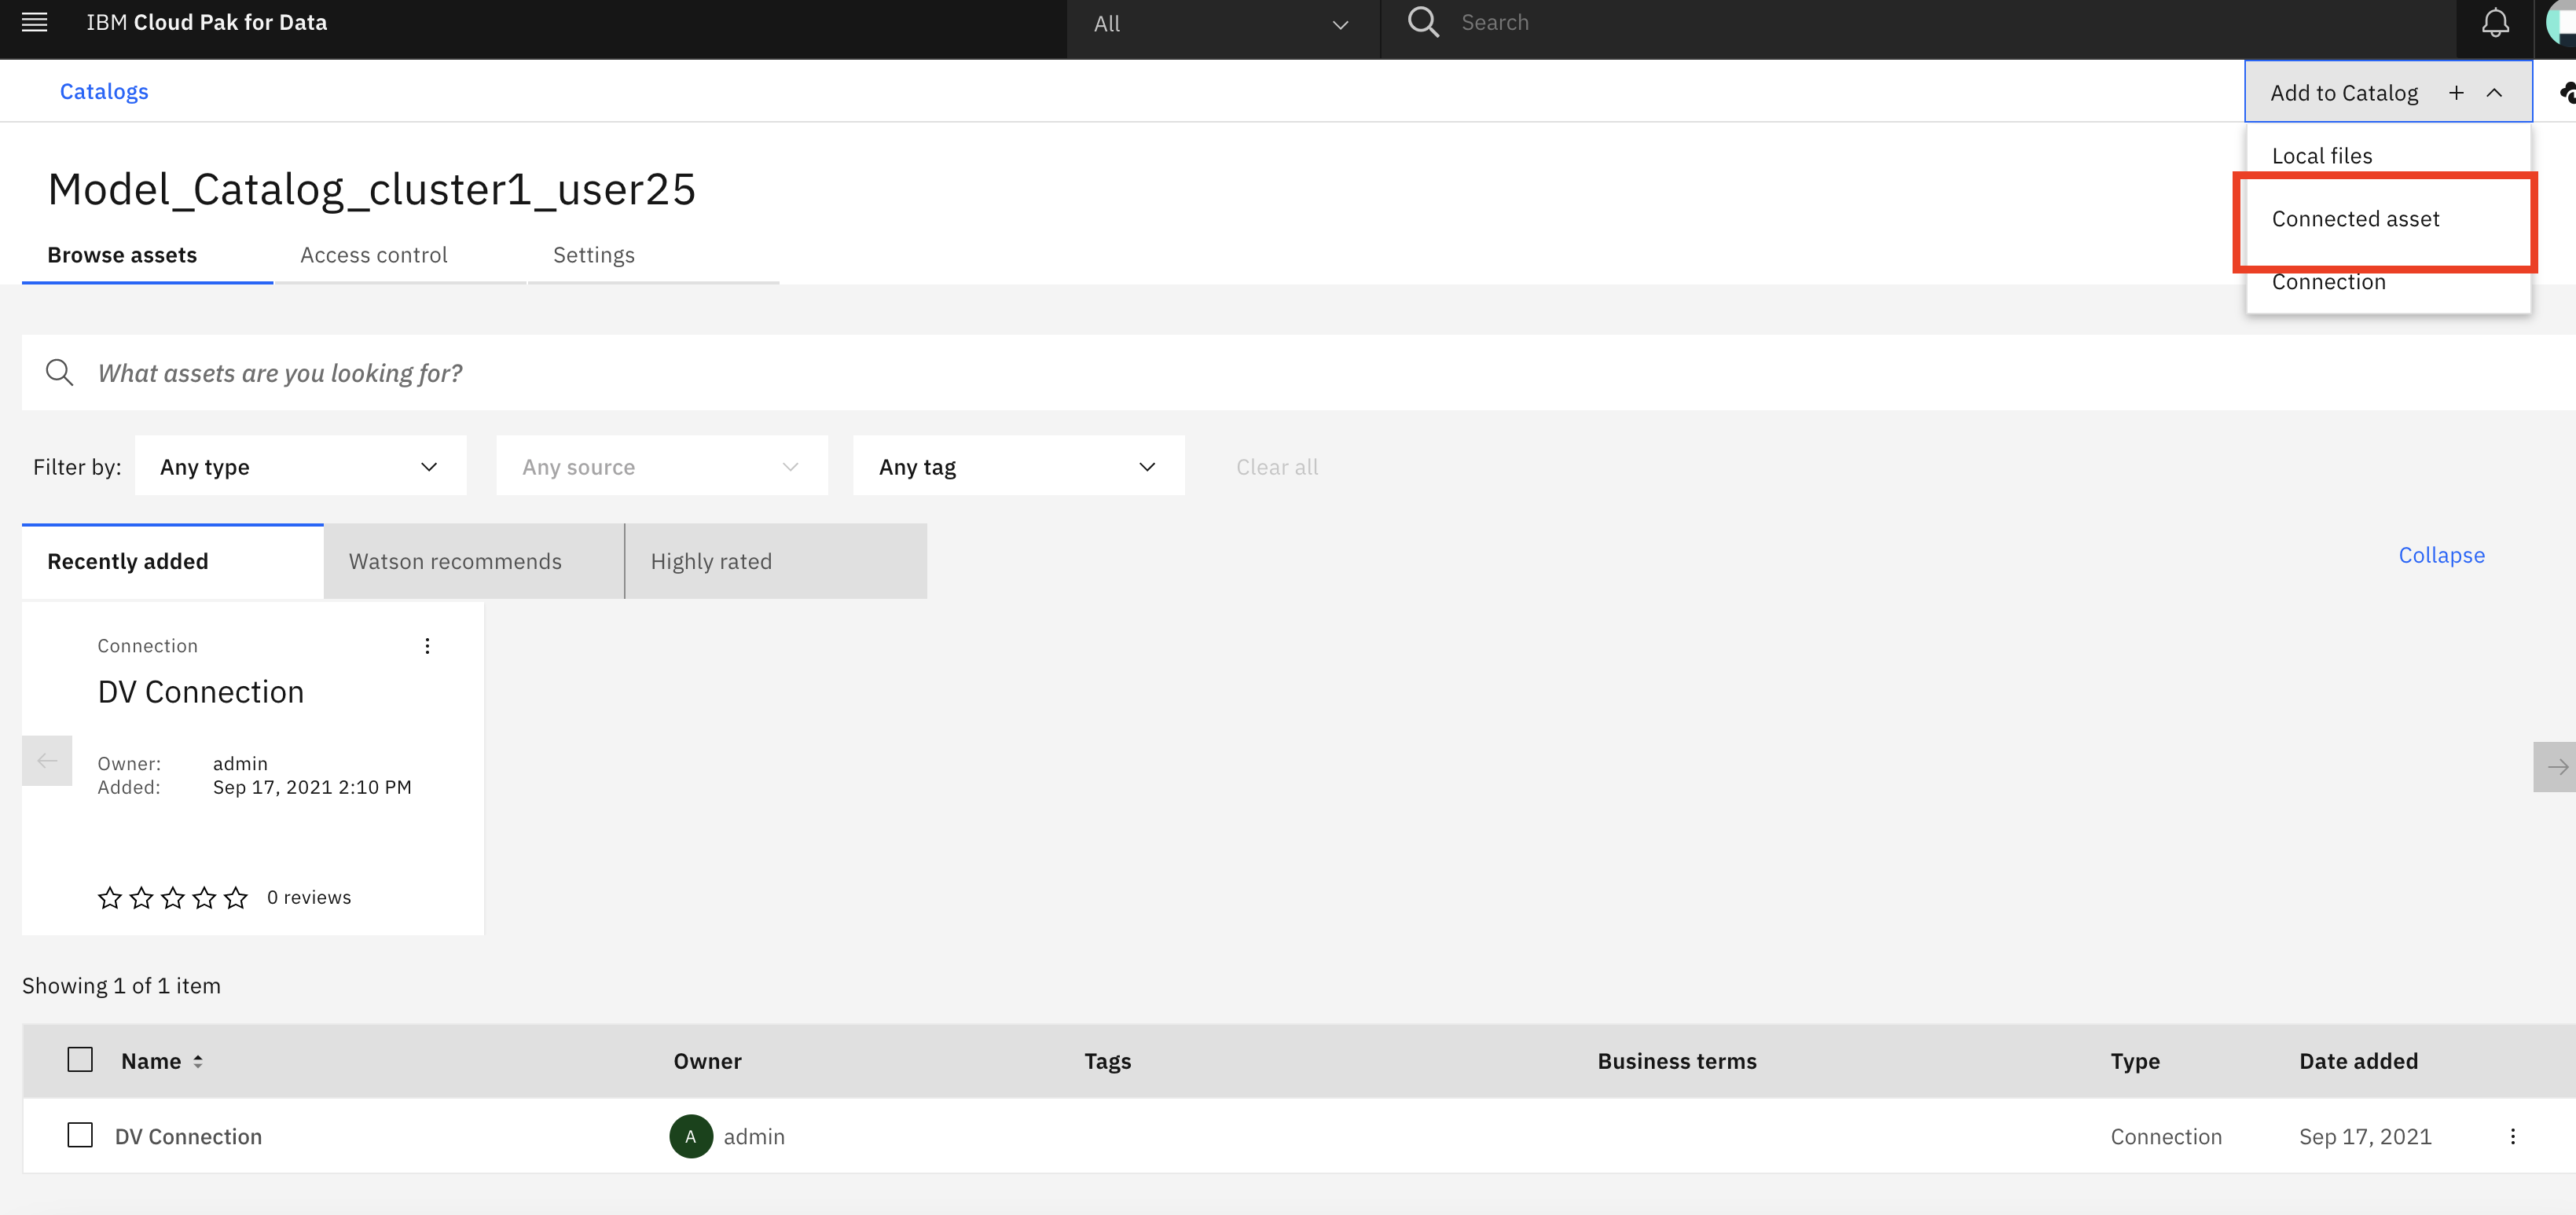

### 17. Choose 'Select source'
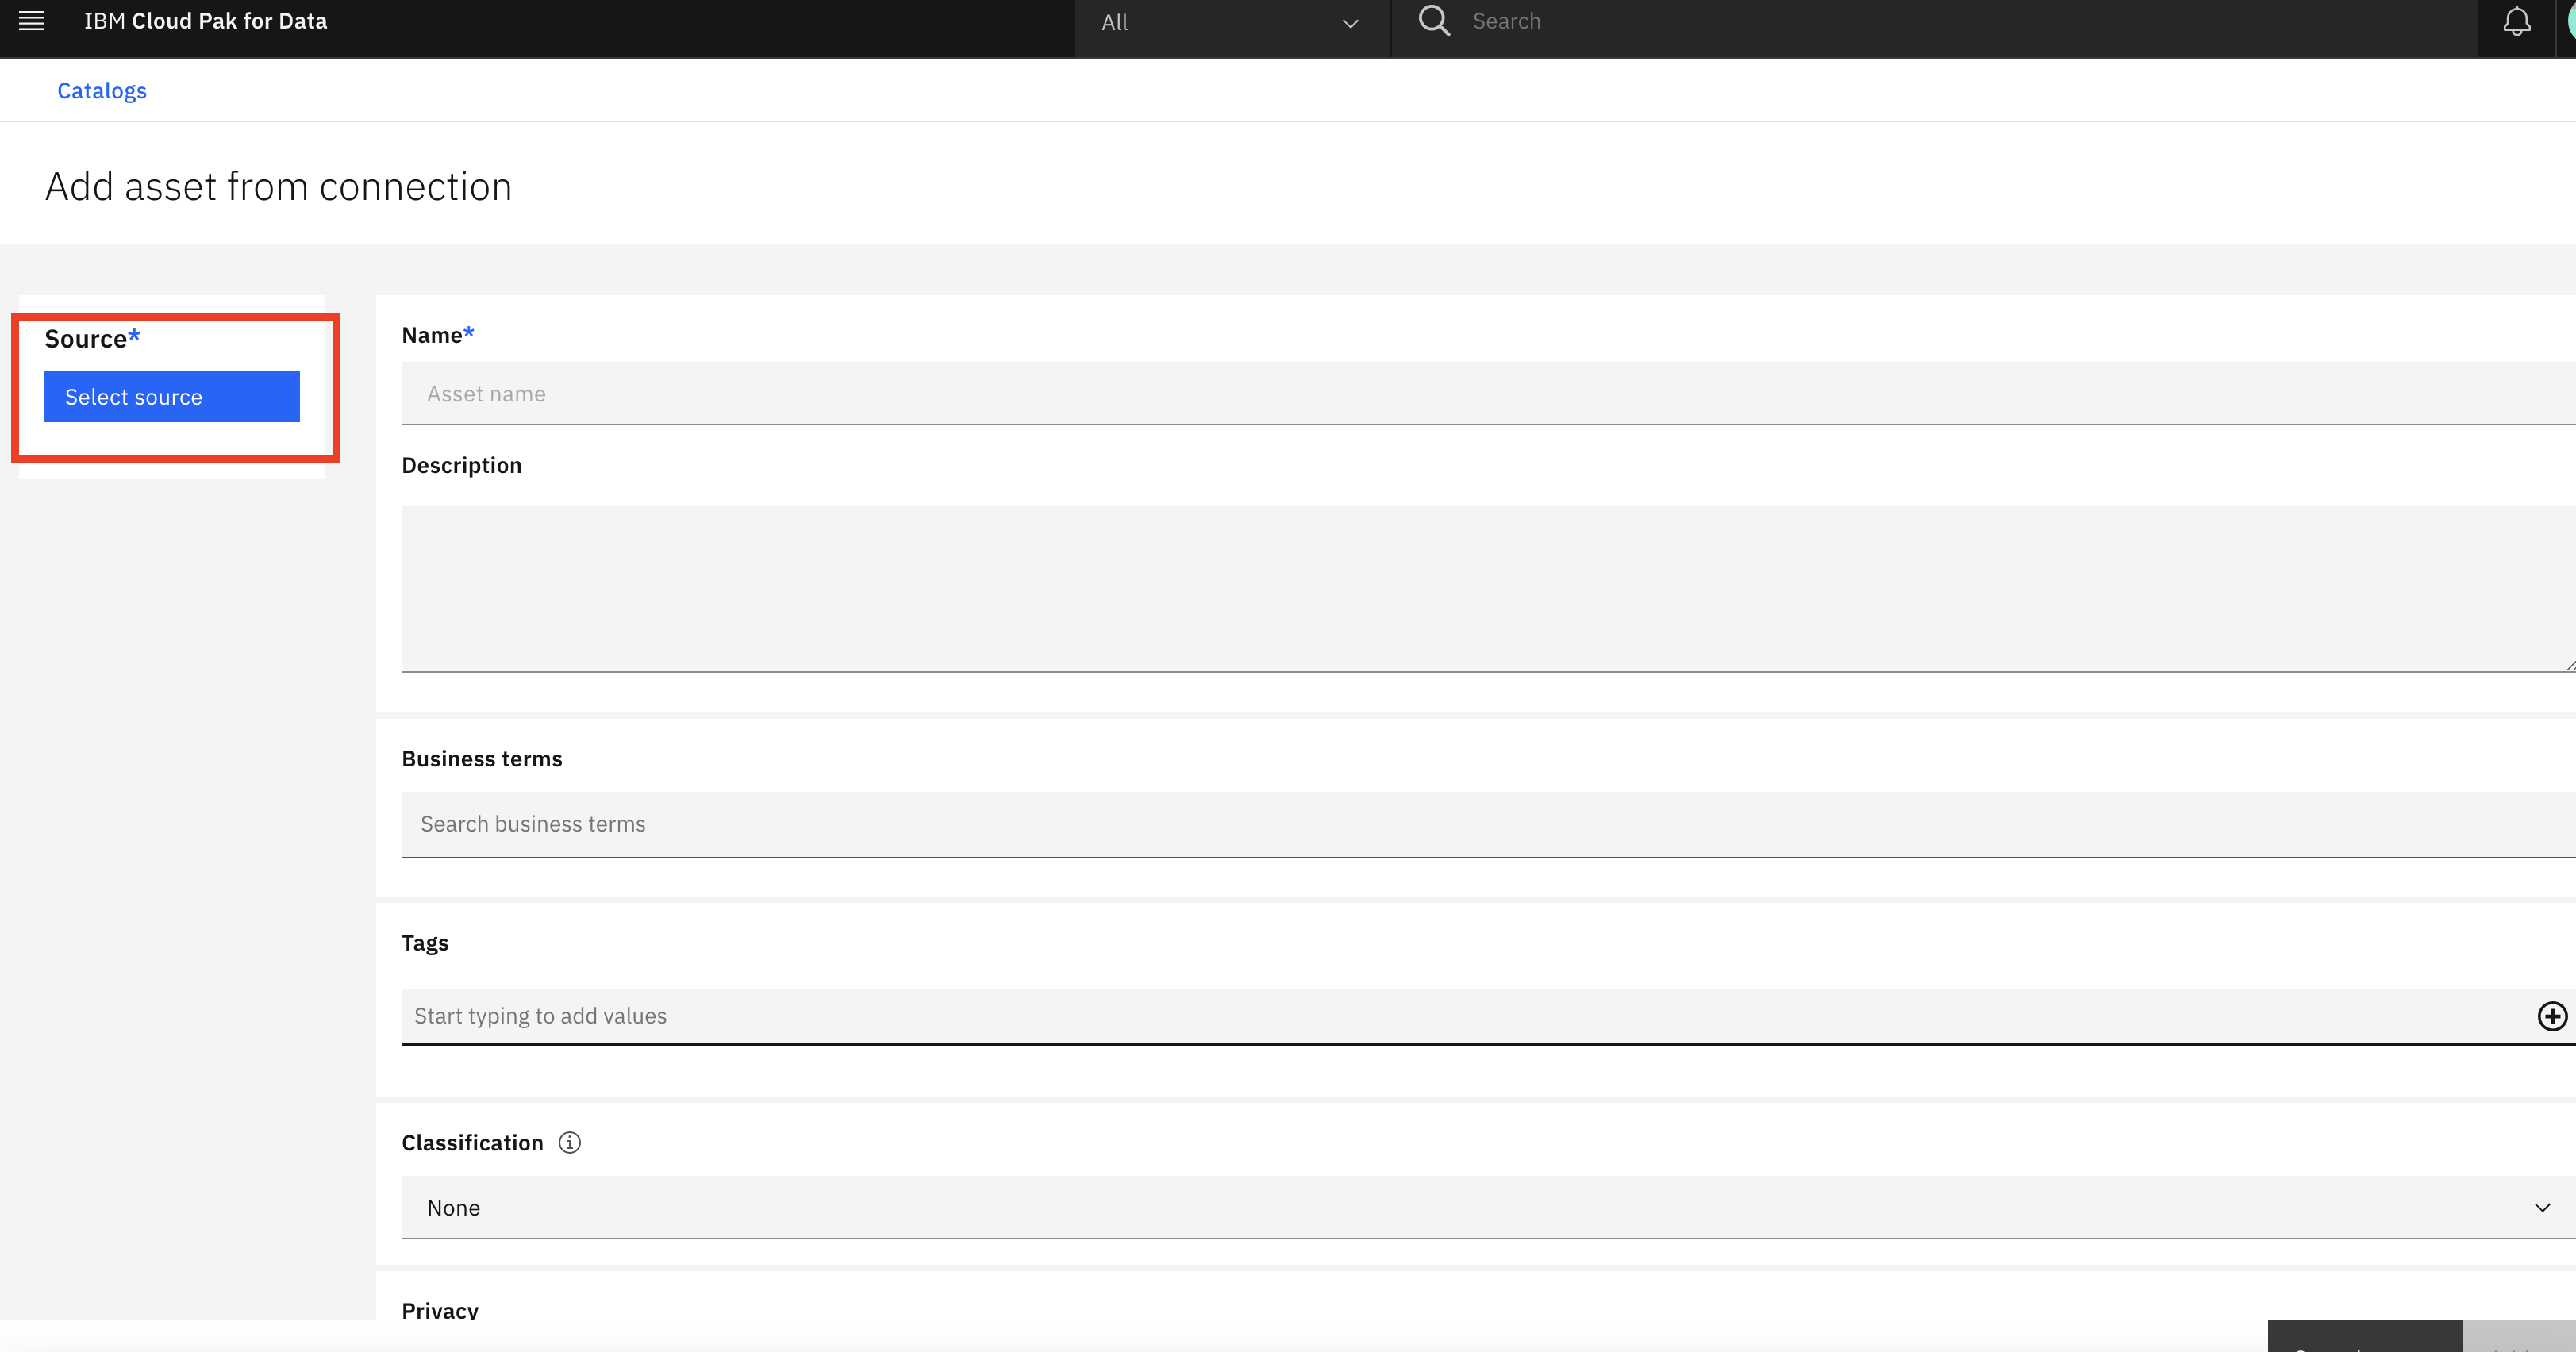


### 18. Choose 'DV Connection', search your username under 'DV Connection' pane and then select the schema and table corresponding to the virtualized joined view that was created in Step 10.  The table name should be 'AIRLINE_VIRTUALIZED_DATA_(USER_NAME)'.  Then click 'Select' in the bottom right hand corner.
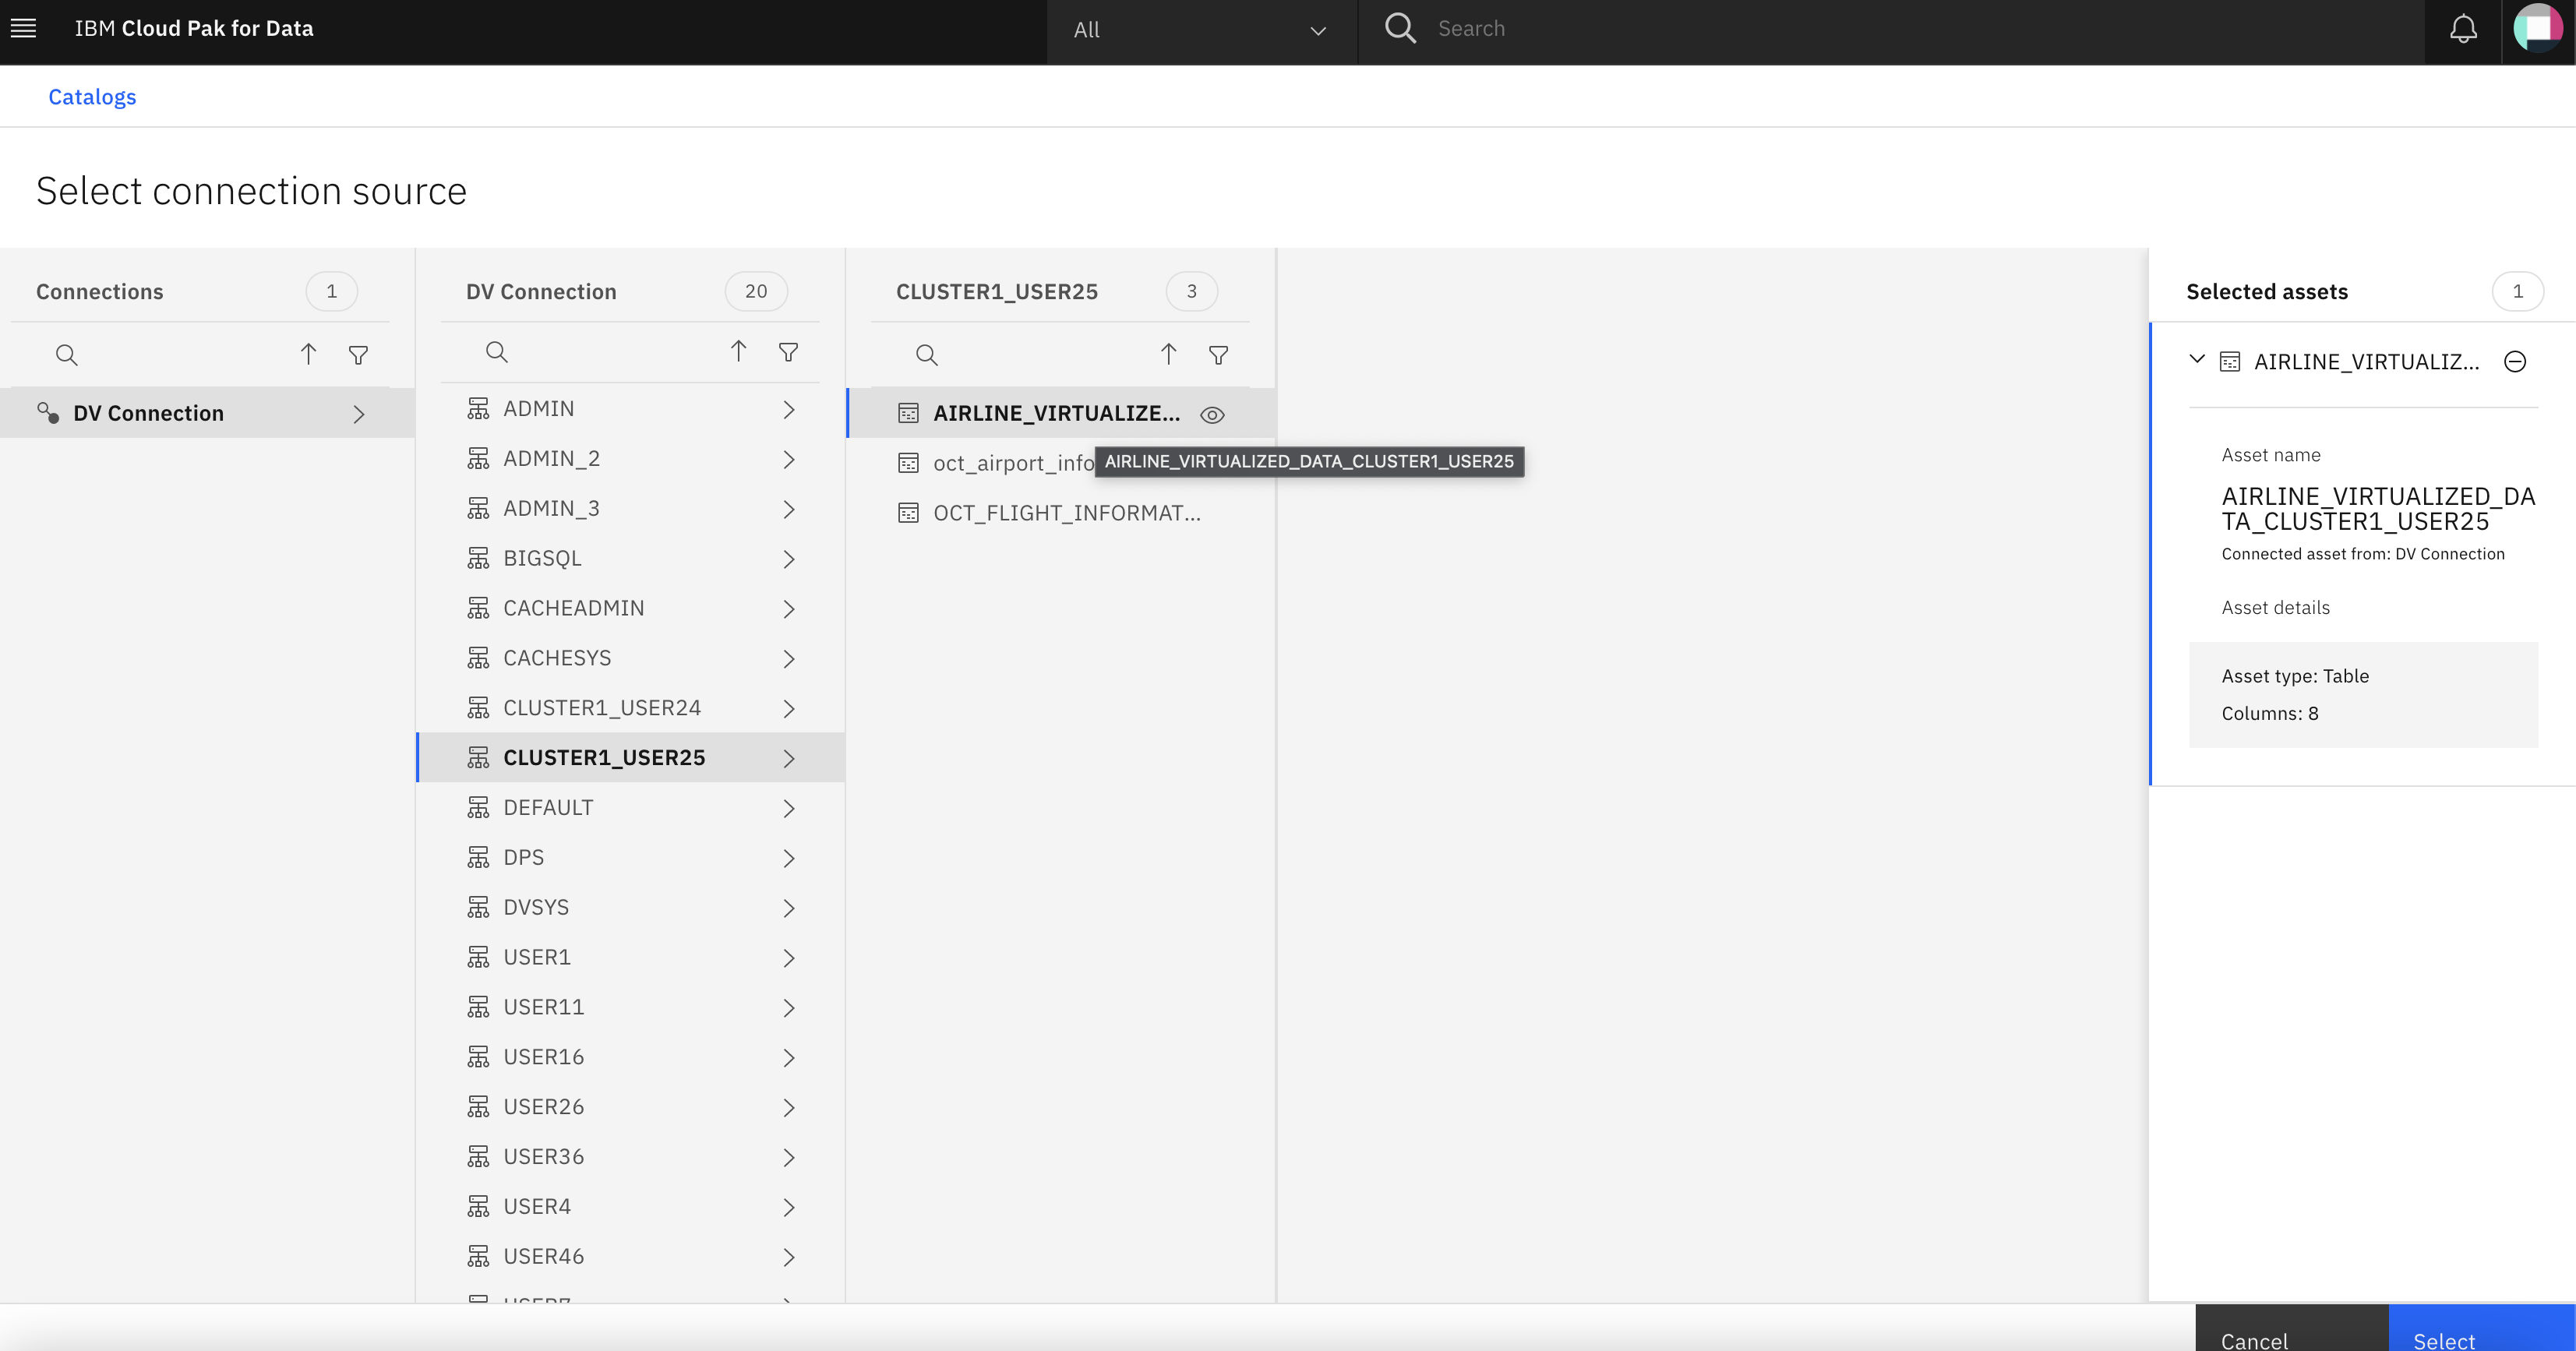

### 19. Provide the name for the asset.  Use the same table name as the virtualized table, but with camel case (e.g. 'Airline_Virtualized_Data_Cluster1_User25').  Then select 'Add' in the bottom right hand corner.
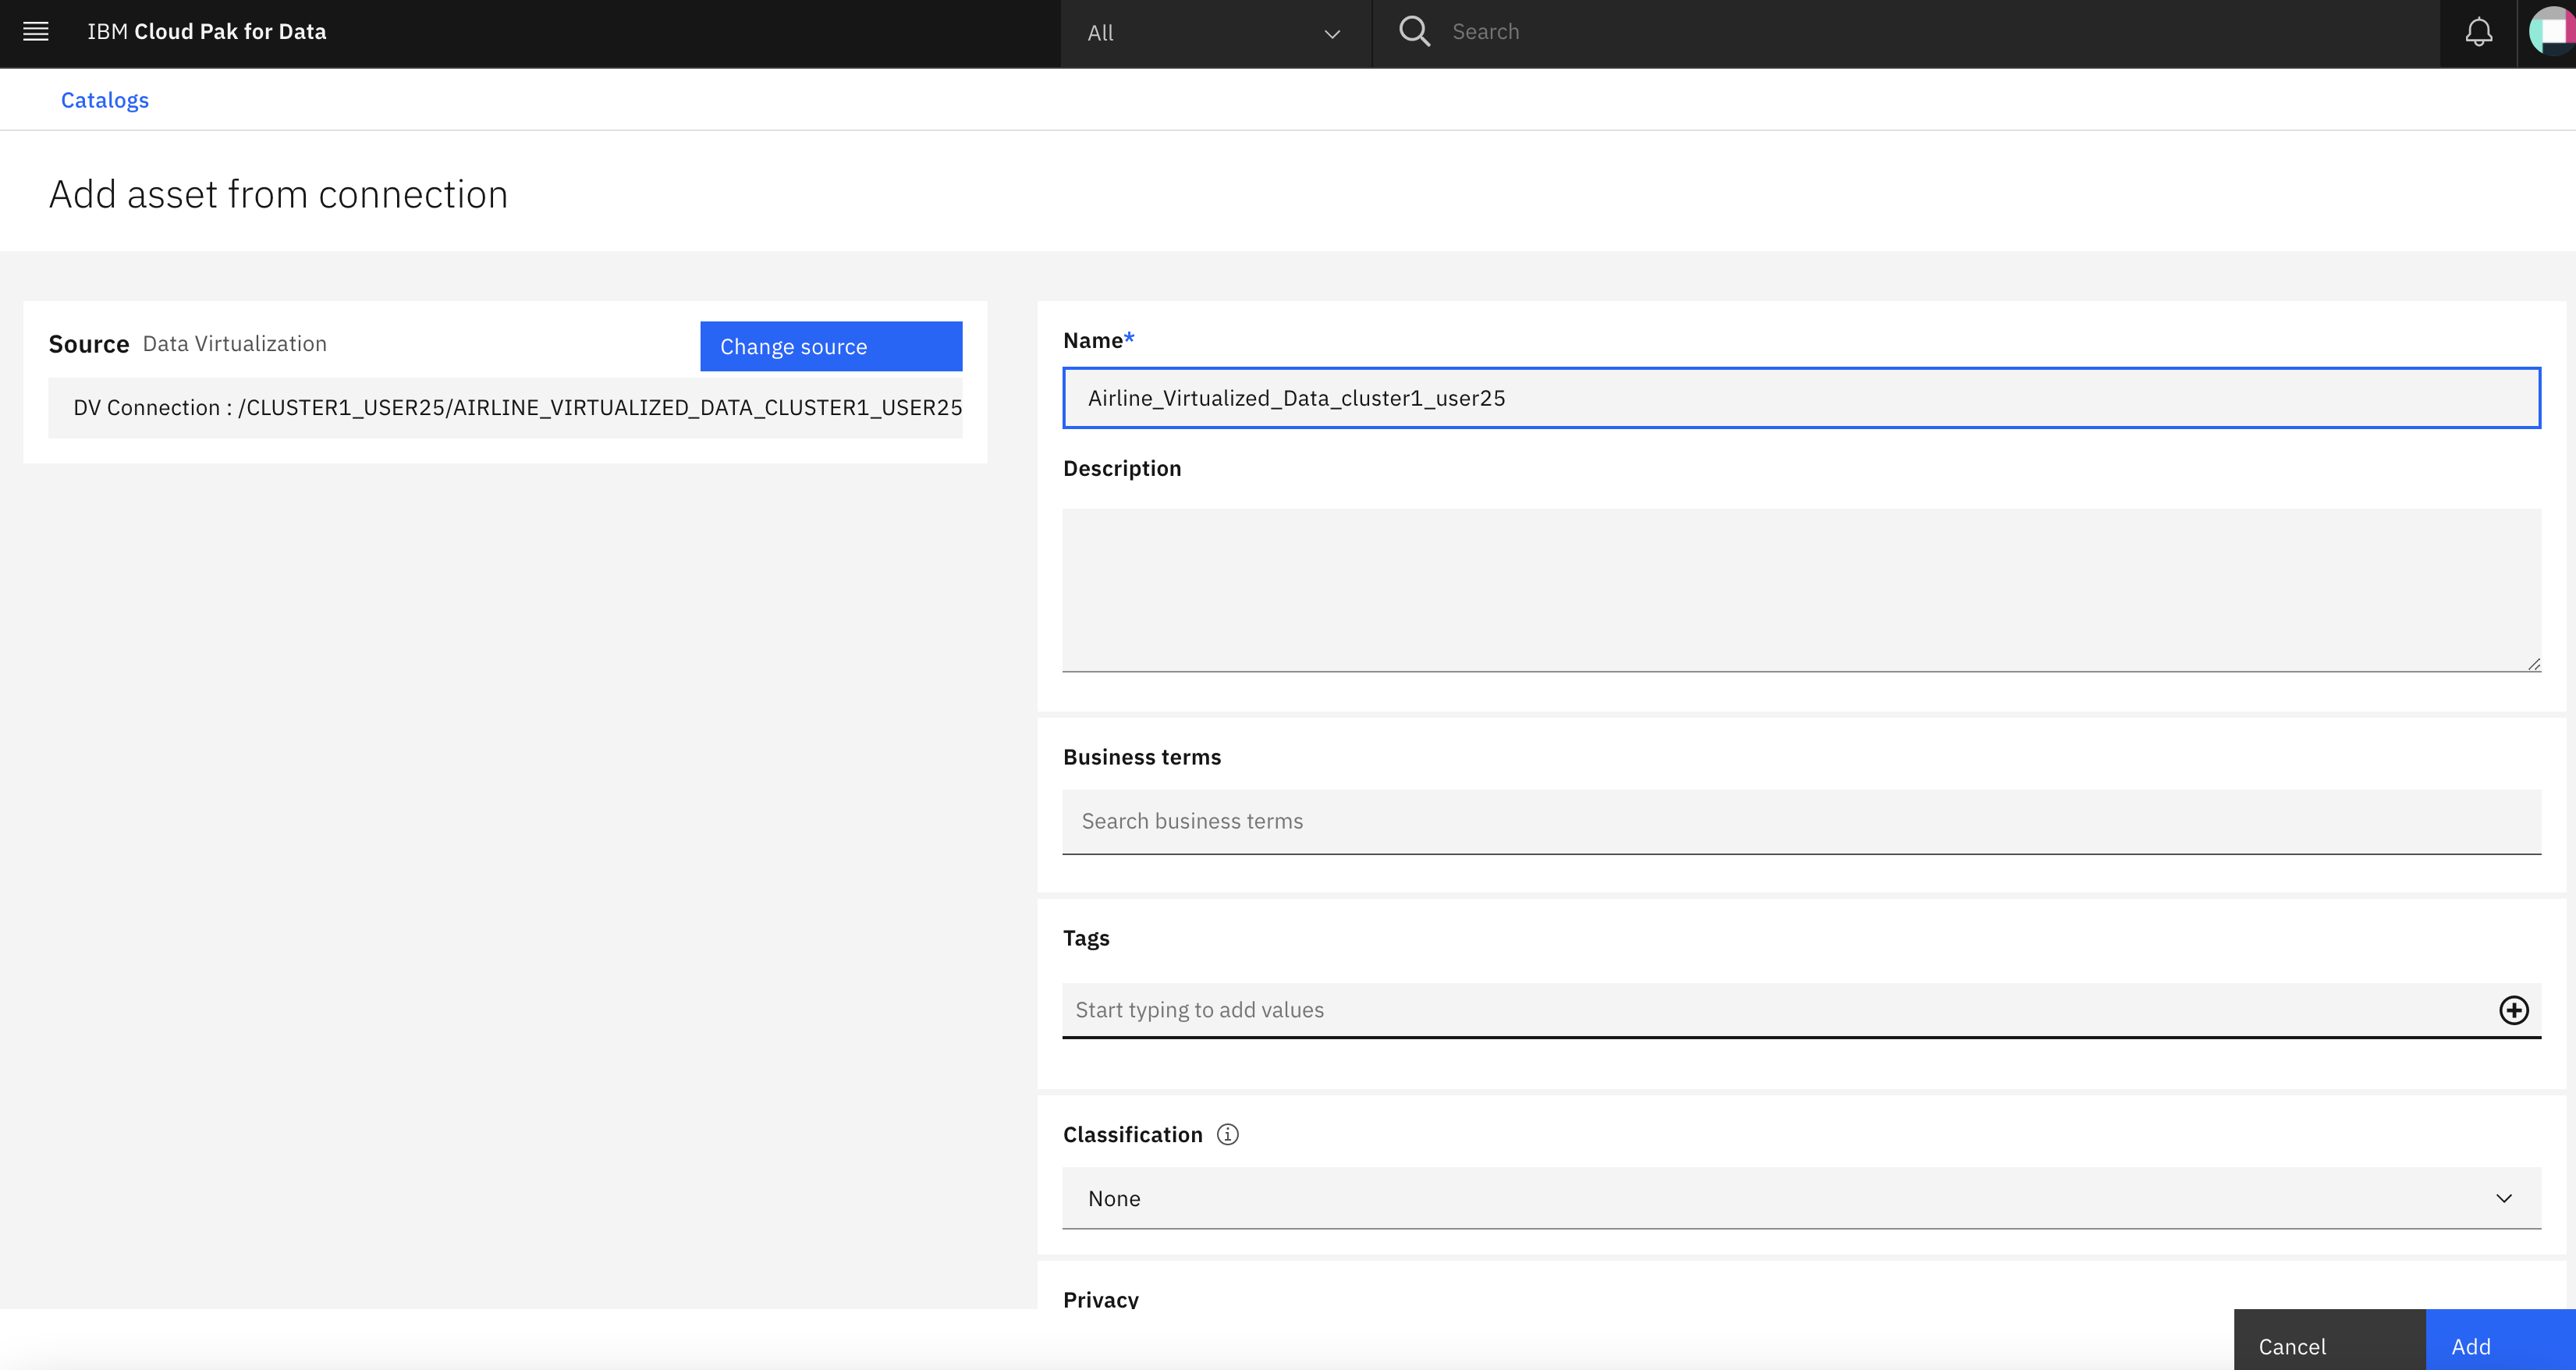

### 20.  Click into the 'Tags' section, type 'training data', and then select the '+' icon on the righthand side to add the tag to the asset.
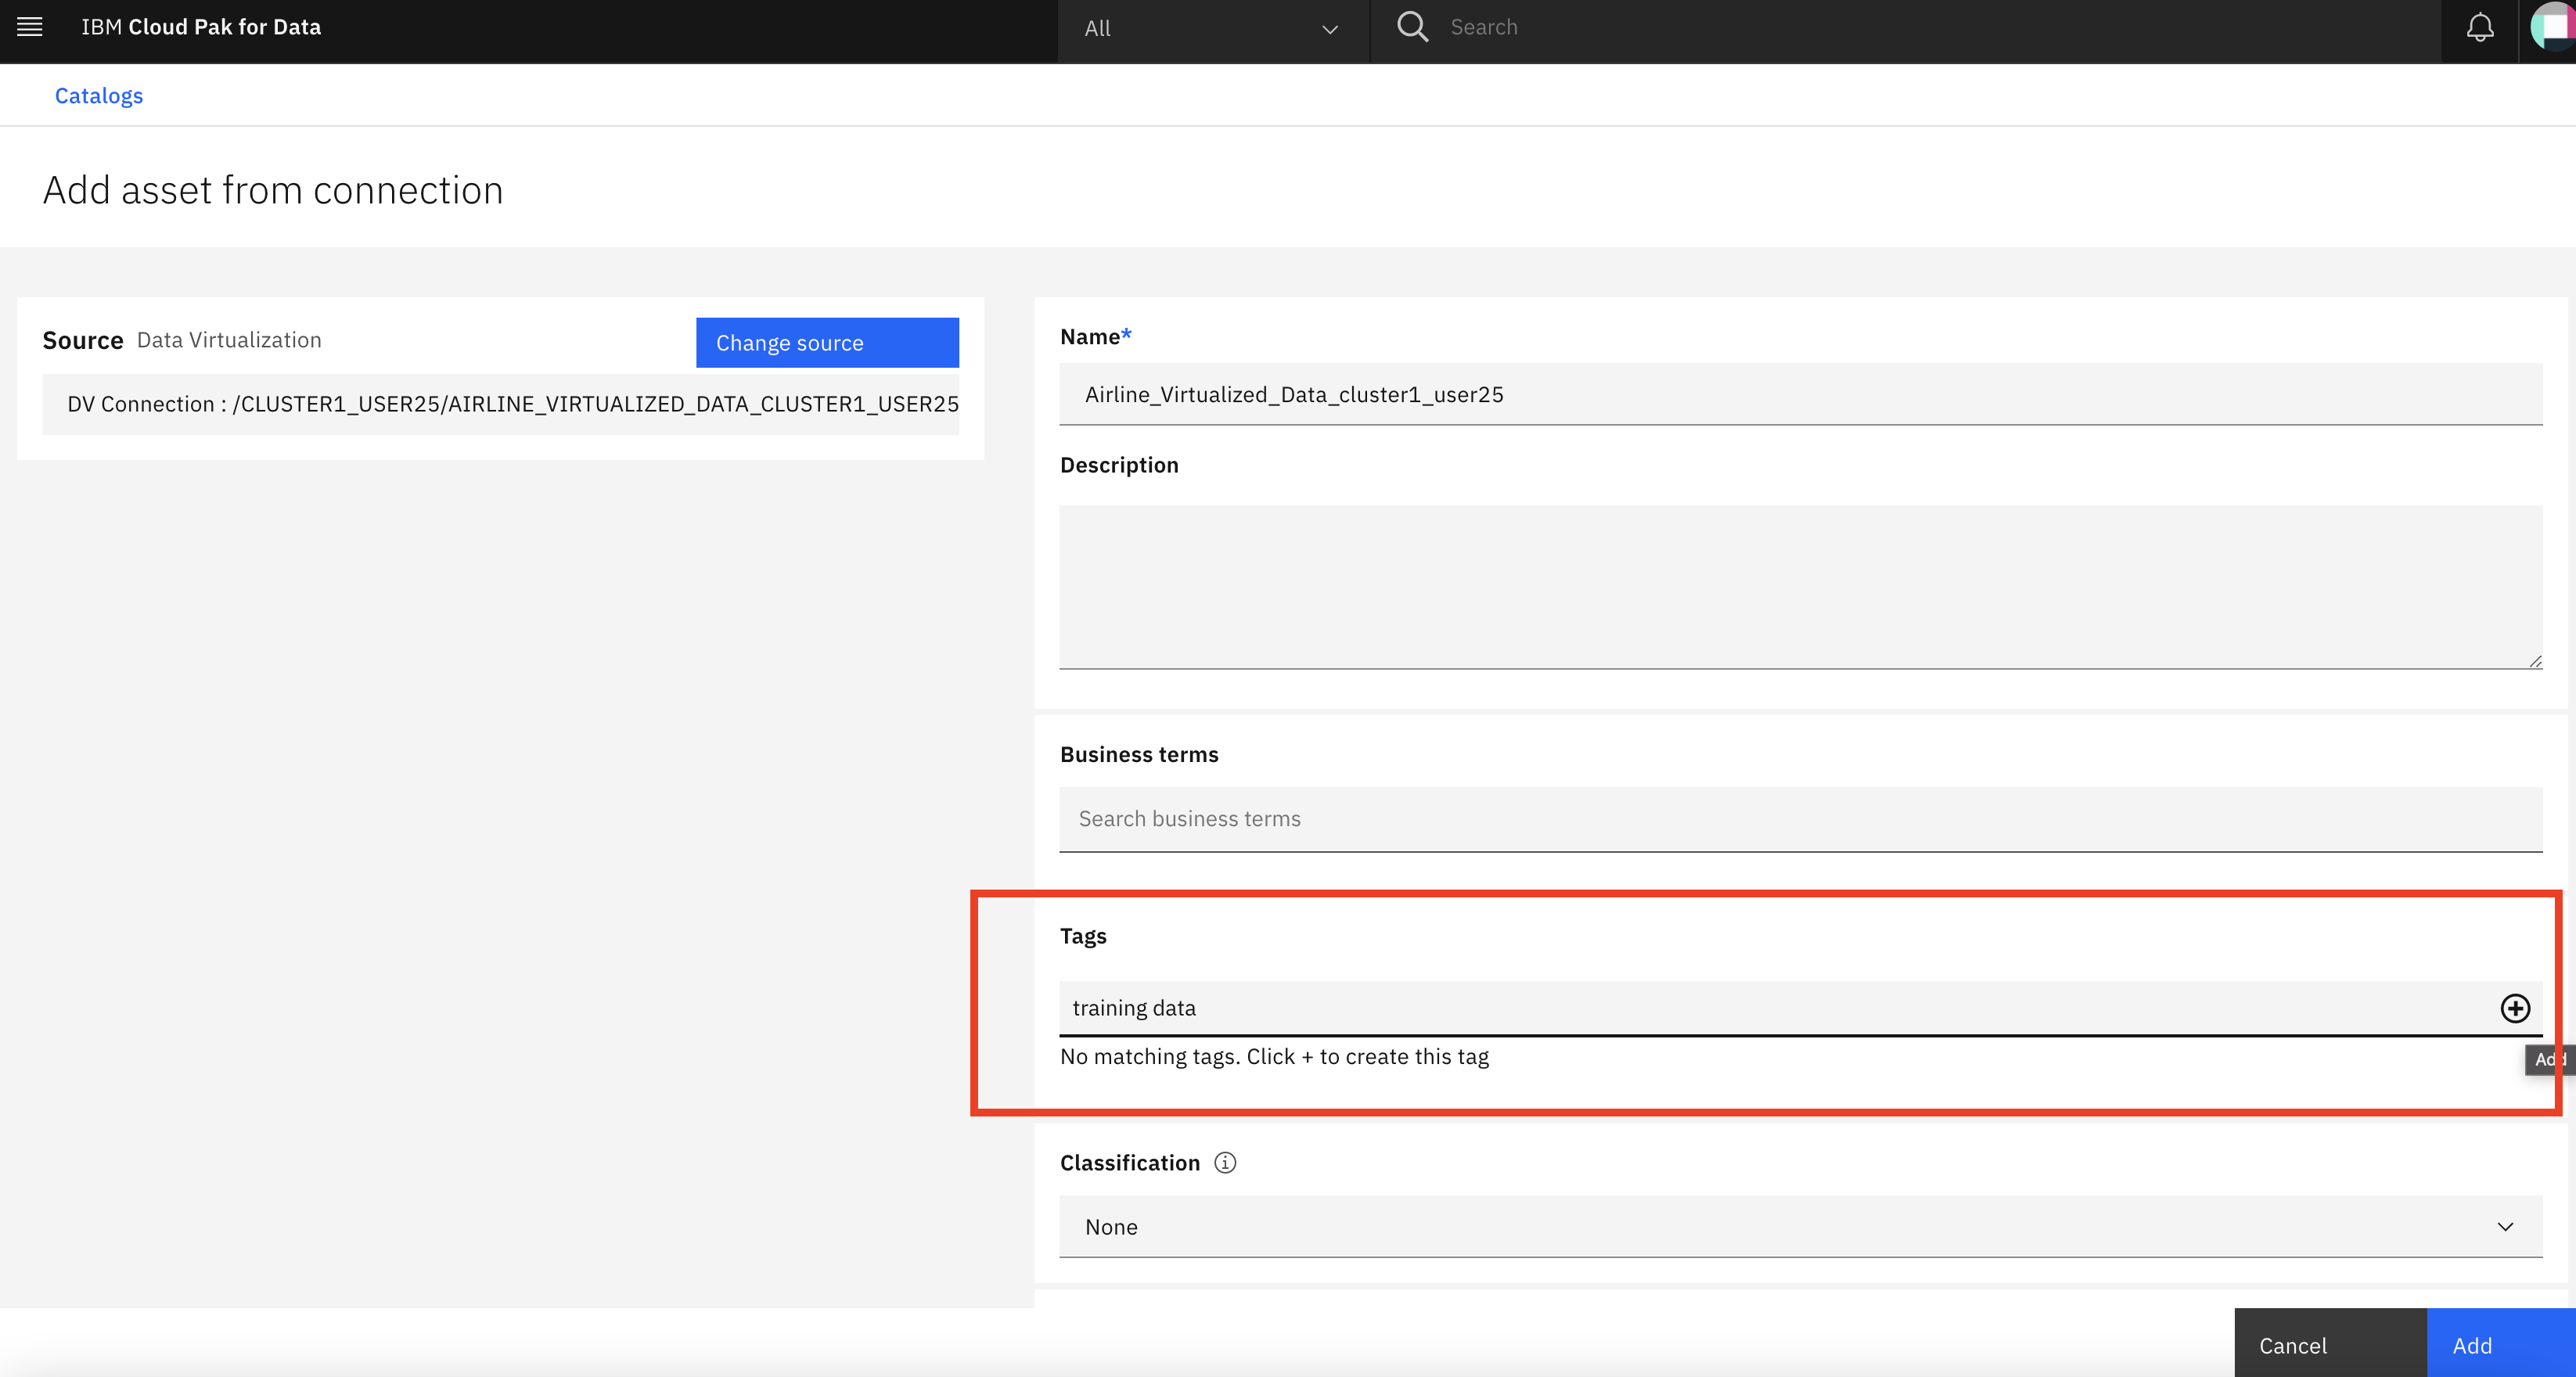


### 21. Select the blue 'Add' button in the bottom righthand corner. 

### 22. Now locate the newly created asset in the catalog and click on it:
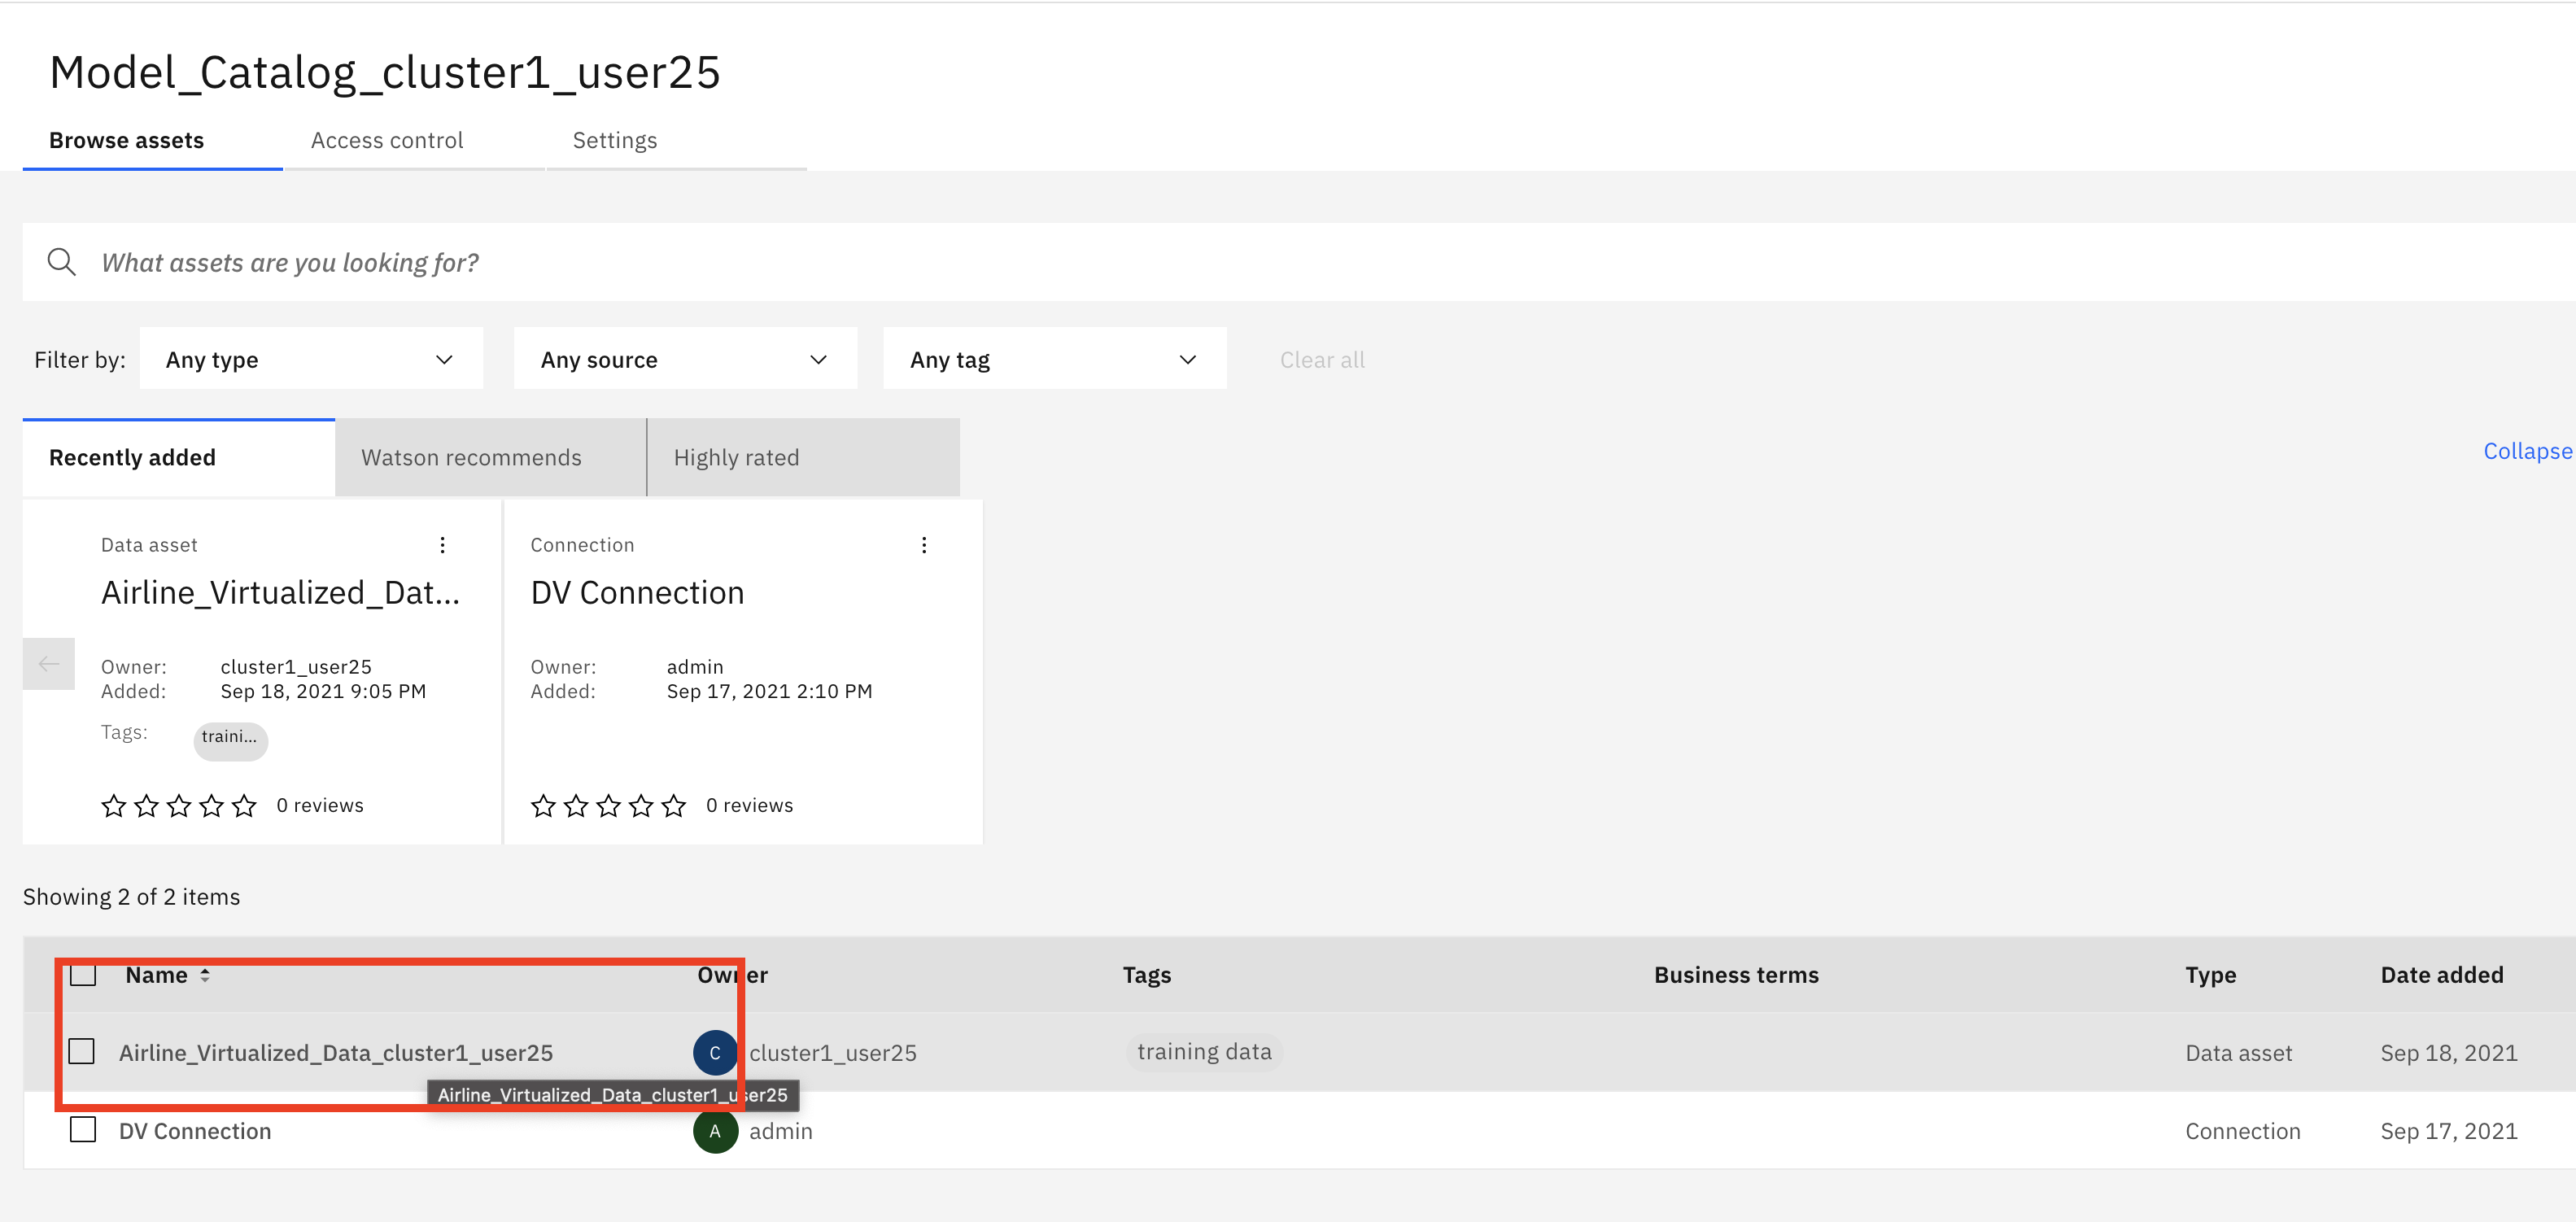


### 23. Select the 'Profile' tab:
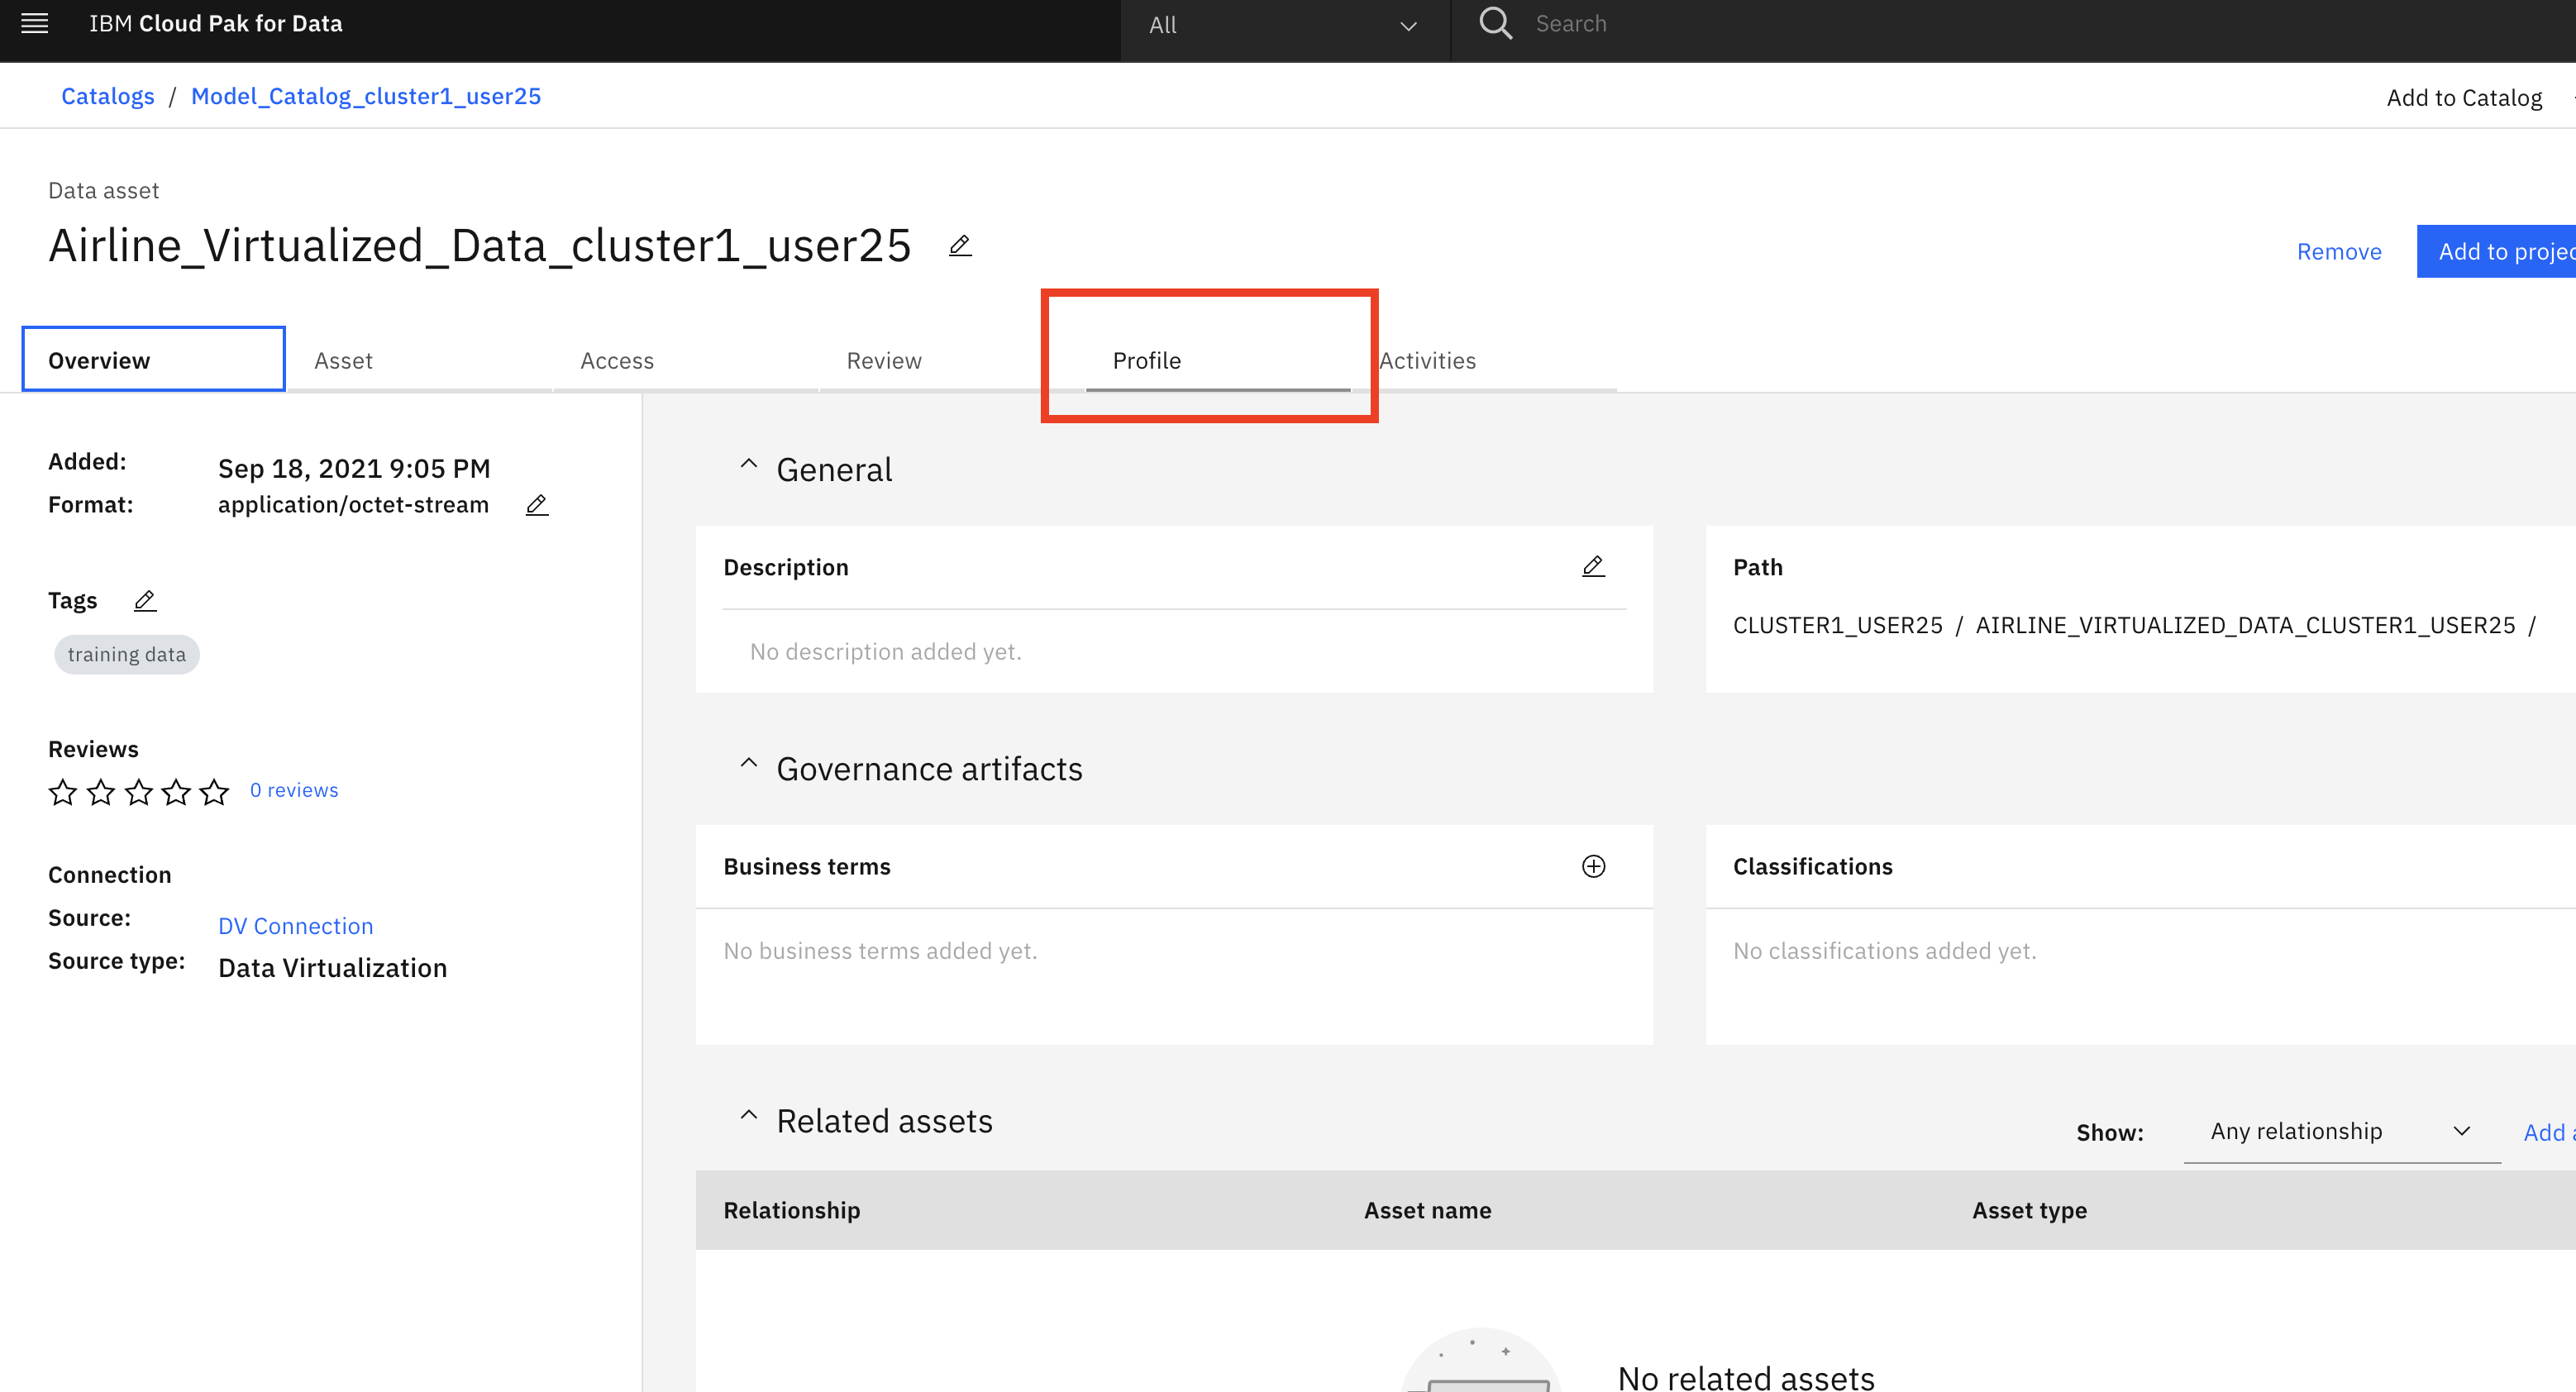

### 24. Select `Create Profile` .  This will create statistical summaries of the columns in the training data. The profiling process will take some time and you can refresh it to see the status.
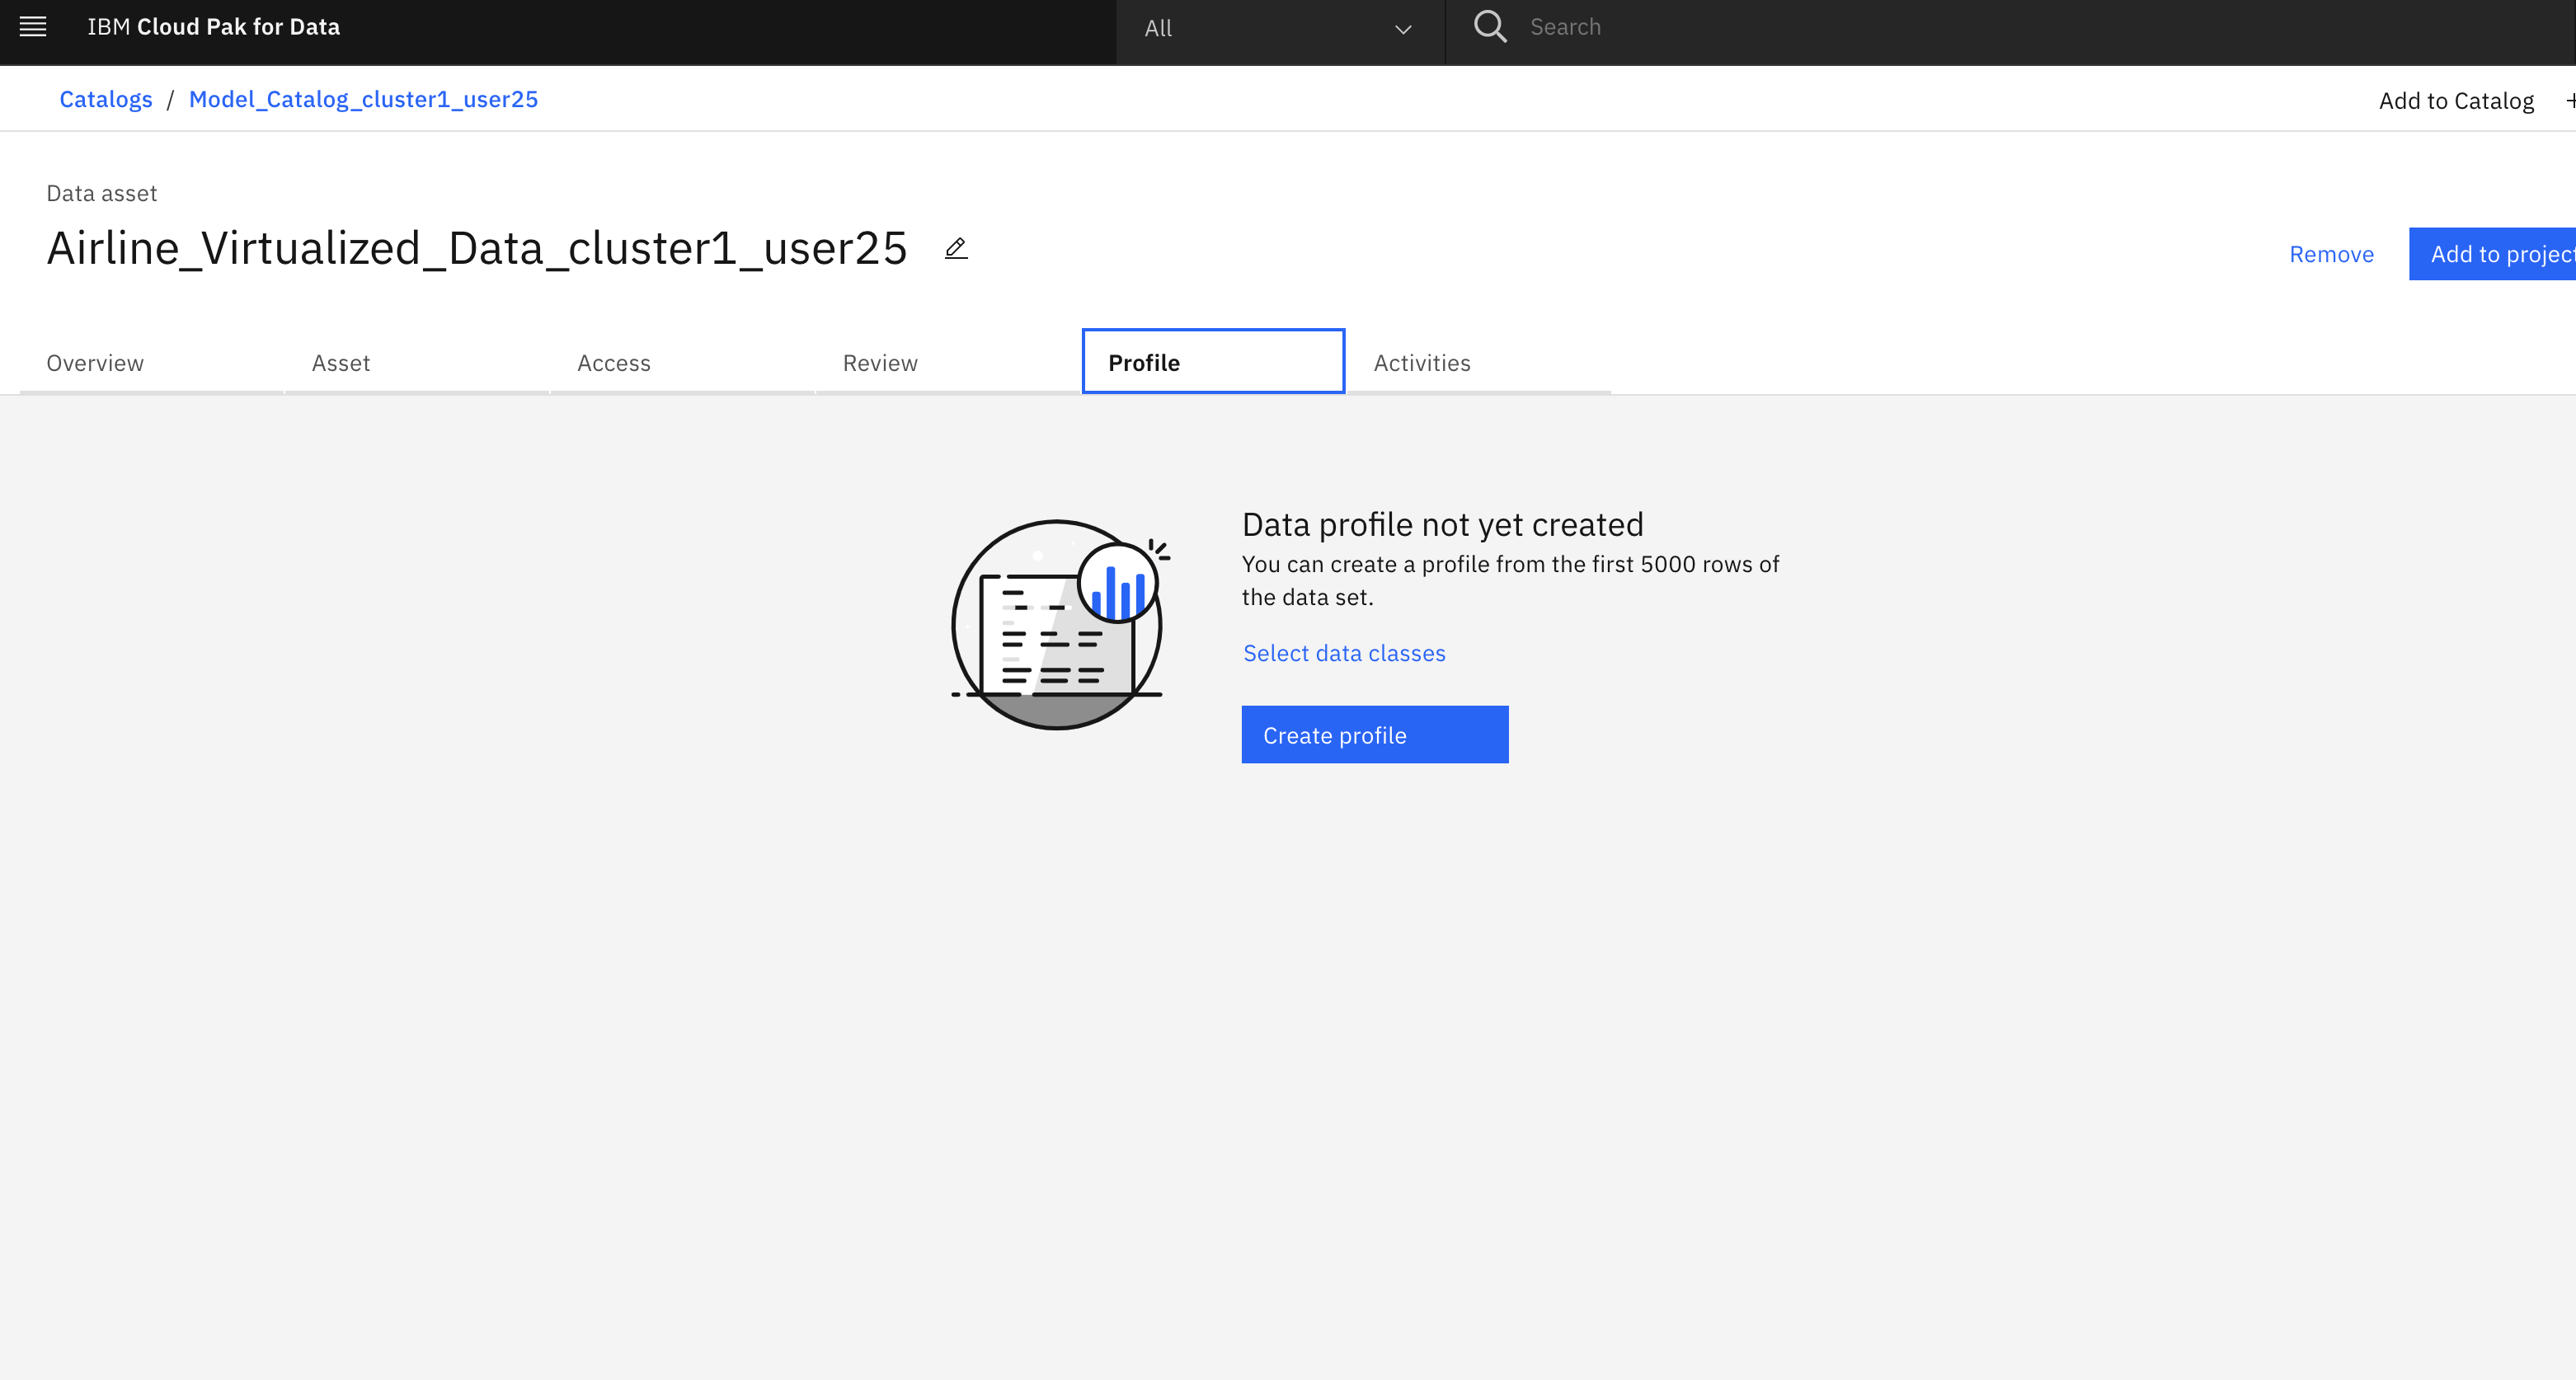

Sample profile below: 
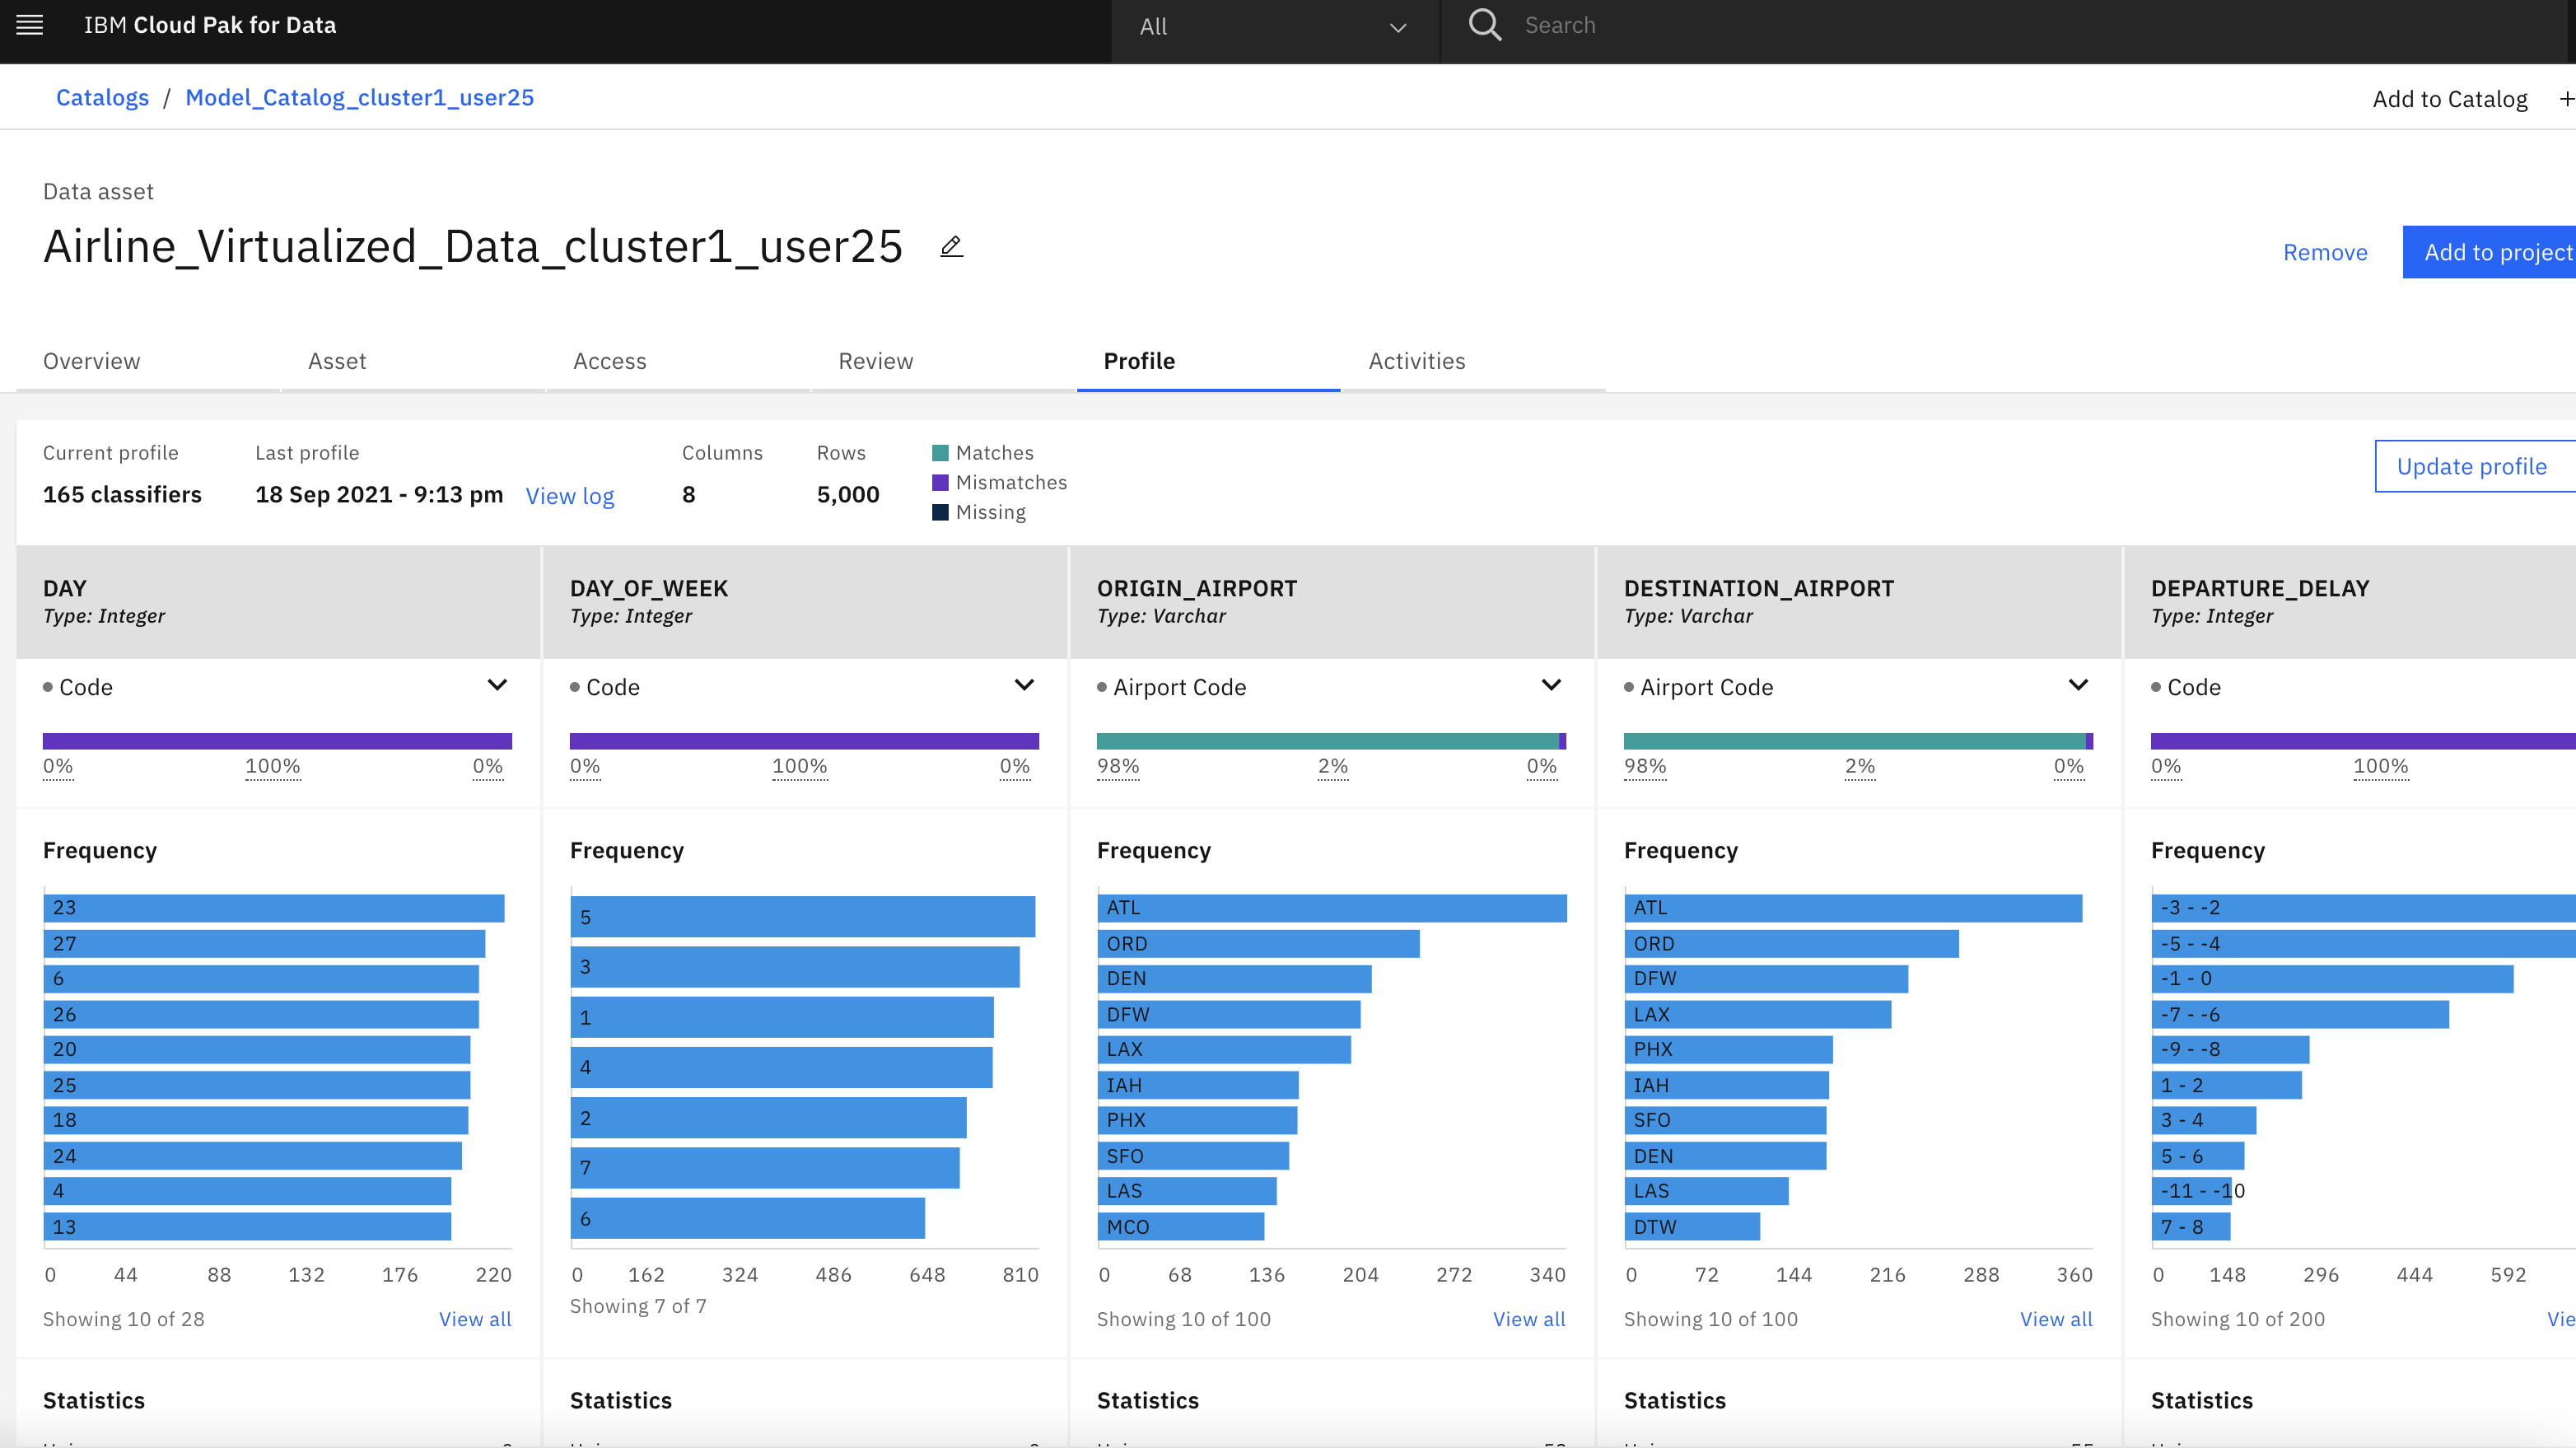